In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-04 23:37:20.990833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG19(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 0s 288ms/step


  0%|                                          | 1/5121 [00:00<39:19,  2.17it/s]

1/1 [==============================] - 0s 34ms/step


  0%|                                          | 3/5121 [00:00<19:27,  4.38it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                          | 4/5121 [00:00<16:07,  5.29it/s]

1/1 [==============================] - 0s 35ms/step


  0%|                                          | 6/5121 [00:01<11:09,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


  0%|                                          | 8/5121 [00:01<08:58,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


  0%|                                         | 10/5121 [00:01<08:28, 10.04it/s]

1/1 [==============================] - 0s 32ms/step


  0%|                                         | 12/5121 [00:01<08:19, 10.22it/s]

1/1 [==============================] - 0s 33ms/step


  0%|                                         | 14/5121 [00:01<07:40, 11.08it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                        | 16/5121 [00:01<07:11, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                        | 18/5121 [00:01<06:50, 12.43it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 20/5121 [00:02<06:35, 12.89it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 22/5121 [00:02<06:31, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


  0%|▏                                        | 24/5121 [00:02<06:17, 13.51it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏                                        | 26/5121 [00:02<06:08, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏                                        | 28/5121 [00:02<06:02, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏                                        | 30/5121 [00:02<06:41, 12.69it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▎                                        | 32/5121 [00:03<06:41, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 34/5121 [00:03<06:32, 12.97it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 36/5121 [00:03<06:16, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▎                                        | 38/5121 [00:03<06:37, 12.79it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▎                                        | 40/5121 [00:03<06:31, 12.97it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 42/5121 [00:03<06:28, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 44/5121 [00:03<06:54, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 46/5121 [00:04<06:44, 12.53it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 48/5121 [00:04<06:28, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                        | 50/5121 [00:04<06:11, 13.66it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▍                                        | 52/5121 [00:04<06:32, 12.93it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▍                                        | 54/5121 [00:04<06:23, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 56/5121 [00:04<06:09, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 58/5121 [00:04<05:59, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 60/5121 [00:05<05:49, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 62/5121 [00:05<05:45, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 64/5121 [00:05<05:39, 14.89it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 66/5121 [00:05<05:46, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 68/5121 [00:05<05:42, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 70/5121 [00:05<05:37, 14.95it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 72/5121 [00:05<05:37, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 74/5121 [00:06<05:34, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                        | 76/5121 [00:06<05:39, 14.87it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▌                                        | 78/5121 [00:06<05:42, 14.74it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▋                                        | 80/5121 [00:06<05:35, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▋                                        | 82/5121 [00:06<05:34, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▋                                        | 84/5121 [00:06<05:32, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▋                                        | 86/5121 [00:06<06:07, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▋                                        | 88/5121 [00:07<06:02, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 90/5121 [00:07<05:49, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▋                                        | 92/5121 [00:07<05:43, 14.64it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▊                                        | 94/5121 [00:07<05:43, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                        | 96/5121 [00:07<05:55, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                        | 98/5121 [00:07<05:46, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 100/5121 [00:07<05:49, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▊                                       | 102/5121 [00:07<05:51, 14.26it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▊                                       | 104/5121 [00:08<05:54, 14.14it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                       | 106/5121 [00:08<05:48, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 108/5121 [00:08<05:39, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                       | 110/5121 [00:08<05:37, 14.84it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                       | 112/5121 [00:08<05:42, 14.62it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▉                                       | 114/5121 [00:08<05:46, 14.45it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 116/5121 [00:08<05:49, 14.33it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▉                                       | 118/5121 [00:09<05:42, 14.60it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▉                                       | 120/5121 [00:09<05:39, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 122/5121 [00:09<06:06, 13.65it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 124/5121 [00:09<06:02, 13.80it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▉                                       | 126/5121 [00:09<05:58, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 128/5121 [00:09<05:51, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 130/5121 [00:09<05:47, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                       | 132/5121 [00:10<05:45, 14.43it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█                                       | 134/5121 [00:10<05:41, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 136/5121 [00:10<05:37, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                       | 138/5121 [00:10<05:39, 14.69it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█                                       | 140/5121 [00:10<06:07, 13.55it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█                                       | 142/5121 [00:10<06:31, 12.70it/s]

1/1 [==============================] - 0s 36ms/step


  3%|█                                       | 144/5121 [00:10<06:12, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                      | 146/5121 [00:11<05:55, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                      | 148/5121 [00:11<05:50, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                      | 150/5121 [00:11<05:42, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 152/5121 [00:11<06:12, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                      | 154/5121 [00:11<06:05, 13.57it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                      | 156/5121 [00:11<05:57, 13.91it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                      | 158/5121 [00:11<06:18, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 160/5121 [00:12<06:10, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▎                                      | 162/5121 [00:12<06:29, 12.72it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 164/5121 [00:12<06:11, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 166/5121 [00:12<06:04, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▎                                      | 168/5121 [00:12<05:48, 14.21it/s]

1/1 [==============================] - 0s 36ms/step


  3%|█▎                                      | 170/5121 [00:12<06:02, 13.65it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 172/5121 [00:12<05:50, 14.10it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 174/5121 [00:13<05:47, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                      | 176/5121 [00:13<05:41, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▍                                      | 178/5121 [00:13<05:34, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                      | 180/5121 [00:13<05:33, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 182/5121 [00:13<05:28, 15.02it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▍                                      | 184/5121 [00:13<05:33, 14.82it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 186/5121 [00:13<05:26, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 188/5121 [00:14<05:24, 15.22it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 190/5121 [00:14<05:28, 15.02it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 192/5121 [00:14<05:30, 14.90it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▌                                      | 194/5121 [00:14<05:33, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 196/5121 [00:14<05:30, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 198/5121 [00:14<05:28, 14.98it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                      | 200/5121 [00:14<05:28, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▌                                      | 202/5121 [00:14<05:28, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 204/5121 [00:15<05:29, 14.91it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                      | 206/5121 [00:15<05:26, 15.03it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 208/5121 [00:15<05:25, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 210/5121 [00:15<05:28, 14.96it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                      | 212/5121 [00:15<05:24, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▋                                      | 214/5121 [00:15<05:25, 15.10it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                      | 216/5121 [00:15<05:22, 15.23it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 218/5121 [00:16<05:18, 15.38it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                      | 220/5121 [00:16<05:59, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▋                                      | 222/5121 [00:16<06:19, 12.91it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 224/5121 [00:16<06:05, 13.39it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▊                                      | 226/5121 [00:16<05:54, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▊                                      | 228/5121 [00:16<05:44, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▊                                      | 230/5121 [00:16<05:40, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▊                                      | 232/5121 [00:17<05:33, 14.65it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▊                                      | 234/5121 [00:17<05:28, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▊                                      | 236/5121 [00:17<05:27, 14.90it/s]

1/1 [==============================] - 0s 34ms/step


  5%|█▊                                      | 238/5121 [00:17<05:37, 14.47it/s]

1/1 [==============================] - 0s 35ms/step


  5%|█▊                                      | 240/5121 [00:17<05:34, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 242/5121 [00:17<05:29, 14.82it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▉                                      | 244/5121 [00:17<05:23, 15.05it/s]

1/1 [==============================] - 0s 34ms/step


  5%|█▉                                      | 246/5121 [00:17<05:23, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 248/5121 [00:18<05:55, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 250/5121 [00:18<06:15, 12.97it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▉                                      | 252/5121 [00:18<06:01, 13.46it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▉                                      | 254/5121 [00:18<05:58, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 256/5121 [00:18<05:49, 13.94it/s]

1/1 [==============================] - 0s 37ms/step


  5%|██                                      | 258/5121 [00:18<05:46, 14.05it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██                                      | 260/5121 [00:19<05:39, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 262/5121 [00:19<05:36, 14.46it/s]

1/1 [==============================] - 0s 35ms/step


  5%|██                                      | 264/5121 [00:19<05:30, 14.71it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██                                      | 266/5121 [00:19<05:27, 14.81it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                      | 268/5121 [00:19<06:01, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 270/5121 [00:19<06:23, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██                                      | 272/5121 [00:19<06:03, 13.33it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██▏                                     | 274/5121 [00:20<05:55, 13.62it/s]

1/1 [==============================] - 0s 37ms/step


  5%|██▏                                     | 276/5121 [00:20<05:51, 13.80it/s]

1/1 [==============================] - 0s 39ms/step


  5%|██▏                                     | 278/5121 [00:20<05:51, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                     | 280/5121 [00:20<05:42, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 282/5121 [00:20<05:35, 14.44it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 284/5121 [00:20<05:30, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▏                                     | 286/5121 [00:20<05:27, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▏                                     | 288/5121 [00:20<05:23, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▎                                     | 290/5121 [00:21<06:17, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▎                                     | 292/5121 [00:21<06:04, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▎                                     | 294/5121 [00:21<05:49, 13.80it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▎                                     | 296/5121 [00:21<05:40, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▎                                     | 298/5121 [00:21<05:30, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▎                                     | 300/5121 [00:21<05:29, 14.64it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 302/5121 [00:22<06:00, 13.38it/s]

1/1 [==============================] - 0s 50ms/step


  6%|██▎                                     | 304/5121 [00:22<06:01, 13.34it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▍                                     | 306/5121 [00:22<05:44, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 308/5121 [00:22<05:40, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 310/5121 [00:22<05:39, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▍                                     | 312/5121 [00:22<05:30, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 314/5121 [00:22<05:27, 14.68it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 316/5121 [00:22<05:22, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 318/5121 [00:23<05:20, 14.98it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▍                                     | 320/5121 [00:23<05:23, 14.86it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▌                                     | 322/5121 [00:23<05:21, 14.93it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▌                                     | 324/5121 [00:23<05:22, 14.85it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▌                                     | 326/5121 [00:23<05:20, 14.96it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 328/5121 [00:23<05:24, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▌                                     | 330/5121 [00:23<05:19, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▌                                     | 332/5121 [00:24<05:23, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▌                                     | 334/5121 [00:24<05:26, 14.64it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▌                                     | 336/5121 [00:24<05:26, 14.67it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▋                                     | 338/5121 [00:24<05:22, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▋                                     | 340/5121 [00:24<05:20, 14.91it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▋                                     | 342/5121 [00:24<05:20, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 344/5121 [00:24<05:15, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 346/5121 [00:25<05:16, 15.09it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▋                                     | 348/5121 [00:25<05:17, 15.05it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▋                                     | 350/5121 [00:25<05:53, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 352/5121 [00:25<05:41, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▊                                     | 354/5121 [00:25<05:33, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 356/5121 [00:25<05:55, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                     | 358/5121 [00:25<05:48, 13.65it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▊                                     | 360/5121 [00:26<05:44, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 362/5121 [00:26<05:33, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 364/5121 [00:26<05:32, 14.31it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▊                                     | 366/5121 [00:26<05:25, 14.60it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▊                                     | 368/5121 [00:26<05:22, 14.73it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 370/5121 [00:26<05:57, 13.28it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▉                                     | 372/5121 [00:26<05:50, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▉                                     | 374/5121 [00:27<05:39, 14.00it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▉                                     | 376/5121 [00:27<05:44, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 378/5121 [00:27<05:40, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 380/5121 [00:27<05:33, 14.20it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                     | 382/5121 [00:27<05:29, 14.37it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 384/5121 [00:27<05:27, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 386/5121 [00:27<05:26, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 388/5121 [00:27<05:20, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 390/5121 [00:28<05:17, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███                                     | 392/5121 [00:28<05:15, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 394/5121 [00:28<05:11, 15.18it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 396/5121 [00:28<05:46, 13.65it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███                                     | 398/5121 [00:28<05:41, 13.85it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 400/5121 [00:28<05:30, 14.30it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 402/5121 [00:28<05:23, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 404/5121 [00:29<05:22, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 406/5121 [00:29<05:42, 13.77it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 408/5121 [00:29<05:33, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 410/5121 [00:29<05:29, 14.28it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 412/5121 [00:29<05:28, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 414/5121 [00:29<05:58, 13.15it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 416/5121 [00:29<05:40, 13.83it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▎                                    | 418/5121 [00:30<06:06, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 420/5121 [00:30<05:59, 13.08it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███▎                                    | 422/5121 [00:30<05:43, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▎                                    | 424/5121 [00:30<05:32, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▎                                    | 426/5121 [00:30<05:27, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 428/5121 [00:30<05:20, 14.62it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 430/5121 [00:30<05:22, 14.53it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▎                                    | 432/5121 [00:31<05:23, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▍                                    | 434/5121 [00:31<05:22, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 436/5121 [00:31<05:20, 14.64it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 438/5121 [00:31<05:16, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▍                                    | 440/5121 [00:31<05:16, 14.80it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▍                                    | 442/5121 [00:31<05:43, 13.60it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 444/5121 [00:31<05:46, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 446/5121 [00:32<05:39, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 448/5121 [00:32<05:31, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▌                                    | 450/5121 [00:32<05:24, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▌                                    | 452/5121 [00:32<05:20, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 454/5121 [00:32<05:18, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 456/5121 [00:32<05:13, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▌                                    | 458/5121 [00:32<05:13, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 460/5121 [00:33<05:12, 14.90it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 462/5121 [00:33<05:15, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 464/5121 [00:33<05:13, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 466/5121 [00:33<05:16, 14.72it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▋                                    | 468/5121 [00:33<05:18, 14.61it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▋                                    | 470/5121 [00:33<05:16, 14.69it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▋                                    | 472/5121 [00:33<05:19, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▋                                    | 474/5121 [00:34<05:16, 14.69it/s]

1/1 [==============================] - 0s 41ms/step


  9%|███▋                                    | 476/5121 [00:34<05:21, 14.45it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▋                                    | 478/5121 [00:34<05:15, 14.72it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 480/5121 [00:34<05:15, 14.72it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▊                                    | 482/5121 [00:34<05:15, 14.72it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▊                                    | 484/5121 [00:34<05:19, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▊                                    | 486/5121 [00:34<05:26, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 488/5121 [00:34<05:22, 14.35it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 490/5121 [00:35<05:20, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 492/5121 [00:35<05:15, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 494/5121 [00:35<05:10, 14.92it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▊                                    | 496/5121 [00:35<05:34, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 498/5121 [00:35<05:32, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███▉                                    | 500/5121 [00:35<05:24, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 502/5121 [00:35<05:17, 14.54it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▉                                    | 504/5121 [00:36<05:12, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▉                                    | 506/5121 [00:36<05:11, 14.80it/s]

1/1 [==============================] - 0s 41ms/step


 10%|███▉                                    | 508/5121 [00:36<05:17, 14.54it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███▉                                    | 510/5121 [00:36<05:14, 14.65it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███▉                                    | 512/5121 [00:36<05:20, 14.37it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 514/5121 [00:36<05:45, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 516/5121 [00:36<06:07, 12.52it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 518/5121 [00:37<05:49, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 520/5121 [00:37<05:41, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████                                    | 522/5121 [00:37<05:31, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 524/5121 [00:37<05:21, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 526/5121 [00:37<05:20, 14.33it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 528/5121 [00:37<05:18, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████▏                                   | 530/5121 [00:37<05:12, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████▏                                   | 532/5121 [00:38<05:09, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████▏                                   | 534/5121 [00:38<05:11, 14.73it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████▏                                   | 536/5121 [00:38<05:08, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▏                                   | 538/5121 [00:38<05:33, 13.76it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▏                                   | 540/5121 [00:38<05:26, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▏                                   | 542/5121 [00:38<05:18, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▏                                   | 544/5121 [00:38<05:21, 14.22it/s]

1/1 [==============================] - 0s 63ms/step


 11%|████▎                                   | 546/5121 [00:39<10:00,  7.62it/s]

1/1 [==============================] - 0s 84ms/step


 11%|████▎                                   | 548/5121 [00:39<10:57,  6.96it/s]

1/1 [==============================] - 0s 145ms/step


 11%|████▎                                   | 549/5121 [00:40<12:45,  5.97it/s]

1/1 [==============================] - 0s 53ms/step


 11%|████▎                                   | 550/5121 [00:40<13:49,  5.51it/s]

1/1 [==============================] - 0s 45ms/step


 11%|████▎                                   | 552/5121 [00:40<11:01,  6.91it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 554/5121 [00:40<09:00,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 556/5121 [00:40<07:45,  9.81it/s]

1/1 [==============================] - 0s 46ms/step


 11%|████▎                                   | 558/5121 [00:40<07:36, 10.01it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▎                                   | 560/5121 [00:41<06:50, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 562/5121 [00:41<06:13, 12.21it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▍                                   | 564/5121 [00:41<05:44, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 566/5121 [00:41<05:33, 13.67it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▍                                   | 568/5121 [00:41<05:39, 13.41it/s]

1/1 [==============================] - 0s 45ms/step


 11%|████▍                                   | 570/5121 [00:41<05:50, 12.97it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▍                                   | 572/5121 [00:41<05:40, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▍                                   | 574/5121 [00:42<05:21, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 576/5121 [00:42<05:08, 14.73it/s]

1/1 [==============================] - 0s 42ms/step


 11%|████▌                                   | 578/5121 [00:42<06:30, 11.64it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▌                                   | 580/5121 [00:42<06:48, 11.11it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▌                                   | 582/5121 [00:42<06:50, 11.05it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▌                                   | 584/5121 [00:42<06:23, 11.82it/s]

1/1 [==============================] - 0s 58ms/step


 11%|████▌                                   | 586/5121 [00:43<08:19,  9.09it/s]

1/1 [==============================] - 0s 54ms/step


 11%|████▌                                   | 588/5121 [00:43<08:45,  8.62it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▌                                   | 589/5121 [00:43<10:00,  7.54it/s]

1/1 [==============================] - 0s 48ms/step


 12%|████▌                                   | 590/5121 [00:43<09:47,  7.71it/s]

1/1 [==============================] - 0s 69ms/step


 12%|████▌                                   | 591/5121 [00:44<09:47,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 12%|████▌                                   | 592/5121 [00:44<09:34,  7.89it/s]

1/1 [==============================] - 0s 133ms/step


 12%|████▋                                   | 593/5121 [00:44<11:20,  6.66it/s]

1/1 [==============================] - 0s 62ms/step


 12%|████▋                                   | 594/5121 [00:44<10:54,  6.92it/s]

1/1 [==============================] - 0s 72ms/step


 12%|████▋                                   | 595/5121 [00:44<10:56,  6.90it/s]

1/1 [==============================] - 0s 66ms/step


 12%|████▋                                   | 596/5121 [00:44<10:37,  7.10it/s]

1/1 [==============================] - 0s 137ms/step


 12%|████▋                                   | 597/5121 [00:45<13:47,  5.47it/s]

1/1 [==============================] - 0s 105ms/step


 12%|████▋                                   | 598/5121 [00:45<15:22,  4.91it/s]

1/1 [==============================] - 0s 62ms/step


 12%|████▋                                   | 599/5121 [00:45<16:11,  4.66it/s]

1/1 [==============================] - 0s 138ms/step


 12%|████▋                                   | 600/5121 [00:45<18:36,  4.05it/s]

1/1 [==============================] - 0s 80ms/step


 12%|████▋                                   | 601/5121 [00:46<16:20,  4.61it/s]

1/1 [==============================] - 0s 195ms/step


 12%|████▋                                   | 602/5121 [00:46<18:46,  4.01it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▋                                   | 603/5121 [00:46<16:31,  4.55it/s]

1/1 [==============================] - 0s 43ms/step


 12%|████▋                                   | 605/5121 [00:46<11:35,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▋                                   | 607/5121 [00:46<09:34,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 12%|████▊                                   | 609/5121 [00:46<07:58,  9.42it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▊                                   | 611/5121 [00:47<06:58, 10.77it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▊                                   | 613/5121 [00:47<06:36, 11.37it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▊                                   | 615/5121 [00:47<07:03, 10.64it/s]

1/1 [==============================] - 0s 78ms/step


 12%|████▊                                   | 617/5121 [00:47<09:52,  7.60it/s]

1/1 [==============================] - 0s 118ms/step


 12%|████▊                                   | 618/5121 [00:48<10:50,  6.92it/s]

1/1 [==============================] - 0s 132ms/step


 12%|████▊                                   | 619/5121 [00:48<12:55,  5.81it/s]

1/1 [==============================] - 0s 62ms/step


 12%|████▊                                   | 620/5121 [00:48<12:01,  6.24it/s]

1/1 [==============================] - 0s 151ms/step


 12%|████▊                                   | 621/5121 [00:48<13:27,  5.57it/s]

1/1 [==============================] - 0s 44ms/step


 12%|████▊                                   | 623/5121 [00:48<10:22,  7.22it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▊                                   | 624/5121 [00:49<10:13,  7.33it/s]

1/1 [==============================] - 0s 144ms/step


 12%|████▉                                   | 626/5121 [00:49<10:54,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 12%|████▉                                   | 627/5121 [00:49<13:22,  5.60it/s]

1/1 [==============================] - 0s 136ms/step


 12%|████▉                                   | 629/5121 [00:49<12:07,  6.18it/s]

1/1 [==============================] - 0s 51ms/step


 12%|████▉                                   | 630/5121 [00:50<12:35,  5.94it/s]

1/1 [==============================] - 0s 57ms/step


 12%|████▉                                   | 631/5121 [00:50<11:54,  6.28it/s]

1/1 [==============================] - 0s 97ms/step


 12%|████▉                                   | 632/5121 [00:50<11:49,  6.33it/s]

1/1 [==============================] - 0s 50ms/step


 12%|████▉                                   | 633/5121 [00:50<12:03,  6.21it/s]

1/1 [==============================] - 0s 174ms/step


 12%|████▉                                   | 634/5121 [00:50<15:39,  4.78it/s]

1/1 [==============================] - 0s 51ms/step


 12%|████▉                                   | 635/5121 [00:51<16:45,  4.46it/s]

1/1 [==============================] - 0s 114ms/step


 12%|████▉                                   | 636/5121 [00:51<15:47,  4.73it/s]

1/1 [==============================] - 0s 76ms/step


 12%|████▉                                   | 637/5121 [00:51<15:38,  4.78it/s]

1/1 [==============================] - 0s 57ms/step


 12%|████▉                                   | 638/5121 [00:51<13:46,  5.43it/s]

1/1 [==============================] - 0s 151ms/step


 12%|████▉                                   | 639/5121 [00:51<14:32,  5.14it/s]

1/1 [==============================] - 0s 121ms/step


 12%|████▉                                   | 640/5121 [00:52<15:39,  4.77it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█████                                   | 642/5121 [00:52<11:43,  6.36it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█████                                   | 644/5121 [00:52<09:48,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████                                   | 646/5121 [00:52<08:11,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█████                                   | 648/5121 [00:52<07:18, 10.20it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█████                                   | 650/5121 [00:52<06:57, 10.70it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█████                                   | 652/5121 [00:53<07:09, 10.40it/s]

1/1 [==============================] - 0s 74ms/step


 13%|█████                                   | 654/5121 [00:53<09:19,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█████                                   | 655/5121 [00:53<09:21,  7.95it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█████                                   | 656/5121 [00:53<10:56,  6.80it/s]

1/1 [==============================] - 0s 128ms/step


 13%|█████▏                                  | 657/5121 [00:54<13:39,  5.44it/s]

1/1 [==============================] - 0s 128ms/step


 13%|█████▏                                  | 658/5121 [00:54<15:29,  4.80it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█████▏                                  | 659/5121 [00:54<13:40,  5.44it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█████▏                                  | 661/5121 [00:54<12:36,  5.90it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█████▏                                  | 662/5121 [00:55<13:59,  5.31it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█████▏                                  | 663/5121 [00:55<13:55,  5.34it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█████▏                                  | 664/5121 [00:55<12:51,  5.78it/s]

1/1 [==============================] - 0s 165ms/step


 13%|█████▏                                  | 665/5121 [00:55<14:14,  5.21it/s]

1/1 [==============================] - 0s 110ms/step


 13%|█████▏                                  | 666/5121 [00:55<13:40,  5.43it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█████▏                                  | 667/5121 [00:55<12:25,  5.97it/s]

1/1 [==============================] - 0s 106ms/step


 13%|█████▏                                  | 668/5121 [00:56<13:08,  5.65it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█████▏                                  | 669/5121 [00:56<12:05,  6.13it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█████▏                                  | 670/5121 [00:56<12:03,  6.15it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█████▏                                  | 671/5121 [00:56<10:47,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█████▎                                  | 673/5121 [00:56<09:08,  8.11it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█████▎                                  | 675/5121 [00:56<08:14,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▎                                  | 677/5121 [00:57<07:17, 10.15it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████▎                                  | 679/5121 [00:57<06:49, 10.84it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█████▎                                  | 681/5121 [00:57<06:24, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▎                                  | 683/5121 [00:57<06:01, 12.27it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█████▎                                  | 685/5121 [00:57<05:44, 12.89it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▎                                  | 687/5121 [00:57<05:28, 13.49it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█████▍                                  | 689/5121 [00:58<06:35, 11.21it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█████▍                                  | 691/5121 [00:58<06:25, 11.51it/s]

1/1 [==============================] - 0s 90ms/step


 14%|█████▍                                  | 693/5121 [00:58<07:40,  9.61it/s]

1/1 [==============================] - 0s 113ms/step


 14%|█████▍                                  | 695/5121 [00:58<09:30,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█████▍                                  | 696/5121 [00:59<10:05,  7.31it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█████▍                                  | 697/5121 [00:59<10:02,  7.34it/s]

1/1 [==============================] - 0s 84ms/step


 14%|█████▍                                  | 698/5121 [00:59<11:42,  6.29it/s]

1/1 [==============================] - 0s 77ms/step


 14%|█████▍                                  | 699/5121 [00:59<11:40,  6.31it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█████▍                                  | 700/5121 [00:59<13:04,  5.64it/s]

1/1 [==============================] - 0s 79ms/step


 14%|█████▍                                  | 701/5121 [01:00<13:03,  5.64it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█████▍                                  | 702/5121 [01:00<14:46,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█████▍                                  | 703/5121 [01:00<13:48,  5.33it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█████▍                                  | 704/5121 [01:00<16:28,  4.47it/s]

1/1 [==============================] - 0s 117ms/step


 14%|█████▌                                  | 705/5121 [01:00<16:12,  4.54it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█████▌                                  | 706/5121 [01:01<16:36,  4.43it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█████▌                                  | 707/5121 [01:01<13:55,  5.28it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▌                                  | 708/5121 [01:01<12:24,  5.92it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█████▌                                  | 709/5121 [01:01<11:31,  6.38it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█████▌                                  | 711/5121 [01:01<09:03,  8.12it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█████▌                                  | 713/5121 [01:01<07:38,  9.61it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▌                                  | 715/5121 [01:02<07:00, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█████▌                                  | 717/5121 [01:02<06:48, 10.78it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▌                                  | 719/5121 [01:02<06:28, 11.32it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█████▋                                  | 721/5121 [01:02<06:29, 11.31it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█████▋                                  | 723/5121 [01:02<06:11, 11.83it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█████▋                                  | 725/5121 [01:03<11:17,  6.49it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█████▋                                  | 726/5121 [01:03<10:43,  6.83it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█████▋                                  | 728/5121 [01:03<09:13,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█████▋                                  | 730/5121 [01:03<08:22,  8.74it/s]

1/1 [==============================] - 0s 167ms/step


 14%|█████▋                                  | 732/5121 [01:04<09:21,  7.81it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█████▋                                  | 733/5121 [01:04<09:43,  7.51it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█████▋                                  | 734/5121 [01:04<11:10,  6.54it/s]

1/1 [==============================] - 0s 71ms/step


 14%|█████▋                                  | 735/5121 [01:04<11:41,  6.26it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█████▋                                  | 736/5121 [01:05<18:01,  4.05it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█████▊                                  | 737/5121 [01:05<18:38,  3.92it/s]

1/1 [==============================] - 0s 84ms/step


 14%|█████▊                                  | 738/5121 [01:05<19:10,  3.81it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█████▊                                  | 739/5121 [01:06<21:23,  3.41it/s]

1/1 [==============================] - 0s 102ms/step


 14%|█████▊                                  | 740/5121 [01:06<19:56,  3.66it/s]

1/1 [==============================] - 0s 107ms/step


 14%|█████▊                                  | 741/5121 [01:06<19:37,  3.72it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▊                                  | 742/5121 [01:06<22:02,  3.31it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█████▊                                  | 743/5121 [01:07<18:57,  3.85it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█████▊                                  | 744/5121 [01:07<15:41,  4.65it/s]

1/1 [==============================] - 0s 62ms/step


 15%|█████▊                                  | 745/5121 [01:07<13:34,  5.38it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█████▊                                  | 746/5121 [01:07<12:17,  5.93it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█████▊                                  | 747/5121 [01:07<11:30,  6.34it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█████▊                                  | 748/5121 [01:07<10:32,  6.92it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█████▊                                  | 749/5121 [01:07<10:02,  7.26it/s]

1/1 [==============================] - 0s 68ms/step


 15%|█████▊                                  | 750/5121 [01:07<09:56,  7.33it/s]

1/1 [==============================] - 0s 71ms/step


 15%|█████▊                                  | 751/5121 [01:08<10:30,  6.93it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█████▊                                  | 752/5121 [01:08<10:42,  6.80it/s]

1/1 [==============================] - 0s 59ms/step


 15%|█████▉                                  | 753/5121 [01:08<10:05,  7.21it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█████▉                                  | 754/5121 [01:08<09:58,  7.30it/s]

1/1 [==============================] - 0s 74ms/step


 15%|█████▉                                  | 755/5121 [01:08<10:27,  6.96it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▉                                  | 756/5121 [01:08<11:28,  6.34it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█████▉                                  | 757/5121 [01:09<11:06,  6.55it/s]

1/1 [==============================] - 0s 68ms/step


 15%|█████▉                                  | 758/5121 [01:09<11:01,  6.60it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█████▉                                  | 759/5121 [01:09<10:52,  6.69it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█████▉                                  | 760/5121 [01:09<11:21,  6.40it/s]

1/1 [==============================] - 0s 63ms/step


 15%|█████▉                                  | 761/5121 [01:09<10:53,  6.67it/s]

1/1 [==============================] - 0s 78ms/step


 15%|█████▉                                  | 762/5121 [01:09<10:48,  6.72it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█████▉                                  | 763/5121 [01:10<12:03,  6.02it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█████▉                                  | 764/5121 [01:10<10:42,  6.78it/s]

1/1 [==============================] - 0s 128ms/step


 15%|█████▉                                  | 765/5121 [01:10<11:22,  6.38it/s]

1/1 [==============================] - 0s 68ms/step


 15%|█████▉                                  | 766/5121 [01:10<11:25,  6.35it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█████▉                                  | 767/5121 [01:10<10:49,  6.70it/s]

1/1 [==============================] - 0s 82ms/step


 15%|█████▉                                  | 768/5121 [01:10<10:57,  6.62it/s]

1/1 [==============================] - 0s 76ms/step


 15%|██████                                  | 769/5121 [01:10<11:23,  6.37it/s]

1/1 [==============================] - 0s 67ms/step


 15%|██████                                  | 770/5121 [01:11<10:24,  6.96it/s]

1/1 [==============================] - 0s 86ms/step


 15%|██████                                  | 771/5121 [01:11<10:12,  7.10it/s]

1/1 [==============================] - 0s 148ms/step


 15%|██████                                  | 772/5121 [01:11<16:09,  4.49it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████                                  | 773/5121 [01:11<16:36,  4.36it/s]

1/1 [==============================] - 0s 90ms/step


 15%|██████                                  | 774/5121 [01:11<15:22,  4.71it/s]

1/1 [==============================] - 0s 67ms/step


 15%|██████                                  | 775/5121 [01:12<15:20,  4.72it/s]

1/1 [==============================] - 0s 89ms/step


 15%|██████                                  | 776/5121 [01:12<15:17,  4.74it/s]

1/1 [==============================] - 0s 58ms/step


 15%|██████                                  | 777/5121 [01:12<13:50,  5.23it/s]

1/1 [==============================] - 0s 69ms/step


 15%|██████                                  | 778/5121 [01:12<12:23,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████                                  | 780/5121 [01:12<09:15,  7.82it/s]

1/1 [==============================] - 0s 46ms/step


 15%|██████                                  | 782/5121 [01:13<08:11,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 15%|██████                                  | 783/5121 [01:13<08:29,  8.52it/s]

1/1 [==============================] - 0s 60ms/step


 15%|██████                                  | 784/5121 [01:13<11:04,  6.52it/s]

1/1 [==============================] - 0s 66ms/step


 15%|██████▏                                 | 785/5121 [01:13<10:59,  6.57it/s]

1/1 [==============================] - 0s 50ms/step


 15%|██████▏                                 | 786/5121 [01:13<10:01,  7.21it/s]

1/1 [==============================] - 0s 44ms/step


 15%|██████▏                                 | 787/5121 [01:13<09:58,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 15%|██████▏                                 | 789/5121 [01:13<08:04,  8.93it/s]

1/1 [==============================] - 0s 82ms/step


 15%|██████▏                                 | 790/5121 [01:14<08:15,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


 15%|██████▏                                 | 792/5121 [01:14<07:38,  9.43it/s]

1/1 [==============================] - 0s 75ms/step


 15%|██████▏                                 | 793/5121 [01:14<08:13,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▏                                 | 795/5121 [01:14<06:56, 10.39it/s]

1/1 [==============================] - 0s 51ms/step


 16%|██████▏                                 | 797/5121 [01:14<09:52,  7.30it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▏                                 | 798/5121 [01:15<10:37,  6.78it/s]

1/1 [==============================] - 0s 54ms/step


 16%|██████▏                                 | 800/5121 [01:15<09:06,  7.91it/s]

1/1 [==============================] - 0s 45ms/step


 16%|██████▎                                 | 802/5121 [01:15<08:03,  8.93it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▎                                 | 804/5121 [01:15<07:32,  9.55it/s]

1/1 [==============================] - 0s 47ms/step


 16%|██████▎                                 | 806/5121 [01:15<07:08, 10.07it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▎                                 | 808/5121 [01:16<07:13,  9.95it/s]

1/1 [==============================] - 0s 45ms/step


 16%|██████▎                                 | 810/5121 [01:16<07:11, 10.00it/s]

1/1 [==============================] - 0s 52ms/step


 16%|██████▎                                 | 812/5121 [01:16<07:27,  9.63it/s]

1/1 [==============================] - 0s 46ms/step


 16%|██████▎                                 | 813/5121 [01:16<07:42,  9.31it/s]

1/1 [==============================] - 0s 65ms/step


 16%|██████▎                                 | 814/5121 [01:16<07:51,  9.14it/s]

1/1 [==============================] - 0s 78ms/step


 16%|██████▎                                 | 815/5121 [01:16<10:29,  6.84it/s]

1/1 [==============================] - 0s 82ms/step


 16%|██████▎                                 | 816/5121 [01:17<10:59,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 16%|██████▍                                 | 817/5121 [01:17<10:43,  6.69it/s]

1/1 [==============================] - 0s 65ms/step


 16%|██████▍                                 | 818/5121 [01:17<11:06,  6.45it/s]

1/1 [==============================] - 0s 55ms/step


 16%|██████▍                                 | 819/5121 [01:17<10:48,  6.63it/s]

1/1 [==============================] - 0s 60ms/step


 16%|██████▍                                 | 820/5121 [01:17<14:21,  4.99it/s]

1/1 [==============================] - 0s 147ms/step


 16%|██████▍                                 | 821/5121 [01:18<15:02,  4.77it/s]

1/1 [==============================] - 0s 131ms/step


 16%|██████▍                                 | 822/5121 [01:18<14:54,  4.80it/s]

1/1 [==============================] - 0s 71ms/step


 16%|██████▍                                 | 823/5121 [01:18<15:32,  4.61it/s]

1/1 [==============================] - 0s 79ms/step


 16%|██████▍                                 | 824/5121 [01:18<15:46,  4.54it/s]

1/1 [==============================] - 0s 77ms/step


 16%|██████▍                                 | 825/5121 [01:19<14:29,  4.94it/s]

1/1 [==============================] - 0s 80ms/step


 16%|██████▍                                 | 826/5121 [01:19<14:02,  5.10it/s]

1/1 [==============================] - 0s 75ms/step


 16%|██████▍                                 | 827/5121 [01:19<13:34,  5.27it/s]

1/1 [==============================] - 0s 48ms/step


 16%|██████▍                                 | 828/5121 [01:19<12:22,  5.78it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▍                                 | 830/5121 [01:19<09:08,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 16%|██████▍                                 | 832/5121 [01:19<07:40,  9.32it/s]

1/1 [==============================] - 0s 79ms/step


 16%|██████▌                                 | 833/5121 [01:19<08:04,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 16%|██████▌                                 | 834/5121 [01:20<09:11,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▌                                 | 836/5121 [01:20<07:32,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


 16%|██████▌                                 | 838/5121 [01:20<06:30, 10.97it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▌                                 | 840/5121 [01:20<05:52, 12.13it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▌                                 | 842/5121 [01:20<05:31, 12.91it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▌                                 | 844/5121 [01:20<05:16, 13.53it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▌                                 | 846/5121 [01:20<05:16, 13.52it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▌                                 | 848/5121 [01:21<05:05, 14.00it/s]

1/1 [==============================] - 0s 38ms/step


 17%|██████▋                                 | 850/5121 [01:21<05:03, 14.06it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▋                                 | 852/5121 [01:21<05:08, 13.83it/s]

1/1 [==============================] - 0s 61ms/step


 17%|██████▋                                 | 854/5121 [01:21<05:48, 12.23it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▋                                 | 856/5121 [01:21<06:09, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▋                                 | 858/5121 [01:21<05:53, 12.06it/s]

1/1 [==============================] - 0s 43ms/step


 17%|██████▋                                 | 860/5121 [01:22<05:58, 11.89it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▋                                 | 862/5121 [01:22<05:37, 12.62it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▋                                 | 864/5121 [01:22<05:13, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 866/5121 [01:22<05:02, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▊                                 | 868/5121 [01:22<05:19, 13.30it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▊                                 | 870/5121 [01:22<05:06, 13.85it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 872/5121 [01:22<05:02, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 874/5121 [01:23<04:55, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 876/5121 [01:23<04:50, 14.59it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 878/5121 [01:23<04:56, 14.33it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▊                                 | 880/5121 [01:23<04:53, 14.46it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▉                                 | 882/5121 [01:23<04:49, 14.63it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▉                                 | 884/5121 [01:23<04:45, 14.84it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 886/5121 [01:23<04:42, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▉                                 | 888/5121 [01:23<04:37, 15.24it/s]

1/1 [==============================] - 0s 41ms/step


 17%|██████▉                                 | 890/5121 [01:24<04:37, 15.24it/s]

1/1 [==============================] - 0s 42ms/step


 17%|██████▉                                 | 892/5121 [01:24<04:59, 14.12it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▉                                 | 894/5121 [01:24<05:17, 13.33it/s]

1/1 [==============================] - 0s 49ms/step


 17%|██████▉                                 | 896/5121 [01:24<05:32, 12.72it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████                                 | 898/5121 [01:24<05:33, 12.66it/s]

1/1 [==============================] - 0s 56ms/step


 18%|███████                                 | 900/5121 [01:25<06:21, 11.08it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████                                 | 902/5121 [01:25<06:42, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████                                 | 904/5121 [01:25<06:26, 10.92it/s]

1/1 [==============================] - 0s 47ms/step


 18%|███████                                 | 906/5121 [01:25<07:02,  9.97it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 908/5121 [01:25<06:28, 10.86it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 910/5121 [01:25<05:55, 11.86it/s]

1/1 [==============================] - 0s 40ms/step


 18%|███████                                 | 912/5121 [01:26<05:33, 12.63it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▏                                | 914/5121 [01:26<06:23, 10.96it/s]

1/1 [==============================] - 0s 48ms/step


 18%|███████▏                                | 916/5121 [01:26<07:04,  9.90it/s]

1/1 [==============================] - 0s 45ms/step


 18%|███████▏                                | 918/5121 [01:26<06:59, 10.02it/s]

1/1 [==============================] - 0s 79ms/step


 18%|███████▏                                | 920/5121 [01:26<07:16,  9.63it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▏                                | 922/5121 [01:27<07:43,  9.06it/s]

1/1 [==============================] - 0s 76ms/step


 18%|███████▏                                | 923/5121 [01:27<08:10,  8.55it/s]

1/1 [==============================] - 0s 69ms/step


 18%|███████▏                                | 924/5121 [01:27<08:43,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


 18%|███████▏                                | 925/5121 [01:27<08:29,  8.23it/s]

1/1 [==============================] - 0s 114ms/step


 18%|███████▏                                | 926/5121 [01:27<09:21,  7.47it/s]

1/1 [==============================] - 0s 44ms/step


 18%|███████▏                                | 927/5121 [01:27<09:42,  7.20it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 929/5121 [01:28<07:35,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▎                                | 931/5121 [01:28<06:25, 10.86it/s]

1/1 [==============================] - 0s 51ms/step


 18%|███████▎                                | 933/5121 [01:28<06:02, 11.54it/s]

1/1 [==============================] - 0s 41ms/step


 18%|███████▎                                | 935/5121 [01:28<06:32, 10.67it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████▎                                | 937/5121 [01:28<05:55, 11.76it/s]

1/1 [==============================] - 0s 63ms/step


 18%|███████▎                                | 939/5121 [01:28<06:19, 11.01it/s]

1/1 [==============================] - 0s 50ms/step


 18%|███████▎                                | 941/5121 [01:29<06:52, 10.13it/s]

1/1 [==============================] - 0s 54ms/step


 18%|███████▎                                | 943/5121 [01:29<07:10,  9.70it/s]

1/1 [==============================] - 0s 64ms/step


 18%|███████▍                                | 945/5121 [01:29<07:07,  9.78it/s]

1/1 [==============================] - 0s 56ms/step


 18%|███████▍                                | 947/5121 [01:29<07:51,  8.85it/s]

1/1 [==============================] - 0s 94ms/step


 19%|███████▍                                | 948/5121 [01:29<08:21,  8.32it/s]

1/1 [==============================] - 0s 62ms/step


 19%|███████▍                                | 949/5121 [01:30<08:27,  8.22it/s]

1/1 [==============================] - 0s 58ms/step


 19%|███████▍                                | 950/5121 [01:30<08:22,  8.31it/s]

1/1 [==============================] - 0s 112ms/step


 19%|███████▍                                | 951/5121 [01:30<10:34,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▍                                | 953/5121 [01:30<08:16,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▍                                | 955/5121 [01:30<07:01,  9.87it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▍                                | 957/5121 [01:30<06:17, 11.03it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████▍                                | 959/5121 [01:31<06:02, 11.47it/s]

1/1 [==============================] - 0s 39ms/step


 19%|███████▌                                | 961/5121 [01:31<06:07, 11.32it/s]

1/1 [==============================] - 0s 55ms/step


 19%|███████▌                                | 963/5121 [01:31<06:23, 10.85it/s]

1/1 [==============================] - 0s 66ms/step


 19%|███████▌                                | 965/5121 [01:31<06:45, 10.24it/s]

1/1 [==============================] - 0s 58ms/step


 19%|███████▌                                | 967/5121 [01:31<07:24,  9.35it/s]

1/1 [==============================] - 0s 45ms/step


 19%|███████▌                                | 968/5121 [01:32<07:54,  8.75it/s]

1/1 [==============================] - 0s 53ms/step


 19%|███████▌                                | 970/5121 [01:32<07:53,  8.77it/s]

1/1 [==============================] - 0s 80ms/step


 19%|███████▌                                | 971/5121 [01:32<08:23,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 19%|███████▌                                | 973/5121 [01:32<07:21,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 19%|███████▌                                | 975/5121 [01:32<06:35, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▋                                | 977/5121 [01:32<06:07, 11.29it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▋                                | 979/5121 [01:33<06:02, 11.42it/s]

1/1 [==============================] - 0s 68ms/step


 19%|███████▋                                | 981/5121 [01:33<08:11,  8.42it/s]

1/1 [==============================] - 0s 62ms/step


 19%|███████▋                                | 982/5121 [01:33<08:37,  8.00it/s]

1/1 [==============================] - 0s 78ms/step


 19%|███████▋                                | 983/5121 [01:33<08:53,  7.75it/s]

1/1 [==============================] - 0s 48ms/step


 19%|███████▋                                | 984/5121 [01:33<08:55,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 19%|███████▋                                | 986/5121 [01:34<07:49,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


 19%|███████▋                                | 987/5121 [01:34<08:06,  8.49it/s]

1/1 [==============================] - 0s 52ms/step


 19%|███████▋                                | 989/5121 [01:34<07:38,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


 19%|███████▋                                | 990/5121 [01:34<07:41,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▋                                | 992/5121 [01:34<06:33, 10.50it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▊                                | 994/5121 [01:34<05:54, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▊                                | 996/5121 [01:34<05:27, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▊                                | 998/5121 [01:35<05:07, 13.41it/s]

1/1 [==============================] - 0s 58ms/step


 20%|███████▌                               | 1000/5121 [01:35<05:43, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▋                               | 1002/5121 [01:35<05:34, 12.33it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▋                               | 1004/5121 [01:35<05:22, 12.75it/s]

1/1 [==============================] - 0s 39ms/step


 20%|███████▋                               | 1006/5121 [01:35<05:19, 12.87it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▋                               | 1008/5121 [01:35<05:51, 11.69it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▋                               | 1010/5121 [01:36<05:41, 12.04it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▋                               | 1012/5121 [01:36<05:16, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▋                               | 1014/5121 [01:36<05:05, 13.46it/s]

1/1 [==============================] - 0s 53ms/step


 20%|███████▋                               | 1016/5121 [01:36<05:42, 11.99it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████▊                               | 1018/5121 [01:36<06:02, 11.30it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▊                               | 1020/5121 [01:36<05:56, 11.50it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▊                               | 1022/5121 [01:37<05:42, 11.98it/s]

1/1 [==============================] - 0s 76ms/step


 20%|███████▊                               | 1024/5121 [01:37<06:49, 10.00it/s]

1/1 [==============================] - 0s 40ms/step


 20%|███████▊                               | 1026/5121 [01:37<07:16,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▊                               | 1028/5121 [01:37<06:38, 10.28it/s]

1/1 [==============================] - 0s 40ms/step


 20%|███████▊                               | 1030/5121 [01:37<06:15, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


 20%|███████▊                               | 1032/5121 [01:38<05:53, 11.56it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▊                               | 1034/5121 [01:38<05:35, 12.17it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1036/5121 [01:38<05:18, 12.81it/s]

1/1 [==============================] - 0s 39ms/step


 20%|███████▉                               | 1038/5121 [01:38<05:29, 12.38it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████▉                               | 1040/5121 [01:38<06:09, 11.04it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▉                               | 1042/5121 [01:38<06:33, 10.37it/s]

1/1 [==============================] - 0s 58ms/step


 20%|███████▉                               | 1044/5121 [01:39<07:27,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 20%|███████▉                               | 1045/5121 [01:39<07:32,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


 20%|███████▉                               | 1046/5121 [01:39<07:40,  8.85it/s]

1/1 [==============================] - 0s 115ms/step


 20%|███████▉                               | 1048/5121 [01:39<07:57,  8.53it/s]

1/1 [==============================] - 0s 60ms/step


 20%|███████▉                               | 1049/5121 [01:39<09:40,  7.02it/s]

1/1 [==============================] - 0s 45ms/step


 21%|███████▉                               | 1050/5121 [01:40<09:48,  6.92it/s]

1/1 [==============================] - 0s 66ms/step


 21%|████████                               | 1051/5121 [01:40<10:25,  6.51it/s]

1/1 [==============================] - 0s 52ms/step


 21%|████████                               | 1052/5121 [01:40<10:40,  6.35it/s]

1/1 [==============================] - 0s 56ms/step


 21%|████████                               | 1053/5121 [01:40<10:02,  6.75it/s]

1/1 [==============================] - 0s 78ms/step


 21%|████████                               | 1054/5121 [01:40<13:47,  4.92it/s]

1/1 [==============================] - 0s 160ms/step


 21%|████████                               | 1055/5121 [01:41<16:22,  4.14it/s]

1/1 [==============================] - 0s 51ms/step


 21%|████████                               | 1056/5121 [01:41<16:16,  4.16it/s]

1/1 [==============================] - 0s 58ms/step


 21%|████████                               | 1057/5121 [01:41<14:28,  4.68it/s]

1/1 [==============================] - 0s 67ms/step


 21%|████████                               | 1058/5121 [01:41<13:07,  5.16it/s]

1/1 [==============================] - 0s 67ms/step


 21%|████████                               | 1059/5121 [01:41<12:04,  5.60it/s]

1/1 [==============================] - 0s 108ms/step


 21%|████████                               | 1060/5121 [01:42<11:58,  5.66it/s]

1/1 [==============================] - 0s 60ms/step


 21%|████████                               | 1061/5121 [01:42<11:25,  5.92it/s]

1/1 [==============================] - 0s 117ms/step


 21%|████████                               | 1062/5121 [01:42<11:55,  5.68it/s]

1/1 [==============================] - 0s 66ms/step


 21%|████████                               | 1063/5121 [01:42<11:28,  5.89it/s]

1/1 [==============================] - 0s 68ms/step


 21%|████████                               | 1064/5121 [01:42<11:23,  5.94it/s]

1/1 [==============================] - 0s 66ms/step


 21%|████████                               | 1065/5121 [01:42<11:16,  6.00it/s]

1/1 [==============================] - 0s 47ms/step


 21%|████████                               | 1066/5121 [01:43<10:03,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


 21%|████████▏                              | 1068/5121 [01:43<07:58,  8.46it/s]

1/1 [==============================] - 0s 79ms/step


 21%|████████▏                              | 1069/5121 [01:43<08:03,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▏                              | 1071/5121 [01:43<06:56,  9.73it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▏                              | 1073/5121 [01:43<06:16, 10.75it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▏                              | 1075/5121 [01:43<05:53, 11.44it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1077/5121 [01:43<05:27, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1079/5121 [01:44<05:08, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▏                              | 1081/5121 [01:44<04:54, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1083/5121 [01:44<04:45, 14.13it/s]

1/1 [==============================] - 0s 44ms/step


 21%|████████▎                              | 1085/5121 [01:44<04:53, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▎                              | 1087/5121 [01:44<05:20, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▎                              | 1089/5121 [01:44<05:03, 13.28it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1091/5121 [01:44<04:48, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                              | 1093/5121 [01:45<04:38, 14.44it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▎                              | 1095/5121 [01:45<04:35, 14.64it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▎                              | 1097/5121 [01:45<04:57, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▎                              | 1099/5121 [01:45<04:48, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▍                              | 1101/5121 [01:45<05:04, 13.21it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▍                              | 1103/5121 [01:45<04:53, 13.70it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▍                              | 1105/5121 [01:45<04:39, 14.38it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▍                              | 1107/5121 [01:46<04:34, 14.62it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▍                              | 1109/5121 [01:46<04:27, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1111/5121 [01:46<04:23, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1113/5121 [01:46<04:19, 15.46it/s]

1/1 [==============================] - 0s 60ms/step


 22%|████████▍                              | 1115/5121 [01:46<04:36, 14.49it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▌                              | 1117/5121 [01:46<05:17, 12.61it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▌                              | 1119/5121 [01:46<05:00, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▌                              | 1121/5121 [01:47<04:43, 14.09it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▌                              | 1123/5121 [01:47<06:09, 10.82it/s]

1/1 [==============================] - 0s 49ms/step


 22%|████████▌                              | 1125/5121 [01:47<06:42,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▌                              | 1127/5121 [01:47<06:34, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1129/5121 [01:47<05:53, 11.31it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▌                              | 1131/5121 [01:48<05:22, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1133/5121 [01:48<04:59, 13.30it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1135/5121 [01:48<04:44, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1137/5121 [01:48<04:30, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1139/5121 [01:48<04:25, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1141/5121 [01:48<04:18, 15.41it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1143/5121 [01:48<04:15, 15.60it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1145/5121 [01:48<04:11, 15.83it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1147/5121 [01:48<04:08, 15.96it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▊                              | 1149/5121 [01:49<04:10, 15.84it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▊                              | 1151/5121 [01:49<04:09, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▊                              | 1153/5121 [01:49<04:07, 16.02it/s]

1/1 [==============================] - 0s 36ms/step


 23%|████████▊                              | 1155/5121 [01:49<04:06, 16.07it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▊                              | 1157/5121 [01:49<04:08, 15.95it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▊                              | 1159/5121 [01:49<04:08, 15.92it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▊                              | 1161/5121 [01:49<04:07, 16.00it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1163/5121 [01:49<04:06, 16.06it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▊                              | 1165/5121 [01:50<04:06, 16.05it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1167/5121 [01:50<04:04, 16.19it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▉                              | 1169/5121 [01:50<04:05, 16.12it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▉                              | 1171/5121 [01:50<04:05, 16.09it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▉                              | 1173/5121 [01:50<04:05, 16.11it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1175/5121 [01:50<04:05, 16.06it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1177/5121 [01:50<04:11, 15.67it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▉                              | 1179/5121 [01:51<04:09, 15.80it/s]

1/1 [==============================] - 0s 31ms/step


 23%|████████▉                              | 1181/5121 [01:51<04:05, 16.07it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1183/5121 [01:51<04:03, 16.20it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1185/5121 [01:51<04:07, 15.89it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1187/5121 [01:51<04:07, 15.86it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1189/5121 [01:51<04:26, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1191/5121 [01:51<04:18, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████                              | 1193/5121 [01:51<04:18, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                              | 1195/5121 [01:52<04:12, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████                              | 1197/5121 [01:52<04:08, 15.78it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████▏                             | 1199/5121 [01:52<04:04, 16.06it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████▏                             | 1201/5121 [01:52<04:04, 16.06it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████▏                             | 1203/5121 [01:52<04:02, 16.13it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▏                             | 1205/5121 [01:52<04:02, 16.12it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▏                             | 1207/5121 [01:52<04:03, 16.07it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▏                             | 1209/5121 [01:52<04:01, 16.23it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▏                             | 1211/5121 [01:53<04:02, 16.13it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1213/5121 [01:53<04:04, 16.01it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1215/5121 [01:53<04:02, 16.09it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1217/5121 [01:53<03:58, 16.37it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1219/5121 [01:53<04:02, 16.11it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1221/5121 [01:53<03:59, 16.30it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1223/5121 [01:53<03:59, 16.28it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1225/5121 [01:53<04:00, 16.19it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1227/5121 [01:54<04:01, 16.15it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1229/5121 [01:54<04:00, 16.16it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▎                             | 1231/5121 [01:54<04:00, 16.17it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▍                             | 1233/5121 [01:54<04:09, 15.60it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▍                             | 1235/5121 [01:54<04:06, 15.78it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1237/5121 [01:54<04:04, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                             | 1239/5121 [01:54<04:03, 15.97it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                             | 1241/5121 [01:54<03:58, 16.29it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1243/5121 [01:55<04:01, 16.03it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▍                             | 1245/5121 [01:55<04:37, 13.94it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                             | 1247/5121 [01:55<04:27, 14.47it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▌                             | 1249/5121 [01:55<04:19, 14.91it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▌                             | 1251/5121 [01:55<04:13, 15.28it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▌                             | 1253/5121 [01:55<04:43, 13.65it/s]

1/1 [==============================] - 0s 45ms/step


 25%|█████████▌                             | 1255/5121 [01:55<05:07, 12.59it/s]

1/1 [==============================] - 0s 64ms/step


 25%|█████████▌                             | 1257/5121 [01:56<05:41, 11.31it/s]

1/1 [==============================] - 0s 67ms/step


 25%|█████████▌                             | 1259/5121 [01:56<06:41,  9.62it/s]

1/1 [==============================] - 0s 60ms/step


 25%|█████████▌                             | 1261/5121 [01:56<07:34,  8.49it/s]

1/1 [==============================] - 0s 146ms/step


 25%|█████████▌                             | 1263/5121 [01:57<08:46,  7.32it/s]

1/1 [==============================] - 0s 42ms/step


 25%|█████████▋                             | 1264/5121 [01:57<08:24,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 25%|█████████▋                             | 1266/5121 [01:57<07:06,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1268/5121 [01:57<06:07, 10.49it/s]

1/1 [==============================] - 0s 50ms/step


 25%|█████████▋                             | 1270/5121 [01:57<05:44, 11.18it/s]

1/1 [==============================] - 0s 52ms/step


 25%|█████████▋                             | 1272/5121 [01:57<06:46,  9.47it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▋                             | 1274/5121 [01:58<07:23,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 25%|█████████▋                             | 1275/5121 [01:58<07:20,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 25%|█████████▋                             | 1276/5121 [01:58<07:30,  8.53it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▋                             | 1277/5121 [01:58<07:43,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 25%|█████████▋                             | 1278/5121 [01:58<08:02,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


 25%|█████████▋                             | 1279/5121 [01:58<07:49,  8.19it/s]

1/1 [==============================] - 0s 44ms/step


 25%|█████████▊                             | 1281/5121 [01:58<06:28,  9.88it/s]

1/1 [==============================] - 0s 55ms/step


 25%|█████████▊                             | 1283/5121 [01:59<06:45,  9.47it/s]

1/1 [==============================] - 0s 47ms/step


 25%|█████████▊                             | 1284/5121 [01:59<06:57,  9.18it/s]

1/1 [==============================] - 0s 102ms/step


 25%|█████████▊                             | 1285/5121 [01:59<09:04,  7.04it/s]

1/1 [==============================] - 0s 421ms/step


 25%|█████████▊                             | 1286/5121 [02:00<16:43,  3.82it/s]

1/1 [==============================] - 0s 87ms/step


 25%|█████████▊                             | 1287/5121 [02:00<16:08,  3.96it/s]

1/1 [==============================] - 0s 45ms/step


 25%|█████████▊                             | 1289/5121 [02:00<11:46,  5.42it/s]

1/1 [==============================] - 0s 35ms/step


 25%|█████████▊                             | 1291/5121 [02:00<09:06,  7.01it/s]

1/1 [==============================] - 0s 72ms/step


 25%|█████████▊                             | 1292/5121 [02:00<08:48,  7.25it/s]

1/1 [==============================] - 0s 89ms/step


 25%|█████████▊                             | 1293/5121 [02:01<08:56,  7.14it/s]

1/1 [==============================] - 0s 62ms/step


 25%|█████████▊                             | 1294/5121 [02:01<08:57,  7.12it/s]

1/1 [==============================] - 0s 47ms/step


 25%|█████████▊                             | 1295/5121 [02:01<08:25,  7.57it/s]

1/1 [==============================] - 0s 45ms/step


 25%|█████████▉                             | 1297/5121 [02:01<07:07,  8.94it/s]

1/1 [==============================] - 0s 63ms/step


 25%|█████████▉                             | 1298/5121 [02:01<07:28,  8.53it/s]

1/1 [==============================] - 0s 72ms/step


 25%|█████████▉                             | 1299/5121 [02:01<08:14,  7.73it/s]

1/1 [==============================] - 0s 74ms/step


 25%|█████████▉                             | 1300/5121 [02:01<08:01,  7.94it/s]

1/1 [==============================] - 0s 82ms/step


 25%|█████████▉                             | 1301/5121 [02:02<09:29,  6.70it/s]

1/1 [==============================] - 0s 56ms/step


 25%|█████████▉                             | 1302/5121 [02:02<09:01,  7.06it/s]

1/1 [==============================] - 0s 44ms/step


 25%|█████████▉                             | 1304/5121 [02:02<07:33,  8.41it/s]

1/1 [==============================] - 0s 44ms/step


 26%|█████████▉                             | 1306/5121 [02:02<06:32,  9.72it/s]

1/1 [==============================] - 0s 39ms/step


 26%|█████████▉                             | 1308/5121 [02:02<06:01, 10.54it/s]

1/1 [==============================] - 0s 35ms/step


 26%|█████████▉                             | 1310/5121 [02:02<05:34, 11.39it/s]

1/1 [==============================] - 0s 65ms/step


 26%|█████████▉                             | 1312/5121 [02:02<05:31, 11.48it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██████████                             | 1314/5121 [02:03<05:15, 12.06it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██████████                             | 1316/5121 [02:03<06:04, 10.43it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██████████                             | 1318/5121 [02:03<06:56,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██████████                             | 1319/5121 [02:03<06:51,  9.24it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██████████                             | 1320/5121 [02:03<07:01,  9.02it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██████████                             | 1322/5121 [02:04<07:10,  8.83it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██████████                             | 1324/5121 [02:04<06:39,  9.50it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██████████                             | 1325/5121 [02:04<06:51,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██████████                             | 1326/5121 [02:04<06:52,  9.20it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██████████                             | 1327/5121 [02:04<07:20,  8.62it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██████████                             | 1328/5121 [02:04<07:12,  8.78it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██████████                             | 1329/5121 [02:04<07:13,  8.75it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██████████▏                            | 1330/5121 [02:05<07:00,  9.02it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██████████▏                            | 1331/5121 [02:05<06:49,  9.25it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██████████▏                            | 1333/5121 [02:05<06:57,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██████████▏                            | 1335/5121 [02:05<06:23,  9.86it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██████████▏                            | 1337/5121 [02:05<06:21,  9.92it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██████████▏                            | 1338/5121 [02:05<06:30,  9.69it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▏                            | 1340/5121 [02:05<05:40, 11.09it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██████████▏                            | 1342/5121 [02:06<05:11, 12.15it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1344/5121 [02:06<04:54, 12.82it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██████████▎                            | 1346/5121 [02:06<04:54, 12.81it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██████████▎                            | 1348/5121 [02:06<04:50, 13.00it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██████████▎                            | 1350/5121 [02:06<04:54, 12.82it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██████████▎                            | 1352/5121 [02:06<05:12, 12.06it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██████████▎                            | 1354/5121 [02:07<05:12, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                            | 1356/5121 [02:07<05:37, 11.17it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▎                            | 1358/5121 [02:07<05:34, 11.26it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██████████▎                            | 1360/5121 [02:07<05:28, 11.46it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██████████▎                            | 1362/5121 [02:07<05:30, 11.36it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██████████▍                            | 1364/5121 [02:08<06:09, 10.18it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██████████▍                            | 1366/5121 [02:08<06:08, 10.20it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██████████▍                            | 1368/5121 [02:08<06:12, 10.07it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▍                            | 1370/5121 [02:08<05:47, 10.80it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▍                            | 1372/5121 [02:08<05:25, 11.50it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██████████▍                            | 1374/5121 [02:08<05:37, 11.11it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██████████▍                            | 1376/5121 [02:09<05:24, 11.54it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██████████▍                            | 1378/5121 [02:09<06:39,  9.38it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▌                            | 1380/5121 [02:09<06:04, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1382/5121 [02:09<05:31, 11.28it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▌                            | 1384/5121 [02:09<05:06, 12.19it/s]

1/1 [==============================] - 0s 82ms/step


 27%|██████████▌                            | 1386/5121 [02:09<05:16, 11.80it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▌                            | 1388/5121 [02:10<05:47, 10.75it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██████████▌                            | 1390/5121 [02:10<05:23, 11.53it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██████████▌                            | 1392/5121 [02:10<05:56, 10.47it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▌                            | 1394/5121 [02:10<05:52, 10.57it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██████████▋                            | 1396/5121 [02:10<05:25, 11.43it/s]

1/1 [==============================] - 0s 54ms/step


 27%|██████████▋                            | 1398/5121 [02:11<07:23,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██████████▋                            | 1400/5121 [02:11<06:48,  9.10it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▋                            | 1402/5121 [02:11<06:52,  9.01it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██████████▋                            | 1403/5121 [02:11<07:30,  8.25it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██████████▋                            | 1404/5121 [02:11<07:17,  8.49it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██████████▋                            | 1405/5121 [02:12<07:04,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██████████▋                            | 1406/5121 [02:12<08:11,  7.56it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██████████▋                            | 1408/5121 [02:12<07:24,  8.36it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██████████▋                            | 1409/5121 [02:12<07:24,  8.35it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██████████▋                            | 1410/5121 [02:12<07:33,  8.18it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██████████▋                            | 1411/5121 [02:12<09:09,  6.75it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██████████▊                            | 1412/5121 [02:13<09:07,  6.78it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██████████▊                            | 1414/5121 [02:13<07:27,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██████████▊                            | 1416/5121 [02:13<06:25,  9.60it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██████████▊                            | 1418/5121 [02:13<06:13,  9.92it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██████████▊                            | 1420/5121 [02:13<06:16,  9.84it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██████████▊                            | 1422/5121 [02:14<06:11,  9.96it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██████████▊                            | 1424/5121 [02:14<06:19,  9.73it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██████████▊                            | 1425/5121 [02:14<06:44,  9.13it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██████████▊                            | 1426/5121 [02:14<07:09,  8.61it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██████████▊                            | 1427/5121 [02:14<07:11,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██████████▉                            | 1428/5121 [02:14<07:24,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██████████▉                            | 1430/5121 [02:14<06:19,  9.73it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▉                            | 1432/5121 [02:15<05:40, 10.82it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██████████▉                            | 1434/5121 [02:15<05:13, 11.75it/s]

1/1 [==============================] - 0s 72ms/step


 28%|██████████▉                            | 1436/5121 [02:15<05:23, 11.38it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██████████▉                            | 1438/5121 [02:15<05:55, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██████████▉                            | 1440/5121 [02:15<05:57, 10.28it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██████████▉                            | 1442/5121 [02:15<05:41, 10.78it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██████████▉                            | 1444/5121 [02:16<05:33, 11.02it/s]

1/1 [==============================] - 0s 45ms/step


 28%|███████████                            | 1446/5121 [02:16<05:21, 11.42it/s]

1/1 [==============================] - 0s 49ms/step


 28%|███████████                            | 1448/5121 [02:16<05:15, 11.63it/s]

1/1 [==============================] - 0s 40ms/step


 28%|███████████                            | 1450/5121 [02:16<05:07, 11.93it/s]

1/1 [==============================] - 0s 44ms/step


 28%|███████████                            | 1452/5121 [02:16<05:01, 12.16it/s]

1/1 [==============================] - 0s 39ms/step


 28%|███████████                            | 1454/5121 [02:16<04:55, 12.39it/s]

1/1 [==============================] - 0s 42ms/step


 28%|███████████                            | 1456/5121 [02:17<04:53, 12.50it/s]

1/1 [==============================] - 0s 39ms/step


 28%|███████████                            | 1458/5121 [02:17<04:46, 12.79it/s]

1/1 [==============================] - 0s 49ms/step


 29%|███████████                            | 1460/5121 [02:17<04:44, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▏                           | 1462/5121 [02:17<04:39, 13.07it/s]

1/1 [==============================] - 0s 46ms/step


 29%|███████████▏                           | 1464/5121 [02:17<04:39, 13.10it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▏                           | 1466/5121 [02:17<04:30, 13.52it/s]

1/1 [==============================] - 0s 42ms/step


 29%|███████████▏                           | 1468/5121 [02:17<04:28, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▏                           | 1470/5121 [02:18<04:22, 13.88it/s]

1/1 [==============================] - 0s 41ms/step


 29%|███████████▏                           | 1472/5121 [02:18<04:46, 12.74it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▏                           | 1474/5121 [02:18<04:41, 12.98it/s]

1/1 [==============================] - 0s 40ms/step


 29%|███████████▏                           | 1476/5121 [02:18<04:37, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▎                           | 1478/5121 [02:18<04:56, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▎                           | 1480/5121 [02:18<04:51, 12.50it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████▎                           | 1482/5121 [02:19<05:00, 12.09it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▎                           | 1484/5121 [02:19<05:40, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 29%|███████████▎                           | 1486/5121 [02:19<05:19, 11.38it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▎                           | 1488/5121 [02:19<04:56, 12.25it/s]

1/1 [==============================] - 0s 51ms/step


 29%|███████████▎                           | 1490/5121 [02:19<04:56, 12.24it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████▎                           | 1492/5121 [02:19<04:55, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 29%|███████████▍                           | 1494/5121 [02:20<05:26, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1496/5121 [02:20<05:02, 11.98it/s]

1/1 [==============================] - 0s 41ms/step


 29%|███████████▍                           | 1498/5121 [02:20<04:57, 12.16it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1500/5121 [02:20<04:46, 12.62it/s]

1/1 [==============================] - 0s 40ms/step


 29%|███████████▍                           | 1502/5121 [02:20<05:09, 11.71it/s]

1/1 [==============================] - 0s 52ms/step


 29%|███████████▍                           | 1504/5121 [02:21<05:33, 10.84it/s]

1/1 [==============================] - 0s 43ms/step


 29%|███████████▍                           | 1506/5121 [02:21<05:59, 10.05it/s]

1/1 [==============================] - 0s 39ms/step


 29%|███████████▍                           | 1508/5121 [02:21<05:45, 10.47it/s]

1/1 [==============================] - 0s 58ms/step


 29%|███████████▍                           | 1510/5121 [02:21<05:37, 10.70it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███████████▌                           | 1512/5121 [02:21<05:25, 11.09it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███████████▌                           | 1514/5121 [02:22<05:42, 10.54it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███████████▌                           | 1516/5121 [02:22<06:06,  9.84it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▌                           | 1518/5121 [02:22<06:21,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▌                           | 1520/5121 [02:22<05:52, 10.22it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1522/5121 [02:22<05:20, 11.22it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▌                           | 1524/5121 [02:22<05:28, 10.95it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███████████▌                           | 1526/5121 [02:23<05:20, 11.22it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1528/5121 [02:23<05:00, 11.97it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███████████▋                           | 1530/5121 [02:23<04:42, 12.71it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███████████▋                           | 1532/5121 [02:23<04:37, 12.94it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▋                           | 1534/5121 [02:23<04:34, 13.09it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▋                           | 1536/5121 [02:23<04:28, 13.34it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███████████▋                           | 1538/5121 [02:24<04:53, 12.22it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1540/5121 [02:24<04:37, 12.90it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▋                           | 1542/5121 [02:24<04:24, 13.55it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███████████▊                           | 1544/5121 [02:24<06:06,  9.77it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▊                           | 1546/5121 [02:24<05:29, 10.85it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1548/5121 [02:24<05:01, 11.84it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1550/5121 [02:25<04:49, 12.34it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███████████▊                           | 1552/5121 [02:25<04:33, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▊                           | 1554/5121 [02:25<04:27, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▊                           | 1556/5121 [02:25<04:45, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1558/5121 [02:25<04:39, 12.76it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▉                           | 1560/5121 [02:25<04:27, 13.29it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███████████▉                           | 1562/5121 [02:25<04:26, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███████████▉                           | 1564/5121 [02:26<04:18, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1566/5121 [02:26<04:14, 13.96it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████▉                           | 1568/5121 [02:26<04:12, 14.09it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███████████▉                           | 1570/5121 [02:26<04:13, 13.98it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███████████▉                           | 1572/5121 [02:26<04:14, 13.92it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████▉                           | 1574/5121 [02:26<04:59, 11.84it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1576/5121 [02:27<04:45, 12.43it/s]

1/1 [==============================] - 0s 43ms/step


 31%|████████████                           | 1578/5121 [02:27<04:46, 12.36it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████                           | 1580/5121 [02:27<05:42, 10.35it/s]

1/1 [==============================] - 0s 37ms/step


 31%|████████████                           | 1582/5121 [02:27<05:10, 11.39it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████                           | 1584/5121 [02:27<05:31, 10.67it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████                           | 1586/5121 [02:27<05:00, 11.75it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1588/5121 [02:28<04:40, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1590/5121 [02:28<04:32, 12.98it/s]

1/1 [==============================] - 0s 67ms/step


 31%|████████████                           | 1592/5121 [02:28<04:50, 12.15it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1594/5121 [02:28<04:31, 13.01it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1596/5121 [02:28<04:25, 13.30it/s]

1/1 [==============================] - 0s 39ms/step


 31%|████████████▏                          | 1598/5121 [02:28<04:44, 12.39it/s]

1/1 [==============================] - 0s 38ms/step


 31%|████████████▏                          | 1600/5121 [02:28<04:33, 12.86it/s]

1/1 [==============================] - 0s 40ms/step


 31%|████████████▏                          | 1602/5121 [02:29<04:31, 12.99it/s]

1/1 [==============================] - 0s 46ms/step


 31%|████████████▏                          | 1604/5121 [02:29<04:44, 12.37it/s]

1/1 [==============================] - 0s 55ms/step


 31%|████████████▏                          | 1606/5121 [02:29<05:00, 11.72it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▏                          | 1608/5121 [02:29<05:37, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 31%|████████████▎                          | 1610/5121 [02:29<05:17, 11.07it/s]

1/1 [==============================] - 0s 63ms/step


 31%|████████████▎                          | 1612/5121 [02:30<06:48,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 31%|████████████▎                          | 1613/5121 [02:30<06:55,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 32%|████████████▎                          | 1614/5121 [02:30<07:16,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 32%|████████████▎                          | 1616/5121 [02:30<06:39,  8.76it/s]

1/1 [==============================] - 0s 57ms/step


 32%|████████████▎                          | 1617/5121 [02:30<07:15,  8.05it/s]

1/1 [==============================] - 0s 65ms/step


 32%|████████████▎                          | 1618/5121 [02:31<07:23,  7.89it/s]

1/1 [==============================] - 0s 165ms/step


 32%|████████████▎                          | 1619/5121 [02:31<09:12,  6.34it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▎                          | 1620/5121 [02:31<08:45,  6.67it/s]

1/1 [==============================] - 0s 52ms/step


 32%|████████████▎                          | 1622/5121 [02:31<07:19,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 32%|████████████▎                          | 1623/5121 [02:31<07:15,  8.04it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▎                          | 1624/5121 [02:31<07:42,  7.56it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▍                          | 1625/5121 [02:31<07:14,  8.04it/s]

1/1 [==============================] - 0s 59ms/step


 32%|████████████▍                          | 1626/5121 [02:32<07:41,  7.58it/s]

1/1 [==============================] - 0s 52ms/step


 32%|████████████▍                          | 1627/5121 [02:32<07:12,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


 32%|████████████▍                          | 1629/5121 [02:32<06:08,  9.48it/s]

1/1 [==============================] - 0s 44ms/step


 32%|████████████▍                          | 1631/5121 [02:32<05:42, 10.19it/s]

1/1 [==============================] - 0s 44ms/step


 32%|████████████▍                          | 1633/5121 [02:32<05:22, 10.82it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▍                          | 1635/5121 [02:32<05:04, 11.44it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▍                          | 1637/5121 [02:33<04:46, 12.16it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▍                          | 1639/5121 [02:33<04:38, 12.50it/s]

1/1 [==============================] - 0s 37ms/step


 32%|████████████▍                          | 1641/5121 [02:33<04:38, 12.48it/s]

1/1 [==============================] - 0s 52ms/step


 32%|████████████▌                          | 1643/5121 [02:33<05:07, 11.32it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▌                          | 1645/5121 [02:33<05:42, 10.16it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▌                          | 1647/5121 [02:33<05:33, 10.42it/s]

1/1 [==============================] - 0s 55ms/step


 32%|████████████▌                          | 1649/5121 [02:34<05:28, 10.56it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1651/5121 [02:34<05:05, 11.34it/s]

1/1 [==============================] - 0s 37ms/step


 32%|████████████▌                          | 1653/5121 [02:34<04:57, 11.64it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▌                          | 1655/5121 [02:34<04:43, 12.24it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▌                          | 1657/5121 [02:34<04:40, 12.35it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▋                          | 1659/5121 [02:34<04:31, 12.73it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                          | 1661/5121 [02:35<04:27, 12.93it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                          | 1663/5121 [02:35<04:53, 11.78it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▋                          | 1665/5121 [02:35<04:41, 12.27it/s]

1/1 [==============================] - 0s 39ms/step


 33%|████████████▋                          | 1667/5121 [02:35<04:40, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▋                          | 1669/5121 [02:35<04:31, 12.72it/s]

1/1 [==============================] - 0s 43ms/step


 33%|████████████▋                          | 1671/5121 [02:35<04:31, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▋                          | 1673/5121 [02:36<04:47, 11.98it/s]

1/1 [==============================] - 0s 44ms/step


 33%|████████████▊                          | 1675/5121 [02:36<04:46, 12.04it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▊                          | 1677/5121 [02:36<04:31, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▊                          | 1679/5121 [02:36<04:29, 12.76it/s]

1/1 [==============================] - 0s 38ms/step


 33%|████████████▊                          | 1681/5121 [02:36<04:27, 12.87it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1683/5121 [02:36<04:20, 13.21it/s]

1/1 [==============================] - 0s 40ms/step


 33%|████████████▊                          | 1685/5121 [02:36<04:17, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▊                          | 1687/5121 [02:37<04:13, 13.56it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▊                          | 1689/5121 [02:37<04:14, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▉                          | 1691/5121 [02:37<04:15, 13.42it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▉                          | 1693/5121 [02:37<04:31, 12.62it/s]

1/1 [==============================] - 0s 43ms/step


 33%|████████████▉                          | 1695/5121 [02:37<04:29, 12.73it/s]

1/1 [==============================] - 0s 40ms/step


 33%|████████████▉                          | 1697/5121 [02:37<04:32, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1699/5121 [02:38<04:23, 13.00it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▉                          | 1701/5121 [02:38<04:27, 12.80it/s]

1/1 [==============================] - 0s 41ms/step


 33%|████████████▉                          | 1703/5121 [02:38<04:49, 11.80it/s]

1/1 [==============================] - 0s 57ms/step


 33%|████████████▉                          | 1705/5121 [02:38<05:25, 10.48it/s]

1/1 [==============================] - 0s 58ms/step


 33%|█████████████                          | 1707/5121 [02:38<06:14,  9.13it/s]

1/1 [==============================] - 0s 69ms/step


 33%|█████████████                          | 1709/5121 [02:39<06:03,  9.38it/s]

1/1 [==============================] - 0s 75ms/step


 33%|█████████████                          | 1710/5121 [02:39<06:46,  8.38it/s]

1/1 [==============================] - 0s 65ms/step


 33%|█████████████                          | 1711/5121 [02:39<07:19,  7.76it/s]

1/1 [==============================] - 0s 62ms/step


 33%|█████████████                          | 1712/5121 [02:39<07:22,  7.71it/s]

1/1 [==============================] - 0s 59ms/step


 33%|█████████████                          | 1713/5121 [02:39<07:31,  7.55it/s]

1/1 [==============================] - 0s 69ms/step


 33%|█████████████                          | 1714/5121 [02:39<07:57,  7.14it/s]

1/1 [==============================] - 0s 65ms/step


 33%|█████████████                          | 1715/5121 [02:40<08:11,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████                          | 1717/5121 [02:40<06:50,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████                          | 1719/5121 [02:40<05:52,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████                          | 1721/5121 [02:40<05:15, 10.79it/s]

1/1 [==============================] - 0s 40ms/step


 34%|█████████████                          | 1723/5121 [02:40<04:52, 11.60it/s]

1/1 [==============================] - 0s 44ms/step


 34%|█████████████▏                         | 1725/5121 [02:40<04:52, 11.62it/s]

1/1 [==============================] - 0s 49ms/step


 34%|█████████████▏                         | 1727/5121 [02:41<04:50, 11.69it/s]

1/1 [==============================] - 0s 55ms/step


 34%|█████████████▏                         | 1729/5121 [02:41<05:51,  9.65it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████▏                         | 1731/5121 [02:41<05:21, 10.53it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████▏                         | 1733/5121 [02:41<04:58, 11.35it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1735/5121 [02:41<04:42, 11.97it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▏                         | 1737/5121 [02:41<04:26, 12.68it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████▏                         | 1739/5121 [02:42<04:13, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1741/5121 [02:42<04:05, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▎                         | 1743/5121 [02:42<04:00, 14.06it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1745/5121 [02:42<03:52, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1747/5121 [02:42<03:48, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1749/5121 [02:42<03:44, 15.01it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1751/5121 [02:42<03:45, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1753/5121 [02:42<03:46, 14.88it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1755/5121 [02:43<03:43, 15.07it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▍                         | 1757/5121 [02:43<03:39, 15.30it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▍                         | 1759/5121 [02:43<03:41, 15.15it/s]

1/1 [==============================] - 0s 51ms/step


 34%|█████████████▍                         | 1761/5121 [02:43<03:49, 14.61it/s]

1/1 [==============================] - 0s 41ms/step


 34%|█████████████▍                         | 1763/5121 [02:43<03:53, 14.41it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████▍                         | 1765/5121 [02:43<03:53, 14.35it/s]

1/1 [==============================] - 0s 35ms/step


 35%|█████████████▍                         | 1767/5121 [02:43<03:55, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▍                         | 1769/5121 [02:44<03:58, 14.04it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▍                         | 1771/5121 [02:44<04:01, 13.85it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▌                         | 1773/5121 [02:44<04:01, 13.88it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▌                         | 1775/5121 [02:44<04:25, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▌                         | 1777/5121 [02:44<04:09, 13.38it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1779/5121 [02:44<04:02, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▌                         | 1781/5121 [02:44<03:54, 14.24it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▌                         | 1783/5121 [02:45<03:51, 14.44it/s]

1/1 [==============================] - 0s 70ms/step


 35%|█████████████▌                         | 1785/5121 [02:45<04:24, 12.64it/s]

1/1 [==============================] - 0s 38ms/step


 35%|█████████████▌                         | 1787/5121 [02:45<04:37, 12.01it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▌                         | 1789/5121 [02:45<04:26, 12.50it/s]

1/1 [==============================] - 0s 47ms/step


 35%|█████████████▋                         | 1791/5121 [02:45<04:27, 12.47it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▋                         | 1793/5121 [02:46<05:03, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1795/5121 [02:46<04:43, 11.73it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1797/5121 [02:46<04:32, 12.21it/s]

1/1 [==============================] - 0s 42ms/step


 35%|█████████████▋                         | 1799/5121 [02:46<05:12, 10.64it/s]

1/1 [==============================] - 0s 62ms/step


 35%|█████████████▋                         | 1801/5121 [02:46<05:12, 10.61it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▋                         | 1803/5121 [02:46<05:08, 10.77it/s]

1/1 [==============================] - 0s 63ms/step


 35%|█████████████▋                         | 1805/5121 [02:47<05:38,  9.79it/s]

1/1 [==============================] - 0s 40ms/step


 35%|█████████████▊                         | 1807/5121 [02:47<05:59,  9.21it/s]

1/1 [==============================] - 0s 39ms/step


 35%|█████████████▊                         | 1809/5121 [02:47<05:28, 10.10it/s]

1/1 [==============================] - 0s 62ms/step


 35%|█████████████▊                         | 1811/5121 [02:47<05:27, 10.12it/s]

1/1 [==============================] - 0s 58ms/step


 35%|█████████████▊                         | 1813/5121 [02:47<05:35,  9.85it/s]

1/1 [==============================] - 0s 39ms/step


 35%|█████████████▊                         | 1815/5121 [02:48<05:19, 10.33it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▊                         | 1817/5121 [02:48<05:05, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 36%|█████████████▊                         | 1819/5121 [02:48<04:45, 11.55it/s]

1/1 [==============================] - 0s 41ms/step


 36%|█████████████▊                         | 1821/5121 [02:48<04:36, 11.94it/s]

1/1 [==============================] - 0s 35ms/step


 36%|█████████████▉                         | 1823/5121 [02:48<04:24, 12.46it/s]

1/1 [==============================] - 0s 42ms/step


 36%|█████████████▉                         | 1825/5121 [02:48<04:14, 12.97it/s]

1/1 [==============================] - 0s 37ms/step


 36%|█████████████▉                         | 1827/5121 [02:49<04:06, 13.34it/s]

1/1 [==============================] - 0s 37ms/step


 36%|█████████████▉                         | 1829/5121 [02:49<03:59, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1831/5121 [02:49<03:57, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1833/5121 [02:49<03:55, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▉                         | 1835/5121 [02:49<03:54, 14.01it/s]

1/1 [==============================] - 0s 39ms/step


 36%|█████████████▉                         | 1837/5121 [02:49<03:55, 13.92it/s]

1/1 [==============================] - 0s 39ms/step


 36%|██████████████                         | 1839/5121 [02:49<04:10, 13.11it/s]

1/1 [==============================] - 0s 41ms/step


 36%|██████████████                         | 1841/5121 [02:50<04:12, 13.01it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1843/5121 [02:50<04:05, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1845/5121 [02:50<04:00, 13.65it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████                         | 1847/5121 [02:50<03:58, 13.70it/s]

1/1 [==============================] - 0s 43ms/step


 36%|██████████████                         | 1849/5121 [02:50<04:20, 12.54it/s]

1/1 [==============================] - 0s 39ms/step


 36%|██████████████                         | 1851/5121 [02:50<04:13, 12.90it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████                         | 1853/5121 [02:50<04:04, 13.38it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1855/5121 [02:51<04:21, 12.49it/s]

1/1 [==============================] - 0s 37ms/step


 36%|██████████████▏                        | 1857/5121 [02:51<04:12, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▏                        | 1859/5121 [02:51<04:13, 12.86it/s]

1/1 [==============================] - 0s 38ms/step


 36%|██████████████▏                        | 1861/5121 [02:51<04:04, 13.31it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▏                        | 1863/5121 [02:51<04:03, 13.37it/s]

1/1 [==============================] - 0s 43ms/step


 36%|██████████████▏                        | 1865/5121 [02:51<04:26, 12.22it/s]

1/1 [==============================] - 0s 40ms/step


 36%|██████████████▏                        | 1867/5121 [02:52<04:17, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▏                        | 1869/5121 [02:52<04:09, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▏                        | 1871/5121 [02:52<04:25, 12.23it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▎                        | 1873/5121 [02:52<04:16, 12.65it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▎                        | 1875/5121 [02:52<04:28, 12.09it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▎                        | 1877/5121 [02:52<04:25, 12.20it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▎                        | 1879/5121 [02:53<04:10, 12.92it/s]

1/1 [==============================] - 0s 40ms/step


 37%|██████████████▎                        | 1881/5121 [02:53<04:03, 13.30it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▎                        | 1883/5121 [02:53<03:58, 13.57it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▎                        | 1885/5121 [02:53<03:56, 13.69it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▎                        | 1887/5121 [02:53<03:53, 13.84it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▍                        | 1889/5121 [02:53<03:47, 14.19it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1891/5121 [02:53<03:45, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1893/5121 [02:54<03:43, 14.44it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1895/5121 [02:54<04:08, 12.97it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▍                        | 1897/5121 [02:54<03:57, 13.58it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1899/5121 [02:54<03:53, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▍                        | 1901/5121 [02:54<03:48, 14.12it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▍                        | 1903/5121 [02:54<04:06, 13.04it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1905/5121 [02:54<04:00, 13.38it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1907/5121 [02:55<03:55, 13.63it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1909/5121 [02:55<03:48, 14.07it/s]

1/1 [==============================] - 0s 39ms/step


 37%|██████████████▌                        | 1911/5121 [02:55<03:51, 13.84it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1913/5121 [02:55<03:49, 14.00it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▌                        | 1915/5121 [02:55<03:46, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1917/5121 [02:55<03:46, 14.15it/s]

1/1 [==============================] - 0s 46ms/step


 37%|██████████████▌                        | 1919/5121 [02:55<03:44, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1921/5121 [02:56<03:39, 14.56it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1923/5121 [02:56<03:39, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1925/5121 [02:56<03:41, 14.45it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1927/5121 [02:56<03:37, 14.68it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▋                        | 1929/5121 [02:56<03:41, 14.40it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▋                        | 1931/5121 [02:56<04:03, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1933/5121 [02:56<03:57, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▋                        | 1935/5121 [02:57<03:47, 13.99it/s]

1/1 [==============================] - 0s 38ms/step


 38%|██████████████▊                        | 1937/5121 [02:57<03:46, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1939/5121 [02:57<03:41, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1941/5121 [02:57<03:44, 14.18it/s]

1/1 [==============================] - 0s 38ms/step


 38%|██████████████▊                        | 1943/5121 [02:57<04:01, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▊                        | 1945/5121 [02:57<04:39, 11.38it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1947/5121 [02:58<04:21, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1949/5121 [02:58<04:10, 12.68it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▊                        | 1951/5121 [02:58<03:59, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1953/5121 [02:58<03:53, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1955/5121 [02:58<03:46, 14.00it/s]

1/1 [==============================] - 0s 37ms/step


 38%|██████████████▉                        | 1957/5121 [02:58<03:46, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1959/5121 [02:58<03:42, 14.22it/s]

1/1 [==============================] - 0s 38ms/step


 38%|██████████████▉                        | 1961/5121 [02:58<03:42, 14.19it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1963/5121 [02:59<03:40, 14.31it/s]

1/1 [==============================] - 0s 40ms/step


 38%|██████████████▉                        | 1965/5121 [02:59<04:03, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▉                        | 1967/5121 [02:59<03:55, 13.37it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1969/5121 [02:59<04:13, 12.45it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███████████████                        | 1971/5121 [02:59<04:01, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████                        | 1973/5121 [02:59<04:23, 11.96it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████                        | 1975/5121 [03:00<04:08, 12.65it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████                        | 1977/5121 [03:00<04:02, 12.96it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███████████████                        | 1979/5121 [03:00<04:23, 11.92it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████                        | 1981/5121 [03:00<04:10, 12.52it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████                        | 1983/5121 [03:00<03:58, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████                        | 1985/5121 [03:00<04:13, 12.36it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▏                       | 1987/5121 [03:01<04:11, 12.46it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████▏                       | 1989/5121 [03:01<04:00, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1991/5121 [03:01<03:49, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1993/5121 [03:01<03:45, 13.90it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▏                       | 1995/5121 [03:01<03:40, 14.19it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███████████████▏                       | 1997/5121 [03:01<04:23, 11.83it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███████████████▏                       | 1999/5121 [03:01<04:13, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▏                       | 2001/5121 [03:02<04:01, 12.90it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███████████████▎                       | 2003/5121 [03:02<04:00, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▎                       | 2005/5121 [03:02<03:52, 13.39it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2007/5121 [03:02<03:43, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▎                       | 2009/5121 [03:02<04:23, 11.82it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████▎                       | 2011/5121 [03:02<04:30, 11.51it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▎                       | 2013/5121 [03:03<04:17, 12.09it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2015/5121 [03:03<04:03, 12.77it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▎                       | 2017/5121 [03:03<04:17, 12.05it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████▍                       | 2019/5121 [03:03<04:23, 11.75it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▍                       | 2021/5121 [03:03<04:07, 12.51it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███████████████▍                       | 2023/5121 [03:03<04:08, 12.47it/s]

1/1 [==============================] - 0s 71ms/step


 40%|███████████████▍                       | 2025/5121 [03:04<04:19, 11.95it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███████████████▍                       | 2027/5121 [03:04<04:59, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▍                       | 2029/5121 [03:04<04:29, 11.47it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2031/5121 [03:04<04:12, 12.25it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▍                       | 2033/5121 [03:04<04:00, 12.85it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2035/5121 [03:04<03:47, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2037/5121 [03:05<03:42, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2039/5121 [03:05<03:39, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2041/5121 [03:05<03:31, 14.56it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▌                       | 2043/5121 [03:05<03:26, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2045/5121 [03:05<03:23, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2047/5121 [03:05<03:21, 15.24it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▌                       | 2049/5121 [03:05<03:19, 15.36it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▌                       | 2051/5121 [03:05<03:40, 13.95it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███████████████▋                       | 2053/5121 [03:06<03:36, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2055/5121 [03:06<03:28, 14.71it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▋                       | 2057/5121 [03:06<03:24, 15.00it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███████████████▋                       | 2059/5121 [03:06<03:35, 14.22it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███████████████▋                       | 2061/5121 [03:06<03:36, 14.13it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███████████████▋                       | 2063/5121 [03:06<03:36, 14.16it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▋                       | 2065/5121 [03:06<03:35, 14.16it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▋                       | 2067/5121 [03:07<03:38, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2069/5121 [03:07<03:38, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2071/5121 [03:07<03:36, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2073/5121 [03:07<03:37, 13.99it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▊                       | 2075/5121 [03:07<03:32, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████▊                       | 2077/5121 [03:07<03:27, 14.70it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▊                       | 2079/5121 [03:07<03:22, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▊                       | 2081/5121 [03:08<03:21, 15.07it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▊                       | 2083/5121 [03:08<03:20, 15.17it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2085/5121 [03:08<03:18, 15.32it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2087/5121 [03:08<03:17, 15.39it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2089/5121 [03:08<03:14, 15.56it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████▉                       | 2091/5121 [03:08<03:14, 15.58it/s]

1/1 [==============================] - 0s 37ms/step


 41%|███████████████▉                       | 2093/5121 [03:08<03:14, 15.60it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2095/5121 [03:08<03:13, 15.63it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▉                       | 2097/5121 [03:09<03:12, 15.73it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████▉                       | 2099/5121 [03:09<03:12, 15.72it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2101/5121 [03:09<03:11, 15.75it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2103/5121 [03:09<03:12, 15.70it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2105/5121 [03:09<03:12, 15.65it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2107/5121 [03:09<03:11, 15.77it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2109/5121 [03:09<03:12, 15.65it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2111/5121 [03:09<03:12, 15.60it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2113/5121 [03:10<03:13, 15.56it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2115/5121 [03:10<03:10, 15.74it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2117/5121 [03:10<03:50, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▏                      | 2119/5121 [03:10<03:40, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                      | 2121/5121 [03:10<03:35, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                      | 2123/5121 [03:10<03:28, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████▏                      | 2125/5121 [03:10<03:21, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▏                      | 2127/5121 [03:11<03:19, 15.00it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▏                      | 2129/5121 [03:11<03:18, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▏                      | 2131/5121 [03:11<03:16, 15.20it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████████████████▏                      | 2133/5121 [03:11<03:14, 15.40it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2135/5121 [03:11<03:13, 15.42it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▎                      | 2137/5121 [03:11<03:11, 15.56it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████████████████▎                      | 2139/5121 [03:11<03:30, 14.15it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████████████████▎                      | 2141/5121 [03:12<04:32, 10.93it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████████████████▎                      | 2143/5121 [03:12<04:48, 10.33it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▎                      | 2145/5121 [03:12<04:27, 11.12it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████████████████▎                      | 2147/5121 [03:12<05:12,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2149/5121 [03:12<04:39, 10.64it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████████████████▍                      | 2151/5121 [03:13<04:33, 10.86it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████████████████▍                      | 2153/5121 [03:13<04:34, 10.83it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████████████████▍                      | 2155/5121 [03:13<05:03,  9.76it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████████████████▍                      | 2157/5121 [03:13<05:14,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▍                      | 2159/5121 [03:13<05:05,  9.71it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████████████████▍                      | 2161/5121 [03:14<05:16,  9.35it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████████████████▍                      | 2162/5121 [03:14<05:25,  9.10it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████████████████▍                      | 2163/5121 [03:14<05:45,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████████████████▍                      | 2165/5121 [03:14<05:05,  9.68it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████████████████▌                      | 2167/5121 [03:14<04:42, 10.46it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▌                      | 2169/5121 [03:14<04:39, 10.56it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▌                      | 2171/5121 [03:15<04:18, 11.41it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▌                      | 2173/5121 [03:15<04:01, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▌                      | 2175/5121 [03:15<03:54, 12.56it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▌                      | 2177/5121 [03:15<03:47, 12.96it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████████████████▌                      | 2179/5121 [03:15<03:43, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▌                      | 2181/5121 [03:15<03:35, 13.62it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▋                      | 2183/5121 [03:15<03:37, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2185/5121 [03:16<03:31, 13.90it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████████████████▋                      | 2187/5121 [03:16<03:34, 13.70it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████████████████▋                      | 2189/5121 [03:16<03:29, 13.99it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▋                      | 2191/5121 [03:16<03:33, 13.75it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████████████████▋                      | 2193/5121 [03:16<03:32, 13.80it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████████████████▋                      | 2195/5121 [03:16<03:33, 13.69it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████████████████▋                      | 2197/5121 [03:17<03:50, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▋                      | 2199/5121 [03:17<04:05, 11.91it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▊                      | 2201/5121 [03:17<04:17, 11.36it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████████████████▊                      | 2203/5121 [03:17<04:12, 11.55it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████████████████▊                      | 2205/5121 [03:17<04:43, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2207/5121 [03:17<04:21, 11.13it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2209/5121 [03:18<04:01, 12.08it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▊                      | 2211/5121 [03:18<03:50, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▊                      | 2213/5121 [03:18<03:41, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▊                      | 2215/5121 [03:18<03:33, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▉                      | 2217/5121 [03:18<03:26, 14.04it/s]

1/1 [==============================] - 0s 47ms/step


 43%|████████████████▉                      | 2219/5121 [03:18<03:28, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▉                      | 2221/5121 [03:18<03:22, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▉                      | 2223/5121 [03:19<03:40, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▉                      | 2225/5121 [03:19<03:34, 13.52it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▉                      | 2227/5121 [03:19<03:25, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████████████████▉                      | 2229/5121 [03:19<03:22, 14.27it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████████████████▉                      | 2231/5121 [03:19<03:20, 14.40it/s]

1/1 [==============================] - 0s 52ms/step


 44%|█████████████████                      | 2233/5121 [03:19<03:55, 12.29it/s]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████                      | 2235/5121 [03:20<04:16, 11.23it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████                      | 2237/5121 [03:20<04:01, 11.96it/s]

1/1 [==============================] - 0s 44ms/step


 44%|█████████████████                      | 2239/5121 [03:20<03:57, 12.13it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2241/5121 [03:20<03:44, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2243/5121 [03:20<04:00, 11.96it/s]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████                      | 2245/5121 [03:20<03:47, 12.65it/s]

1/1 [==============================] - 0s 41ms/step


 44%|█████████████████                      | 2247/5121 [03:21<04:02, 11.87it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▏                     | 2249/5121 [03:21<03:49, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2251/5121 [03:21<03:40, 13.01it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▏                     | 2253/5121 [03:21<03:54, 12.25it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▏                     | 2255/5121 [03:21<04:05, 11.70it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2257/5121 [03:21<04:07, 11.58it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2259/5121 [03:22<03:52, 12.32it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▏                     | 2261/5121 [03:22<04:00, 11.91it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2263/5121 [03:22<03:47, 12.56it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▏                     | 2265/5121 [03:22<03:41, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2267/5121 [03:22<03:32, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 44%|█████████████████▎                     | 2269/5121 [03:22<03:28, 13.69it/s]

1/1 [==============================] - 0s 41ms/step


 44%|█████████████████▎                     | 2271/5121 [03:22<03:53, 12.19it/s]

1/1 [==============================] - 0s 50ms/step


 44%|█████████████████▎                     | 2273/5121 [03:23<04:25, 10.74it/s]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████▎                     | 2275/5121 [03:23<04:12, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▎                     | 2277/5121 [03:23<03:50, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▎                     | 2279/5121 [03:23<03:39, 12.95it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▎                     | 2281/5121 [03:23<03:32, 13.37it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▍                     | 2283/5121 [03:23<03:45, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▍                     | 2285/5121 [03:24<03:37, 13.06it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▍                     | 2287/5121 [03:24<03:47, 12.43it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▍                     | 2289/5121 [03:24<03:35, 13.15it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▍                     | 2291/5121 [03:24<03:25, 13.75it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▍                     | 2293/5121 [03:24<03:15, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2295/5121 [03:24<03:10, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2297/5121 [03:24<03:04, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▌                     | 2299/5121 [03:25<03:02, 15.46it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2301/5121 [03:25<03:01, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▌                     | 2303/5121 [03:25<03:00, 15.65it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▌                     | 2305/5121 [03:25<03:04, 15.26it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▌                     | 2307/5121 [03:25<03:08, 14.90it/s]

1/1 [==============================] - 0s 58ms/step


 45%|█████████████████▌                     | 2309/5121 [03:25<03:22, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2311/5121 [03:25<03:24, 13.76it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2313/5121 [03:25<03:21, 13.94it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2315/5121 [03:26<03:40, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▋                     | 2317/5121 [03:26<03:32, 13.18it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▋                     | 2319/5121 [03:26<03:48, 12.25it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▋                     | 2321/5121 [03:26<03:32, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▋                     | 2323/5121 [03:26<03:24, 13.71it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▋                     | 2325/5121 [03:26<03:15, 14.32it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2327/5121 [03:27<03:14, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▋                     | 2329/5121 [03:27<03:11, 14.56it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▊                     | 2331/5121 [03:27<03:26, 13.51it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▊                     | 2333/5121 [03:27<03:22, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▊                     | 2335/5121 [03:27<03:15, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▊                     | 2337/5121 [03:27<03:12, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▊                     | 2339/5121 [03:27<03:07, 14.81it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▊                     | 2341/5121 [03:27<03:03, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2343/5121 [03:28<03:19, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2345/5121 [03:28<03:19, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▊                     | 2347/5121 [03:28<03:11, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2349/5121 [03:28<03:07, 14.79it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2351/5121 [03:28<03:02, 15.15it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2353/5121 [03:28<03:01, 15.29it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▉                     | 2355/5121 [03:28<03:01, 15.23it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2357/5121 [03:29<02:59, 15.39it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2359/5121 [03:29<02:58, 15.51it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2361/5121 [03:29<02:58, 15.47it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2363/5121 [03:29<02:58, 15.45it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2365/5121 [03:29<04:10, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████                     | 2367/5121 [03:29<03:44, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2369/5121 [03:30<03:30, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████                     | 2371/5121 [03:30<03:17, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2373/5121 [03:30<03:11, 14.36it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████                     | 2375/5121 [03:30<03:04, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2377/5121 [03:30<03:01, 15.16it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████                     | 2379/5121 [03:30<02:57, 15.44it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████▏                    | 2381/5121 [03:30<02:55, 15.57it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▏                    | 2383/5121 [03:30<02:54, 15.70it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▏                    | 2385/5121 [03:31<02:54, 15.65it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▏                    | 2387/5121 [03:31<02:55, 15.58it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▏                    | 2389/5121 [03:31<02:54, 15.62it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▏                    | 2391/5121 [03:31<02:55, 15.53it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▏                    | 2393/5121 [03:31<02:54, 15.63it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▏                    | 2395/5121 [03:31<02:57, 15.36it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▎                    | 2397/5121 [03:31<02:54, 15.58it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2399/5121 [03:31<02:54, 15.58it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▎                    | 2401/5121 [03:32<02:55, 15.54it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2403/5121 [03:32<02:57, 15.33it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2405/5121 [03:32<02:57, 15.33it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▎                    | 2407/5121 [03:32<02:55, 15.44it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▎                    | 2409/5121 [03:32<02:59, 15.13it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2411/5121 [03:32<03:00, 15.04it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▍                    | 2413/5121 [03:32<02:58, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2415/5121 [03:32<02:56, 15.32it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▍                    | 2417/5121 [03:33<02:56, 15.33it/s]

1/1 [==============================] - 0s 39ms/step


 47%|██████████████████▍                    | 2419/5121 [03:33<03:21, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2421/5121 [03:33<03:14, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2423/5121 [03:33<03:14, 13.89it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▍                    | 2425/5121 [03:33<03:06, 14.42it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▍                    | 2427/5121 [03:33<03:03, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▍                    | 2429/5121 [03:33<03:02, 14.79it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▌                    | 2431/5121 [03:34<02:57, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▌                    | 2433/5121 [03:34<02:55, 15.30it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▌                    | 2435/5121 [03:34<02:54, 15.39it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▌                    | 2437/5121 [03:34<02:57, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▌                    | 2439/5121 [03:34<02:57, 15.13it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▌                    | 2441/5121 [03:34<02:53, 15.41it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▌                    | 2443/5121 [03:34<02:52, 15.52it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▌                    | 2445/5121 [03:35<03:15, 13.69it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▋                    | 2447/5121 [03:35<03:28, 12.83it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▋                    | 2449/5121 [03:35<03:16, 13.63it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▋                    | 2451/5121 [03:35<03:07, 14.27it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▋                    | 2453/5121 [03:35<03:02, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▋                    | 2455/5121 [03:35<02:57, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▋                    | 2457/5121 [03:35<02:53, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▋                    | 2459/5121 [03:35<02:50, 15.64it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2461/5121 [03:36<02:48, 15.80it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2463/5121 [03:36<02:49, 15.64it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2465/5121 [03:36<02:49, 15.68it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2467/5121 [03:36<02:46, 15.92it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2469/5121 [03:36<02:46, 15.98it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2471/5121 [03:36<02:46, 15.95it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2473/5121 [03:36<02:48, 15.70it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2475/5121 [03:36<02:48, 15.70it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2477/5121 [03:37<02:47, 15.81it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▉                    | 2479/5121 [03:37<02:43, 16.15it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▉                    | 2481/5121 [03:37<02:44, 16.03it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▉                    | 2483/5121 [03:37<02:46, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 49%|██████████████████▉                    | 2485/5121 [03:37<02:45, 15.90it/s]

1/1 [==============================] - 0s 33ms/step


 49%|██████████████████▉                    | 2487/5121 [03:37<02:43, 16.09it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2489/5121 [03:37<02:44, 16.01it/s]

1/1 [==============================] - 0s 37ms/step


 49%|██████████████████▉                    | 2491/5121 [03:38<03:08, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2493/5121 [03:38<03:02, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 49%|███████████████████                    | 2495/5121 [03:38<02:55, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2497/5121 [03:38<02:52, 15.18it/s]

1/1 [==============================] - 0s 35ms/step


 49%|███████████████████                    | 2499/5121 [03:38<02:51, 15.26it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████                    | 2501/5121 [03:38<02:49, 15.48it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████                    | 2503/5121 [03:38<02:48, 15.58it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2505/5121 [03:38<02:46, 15.67it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████                    | 2507/5121 [03:39<02:46, 15.66it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████                    | 2509/5121 [03:39<02:52, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2511/5121 [03:39<02:49, 15.44it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2513/5121 [03:39<02:47, 15.59it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2515/5121 [03:39<02:46, 15.70it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▏                   | 2517/5121 [03:39<02:48, 15.45it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2519/5121 [03:39<02:45, 15.68it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2521/5121 [03:39<02:45, 15.70it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2523/5121 [03:40<02:46, 15.62it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████▏                   | 2525/5121 [03:40<02:46, 15.62it/s]

1/1 [==============================] - 0s 38ms/step


 49%|███████████████████▏                   | 2527/5121 [03:40<02:46, 15.54it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▎                   | 2529/5121 [03:40<02:47, 15.51it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▎                   | 2531/5121 [03:40<02:44, 15.73it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▎                   | 2533/5121 [03:40<02:44, 15.71it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2535/5121 [03:40<02:44, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▎                   | 2537/5121 [03:40<02:43, 15.77it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2539/5121 [03:41<02:43, 15.83it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2541/5121 [03:41<02:43, 15.78it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2543/5121 [03:41<02:59, 14.37it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▍                   | 2545/5121 [03:41<03:01, 14.22it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2547/5121 [03:41<02:56, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2549/5121 [03:41<02:51, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2551/5121 [03:41<02:48, 15.29it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2553/5121 [03:42<02:45, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2555/5121 [03:42<02:44, 15.62it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2557/5121 [03:42<02:43, 15.70it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2559/5121 [03:42<02:42, 15.76it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2561/5121 [03:42<02:41, 15.83it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2563/5121 [03:42<02:43, 15.65it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2565/5121 [03:42<02:43, 15.64it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2567/5121 [03:42<02:45, 15.47it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▌                   | 2569/5121 [03:43<02:45, 15.44it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2571/5121 [03:43<02:43, 15.60it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2573/5121 [03:43<02:44, 15.53it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2575/5121 [03:43<02:44, 15.45it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▋                   | 2577/5121 [03:43<02:41, 15.74it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▋                   | 2579/5121 [03:43<02:44, 15.44it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▋                   | 2581/5121 [03:43<02:44, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▋                   | 2583/5121 [03:43<02:44, 15.45it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▋                   | 2585/5121 [03:44<02:47, 15.16it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▋                   | 2587/5121 [03:44<02:46, 15.20it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▋                   | 2589/5121 [03:44<02:45, 15.28it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▋                   | 2591/5121 [03:44<02:43, 15.43it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▋                   | 2593/5121 [03:44<02:42, 15.55it/s]

1/1 [==============================] - 0s 110ms/step


 51%|███████████████████▊                   | 2595/5121 [03:44<03:19, 12.68it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▊                   | 2597/5121 [03:45<03:41, 11.39it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▊                   | 2599/5121 [03:45<03:29, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 51%|███████████████████▊                   | 2601/5121 [03:45<03:18, 12.70it/s]

1/1 [==============================] - 0s 48ms/step


 51%|███████████████████▊                   | 2603/5121 [03:45<03:18, 12.69it/s]

1/1 [==============================] - 0s 58ms/step


 51%|███████████████████▊                   | 2605/5121 [03:45<04:23,  9.55it/s]

1/1 [==============================] - 0s 58ms/step


 51%|███████████████████▊                   | 2607/5121 [03:46<04:31,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2609/5121 [03:46<04:07, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2611/5121 [03:46<03:44, 11.19it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▉                   | 2613/5121 [03:46<03:30, 11.94it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2615/5121 [03:46<03:16, 12.77it/s]

1/1 [==============================] - 0s 59ms/step


 51%|███████████████████▉                   | 2617/5121 [03:46<03:28, 11.99it/s]

1/1 [==============================] - 0s 44ms/step


 51%|███████████████████▉                   | 2619/5121 [03:47<04:00, 10.39it/s]

1/1 [==============================] - 0s 44ms/step


 51%|███████████████████▉                   | 2621/5121 [03:47<04:31,  9.22it/s]

1/1 [==============================] - 0s 57ms/step


 51%|███████████████████▉                   | 2623/5121 [03:47<04:50,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 51%|███████████████████▉                   | 2624/5121 [03:47<04:51,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


 51%|███████████████████▉                   | 2625/5121 [03:47<04:45,  8.76it/s]

1/1 [==============================] - 0s 39ms/step


 51%|███████████████████▉                   | 2626/5121 [03:47<04:51,  8.56it/s]

1/1 [==============================] - 0s 77ms/step


 51%|████████████████████                   | 2627/5121 [03:48<05:07,  8.11it/s]

1/1 [==============================] - 0s 68ms/step


 51%|████████████████████                   | 2628/5121 [03:48<05:30,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


 51%|████████████████████                   | 2629/5121 [03:48<05:12,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2631/5121 [03:48<04:25,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2633/5121 [03:48<03:49, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2635/5121 [03:48<03:31, 11.75it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████                   | 2637/5121 [03:49<03:39, 11.32it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████                   | 2639/5121 [03:49<03:27, 11.98it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████                   | 2641/5121 [03:49<03:13, 12.83it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2643/5121 [03:49<03:06, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2645/5121 [03:49<02:59, 13.77it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▏                  | 2647/5121 [03:49<02:56, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2649/5121 [03:49<02:51, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2651/5121 [03:49<02:48, 14.63it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▏                  | 2653/5121 [03:50<02:49, 14.54it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▏                  | 2655/5121 [03:50<02:49, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2657/5121 [03:50<02:46, 14.83it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▎                  | 2659/5121 [03:50<02:42, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2661/5121 [03:50<02:41, 15.20it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▎                  | 2663/5121 [03:50<02:41, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2665/5121 [03:50<02:39, 15.40it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2667/5121 [03:51<02:38, 15.45it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▎                  | 2669/5121 [03:51<02:37, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▎                  | 2671/5121 [03:51<02:38, 15.45it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▎                  | 2673/5121 [03:51<02:41, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2675/5121 [03:51<02:40, 15.23it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2677/5121 [03:51<02:40, 15.22it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2679/5121 [03:51<02:42, 15.02it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▍                  | 2681/5121 [03:51<02:43, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2683/5121 [03:52<02:41, 15.13it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▍                  | 2685/5121 [03:52<02:38, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2687/5121 [03:52<02:37, 15.50it/s]

1/1 [==============================] - 0s 37ms/step


 53%|████████████████████▍                  | 2689/5121 [03:52<02:37, 15.47it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▍                  | 2691/5121 [03:52<02:36, 15.56it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▌                  | 2693/5121 [03:52<02:34, 15.67it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▌                  | 2695/5121 [03:52<02:33, 15.81it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2697/5121 [03:52<02:34, 15.73it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▌                  | 2699/5121 [03:53<02:33, 15.79it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2701/5121 [03:53<02:34, 15.70it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▌                  | 2703/5121 [03:53<02:33, 15.78it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▌                  | 2705/5121 [03:53<02:34, 15.69it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2707/5121 [03:53<02:34, 15.65it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2709/5121 [03:53<02:34, 15.62it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▋                  | 2711/5121 [03:53<02:33, 15.65it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2713/5121 [03:53<02:33, 15.71it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▋                  | 2715/5121 [03:54<02:34, 15.57it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2717/5121 [03:54<02:50, 14.10it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2719/5121 [03:54<02:44, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2721/5121 [03:54<02:40, 14.92it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2723/5121 [03:54<02:37, 15.19it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▊                  | 2725/5121 [03:54<02:37, 15.24it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▊                  | 2727/5121 [03:54<02:36, 15.26it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▊                  | 2729/5121 [03:55<02:33, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▊                  | 2731/5121 [03:55<02:34, 15.51it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2733/5121 [03:55<02:34, 15.44it/s]

1/1 [==============================] - 0s 93ms/step


 53%|████████████████████▊                  | 2735/5121 [03:55<03:13, 12.33it/s]

1/1 [==============================] - 0s 71ms/step


 53%|████████████████████▊                  | 2737/5121 [03:55<03:45, 10.59it/s]

1/1 [==============================] - 0s 49ms/step


 53%|████████████████████▊                  | 2739/5121 [03:56<04:09,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


 54%|████████████████████▊                  | 2741/5121 [03:56<04:02,  9.81it/s]

1/1 [==============================] - 0s 45ms/step


 54%|████████████████████▉                  | 2743/5121 [03:56<03:48, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 54%|████████████████████▉                  | 2745/5121 [03:56<05:05,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


 54%|████████████████████▉                  | 2746/5121 [03:56<04:59,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


 54%|████████████████████▉                  | 2748/5121 [03:57<04:28,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


 54%|████████████████████▉                  | 2750/5121 [03:57<03:57,  9.98it/s]

1/1 [==============================] - 0s 39ms/step


 54%|████████████████████▉                  | 2752/5121 [03:57<03:40, 10.75it/s]

1/1 [==============================] - 0s 41ms/step


 54%|████████████████████▉                  | 2754/5121 [03:57<03:41, 10.67it/s]

1/1 [==============================] - 0s 35ms/step


 54%|████████████████████▉                  | 2756/5121 [03:57<03:25, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████                  | 2758/5121 [03:57<03:12, 12.28it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████                  | 2760/5121 [03:58<03:07, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████                  | 2762/5121 [03:58<02:58, 13.18it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████████████████████                  | 2764/5121 [03:58<02:56, 13.35it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████                  | 2766/5121 [03:58<02:52, 13.66it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████                  | 2768/5121 [03:58<03:23, 11.56it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████                  | 2770/5121 [03:58<03:13, 12.18it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████                  | 2772/5121 [03:58<03:07, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████▏                 | 2774/5121 [03:59<02:59, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2776/5121 [03:59<03:21, 11.65it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▏                 | 2778/5121 [03:59<03:12, 12.15it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████▏                 | 2780/5121 [03:59<03:04, 12.71it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████████████████████▏                 | 2782/5121 [03:59<02:58, 13.08it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▏                 | 2784/5121 [03:59<02:55, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2786/5121 [04:00<02:49, 13.78it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2788/5121 [04:00<02:50, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2790/5121 [04:00<02:47, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▎                 | 2792/5121 [04:00<02:46, 13.96it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████████████████████▎                 | 2794/5121 [04:00<02:58, 13.00it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▎                 | 2796/5121 [04:00<03:16, 11.83it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▎                 | 2798/5121 [04:00<03:08, 12.33it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▎                 | 2800/5121 [04:01<02:58, 12.99it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▎                 | 2802/5121 [04:01<02:51, 13.48it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▎                 | 2804/5121 [04:01<02:48, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2806/5121 [04:01<02:46, 13.92it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2808/5121 [04:01<02:47, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2810/5121 [04:01<02:58, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▍                 | 2812/5121 [04:02<02:58, 12.90it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2814/5121 [04:02<02:53, 13.29it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▍                 | 2816/5121 [04:02<02:49, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2818/5121 [04:02<02:45, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2820/5121 [04:02<02:44, 13.95it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2822/5121 [04:02<02:42, 14.13it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▌                 | 2824/5121 [04:02<02:57, 12.96it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▌                 | 2826/5121 [04:03<02:50, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▌                 | 2828/5121 [04:03<02:49, 13.50it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2830/5121 [04:03<02:44, 13.90it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2832/5121 [04:03<03:02, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▌                 | 2834/5121 [04:03<02:54, 13.12it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▌                 | 2836/5121 [04:03<02:54, 13.07it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▌                 | 2838/5121 [04:03<02:51, 13.29it/s]

1/1 [==============================] - 0s 165ms/step


 55%|█████████████████████▋                 | 2840/5121 [04:04<03:34, 10.62it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████████████████████▋                 | 2842/5121 [04:04<03:50,  9.88it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████████████████████▋                 | 2844/5121 [04:04<04:01,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▋                 | 2846/5121 [04:04<04:05,  9.27it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████████████████████▋                 | 2848/5121 [04:05<03:43, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2850/5121 [04:05<03:26, 10.99it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▋                 | 2852/5121 [04:05<03:19, 11.36it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▋                 | 2854/5121 [04:05<03:10, 11.93it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████████████████████▊                 | 2856/5121 [04:05<03:05, 12.23it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2858/5121 [04:05<03:13, 11.68it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▊                 | 2860/5121 [04:06<03:07, 12.08it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▊                 | 2862/5121 [04:06<03:14, 11.60it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▊                 | 2864/5121 [04:06<03:23, 11.11it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▊                 | 2866/5121 [04:06<03:12, 11.74it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████████████████████▊                 | 2868/5121 [04:06<03:04, 12.20it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████████████████████▊                 | 2870/5121 [04:06<03:03, 12.25it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▊                 | 2872/5121 [04:07<02:57, 12.65it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▉                 | 2874/5121 [04:07<02:57, 12.68it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▉                 | 2876/5121 [04:07<03:21, 11.16it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▉                 | 2878/5121 [04:07<03:12, 11.65it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████████████████████▉                 | 2880/5121 [04:07<03:15, 11.49it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▉                 | 2882/5121 [04:07<03:07, 11.94it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▉                 | 2884/5121 [04:08<03:00, 12.37it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▉                 | 2886/5121 [04:08<02:58, 12.56it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▉                 | 2888/5121 [04:08<02:57, 12.58it/s]

1/1 [==============================] - 0s 40ms/step


 56%|██████████████████████                 | 2890/5121 [04:08<02:58, 12.48it/s]

1/1 [==============================] - 0s 47ms/step


 56%|██████████████████████                 | 2892/5121 [04:08<02:55, 12.67it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████                 | 2894/5121 [04:08<02:52, 12.90it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2896/5121 [04:08<02:50, 13.06it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████                 | 2898/5121 [04:09<02:48, 13.17it/s]

1/1 [==============================] - 0s 50ms/step


 57%|██████████████████████                 | 2900/5121 [04:09<02:51, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2902/5121 [04:09<02:47, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2904/5121 [04:09<02:47, 13.23it/s]

1/1 [==============================] - 0s 47ms/step


 57%|██████████████████████▏                | 2906/5121 [04:09<02:46, 13.32it/s]

1/1 [==============================] - 0s 47ms/step


 57%|██████████████████████▏                | 2908/5121 [04:09<02:49, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2910/5121 [04:10<02:45, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▏                | 2912/5121 [04:10<02:45, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████▏                | 2914/5121 [04:10<02:45, 13.32it/s]

1/1 [==============================] - 0s 47ms/step


 57%|██████████████████████▏                | 2916/5121 [04:10<02:50, 12.90it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2918/5121 [04:10<02:47, 13.13it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2920/5121 [04:10<03:02, 12.05it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▎                | 2922/5121 [04:10<02:59, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▎                | 2924/5121 [04:11<02:54, 12.58it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▎                | 2926/5121 [04:11<02:49, 12.96it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▎                | 2928/5121 [04:11<02:49, 12.93it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████▎                | 2930/5121 [04:11<02:48, 13.01it/s]

1/1 [==============================] - 0s 45ms/step


 57%|██████████████████████▎                | 2932/5121 [04:11<02:49, 12.92it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████▎                | 2934/5121 [04:11<02:46, 13.17it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2936/5121 [04:12<02:46, 13.14it/s]

1/1 [==============================] - 0s 42ms/step


 57%|██████████████████████▎                | 2938/5121 [04:12<02:45, 13.16it/s]

1/1 [==============================] - 0s 46ms/step


 57%|██████████████████████▍                | 2940/5121 [04:12<02:49, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▍                | 2942/5121 [04:12<03:00, 12.07it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▍                | 2944/5121 [04:12<02:53, 12.56it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▍                | 2946/5121 [04:12<02:52, 12.59it/s]

1/1 [==============================] - 0s 48ms/step


 58%|██████████████████████▍                | 2948/5121 [04:12<02:52, 12.59it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▍                | 2950/5121 [04:13<02:47, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▍                | 2952/5121 [04:13<02:47, 12.94it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2954/5121 [04:13<02:48, 12.89it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▌                | 2956/5121 [04:13<02:43, 13.25it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▌                | 2958/5121 [04:13<02:56, 12.29it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▌                | 2960/5121 [04:13<02:50, 12.70it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▌                | 2962/5121 [04:14<02:50, 12.67it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2964/5121 [04:14<02:48, 12.77it/s]

1/1 [==============================] - 0s 42ms/step


 58%|██████████████████████▌                | 2966/5121 [04:14<02:47, 12.88it/s]

1/1 [==============================] - 0s 42ms/step


 58%|██████████████████████▌                | 2968/5121 [04:14<03:00, 11.93it/s]

1/1 [==============================] - 0s 76ms/step


 58%|██████████████████████▌                | 2970/5121 [04:14<03:17, 10.91it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▋                | 2972/5121 [04:14<03:10, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 58%|██████████████████████▋                | 2974/5121 [04:15<03:13, 11.09it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▋                | 2976/5121 [04:15<03:22, 10.57it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2978/5121 [04:15<03:09, 11.31it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▋                | 2980/5121 [04:15<03:01, 11.81it/s]

1/1 [==============================] - 0s 51ms/step


 58%|██████████████████████▋                | 2982/5121 [04:15<02:57, 12.05it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▋                | 2984/5121 [04:15<02:56, 12.11it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▋                | 2986/5121 [04:16<02:50, 12.52it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▊                | 2988/5121 [04:16<02:48, 12.68it/s]

1/1 [==============================] - 0s 48ms/step


 58%|██████████████████████▊                | 2990/5121 [04:16<02:49, 12.58it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▊                | 2992/5121 [04:16<02:44, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▊                | 2994/5121 [04:16<02:46, 12.80it/s]

1/1 [==============================] - 0s 45ms/step


 59%|██████████████████████▊                | 2996/5121 [04:16<02:46, 12.79it/s]

1/1 [==============================] - 0s 47ms/step


 59%|██████████████████████▊                | 2998/5121 [04:17<02:47, 12.67it/s]

1/1 [==============================] - 0s 33ms/step


 59%|██████████████████████▊                | 3000/5121 [04:17<02:41, 13.10it/s]

1/1 [==============================] - 0s 39ms/step


 59%|██████████████████████▊                | 3002/5121 [04:17<02:51, 12.36it/s]

1/1 [==============================] - 0s 38ms/step


 59%|██████████████████████▉                | 3004/5121 [04:17<02:54, 12.11it/s]

1/1 [==============================] - 0s 45ms/step


 59%|██████████████████████▉                | 3006/5121 [04:17<02:50, 12.40it/s]

1/1 [==============================] - 0s 40ms/step


 59%|██████████████████████▉                | 3008/5121 [04:17<02:47, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▉                | 3010/5121 [04:18<02:56, 11.98it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▉                | 3012/5121 [04:18<02:54, 12.05it/s]

1/1 [==============================] - 0s 44ms/step


 59%|██████████████████████▉                | 3014/5121 [04:18<02:51, 12.28it/s]

1/1 [==============================] - 0s 39ms/step


 59%|██████████████████████▉                | 3016/5121 [04:18<03:02, 11.52it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▉                | 3018/5121 [04:18<03:06, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▉                | 3020/5121 [04:18<02:53, 12.09it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████                | 3022/5121 [04:19<02:49, 12.35it/s]

1/1 [==============================] - 0s 42ms/step


 59%|███████████████████████                | 3024/5121 [04:19<02:47, 12.56it/s]

1/1 [==============================] - 0s 45ms/step


 59%|███████████████████████                | 3026/5121 [04:19<02:59, 11.70it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3028/5121 [04:19<02:50, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3030/5121 [04:19<02:58, 11.73it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████                | 3032/5121 [04:19<02:56, 11.86it/s]

1/1 [==============================] - 0s 43ms/step


 59%|███████████████████████                | 3034/5121 [04:20<02:47, 12.44it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3036/5121 [04:20<02:55, 11.89it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████▏               | 3038/5121 [04:20<02:49, 12.30it/s]

1/1 [==============================] - 0s 96ms/step


 59%|███████████████████████▏               | 3040/5121 [04:20<03:06, 11.18it/s]

1/1 [==============================] - 0s 38ms/step


 59%|███████████████████████▏               | 3042/5121 [04:20<03:09, 11.00it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████▏               | 3044/5121 [04:20<02:58, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 59%|███████████████████████▏               | 3046/5121 [04:21<03:03, 11.33it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▏               | 3048/5121 [04:21<02:54, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 60%|███████████████████████▏               | 3050/5121 [04:21<02:52, 12.01it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▏               | 3052/5121 [04:21<02:46, 12.41it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▎               | 3054/5121 [04:21<02:43, 12.65it/s]

1/1 [==============================] - 0s 39ms/step


 60%|███████████████████████▎               | 3056/5121 [04:21<02:50, 12.13it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▎               | 3058/5121 [04:22<02:45, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▎               | 3060/5121 [04:22<02:39, 12.95it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▎               | 3062/5121 [04:22<02:36, 13.14it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▎               | 3064/5121 [04:22<02:40, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3066/5121 [04:22<02:39, 12.92it/s]

1/1 [==============================] - 0s 45ms/step


 60%|███████████████████████▎               | 3068/5121 [04:22<02:38, 12.95it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▍               | 3070/5121 [04:22<02:35, 13.16it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▍               | 3072/5121 [04:23<02:46, 12.29it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3074/5121 [04:23<02:42, 12.58it/s]

1/1 [==============================] - 0s 45ms/step


 60%|███████████████████████▍               | 3076/5121 [04:23<02:43, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▍               | 3078/5121 [04:23<02:40, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▍               | 3080/5121 [04:23<02:37, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


 60%|███████████████████████▍               | 3082/5121 [04:23<02:39, 12.77it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▍               | 3084/5121 [04:24<02:36, 13.02it/s]

1/1 [==============================] - 0s 46ms/step


 60%|███████████████████████▌               | 3086/5121 [04:24<02:35, 13.10it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3088/5121 [04:24<02:32, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3090/5121 [04:24<02:30, 13.54it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▌               | 3092/5121 [04:24<02:29, 13.60it/s]

1/1 [==============================] - 0s 46ms/step


 60%|███████████████████████▌               | 3094/5121 [04:24<02:31, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▌               | 3096/5121 [04:24<02:30, 13.47it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▌               | 3098/5121 [04:25<02:34, 13.10it/s]

1/1 [==============================] - 0s 48ms/step


 61%|███████████████████████▌               | 3100/5121 [04:25<02:37, 12.79it/s]

1/1 [==============================] - 0s 43ms/step


 61%|███████████████████████▌               | 3102/5121 [04:25<02:46, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▋               | 3104/5121 [04:25<02:41, 12.48it/s]

1/1 [==============================] - 0s 43ms/step


 61%|███████████████████████▋               | 3106/5121 [04:25<02:43, 12.35it/s]

1/1 [==============================] - 0s 46ms/step


 61%|███████████████████████▋               | 3108/5121 [04:25<02:54, 11.55it/s]

1/1 [==============================] - 0s 46ms/step


 61%|███████████████████████▋               | 3110/5121 [04:26<02:48, 11.93it/s]

1/1 [==============================] - 0s 48ms/step


 61%|███████████████████████▋               | 3112/5121 [04:26<02:49, 11.84it/s]

1/1 [==============================] - 0s 39ms/step


 61%|███████████████████████▋               | 3114/5121 [04:26<02:56, 11.35it/s]

1/1 [==============================] - 0s 112ms/step


 61%|███████████████████████▋               | 3116/5121 [04:27<05:24,  6.18it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▋               | 3117/5121 [04:27<05:56,  5.62it/s]

1/1 [==============================] - 0s 138ms/step


 61%|███████████████████████▋               | 3118/5121 [04:27<06:29,  5.14it/s]

1/1 [==============================] - 0s 82ms/step


 61%|███████████████████████▊               | 3119/5121 [04:27<06:36,  5.05it/s]

1/1 [==============================] - 0s 42ms/step


 61%|███████████████████████▊               | 3120/5121 [04:28<06:09,  5.42it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▊               | 3122/5121 [04:28<04:43,  7.06it/s]

1/1 [==============================] - 0s 43ms/step


 61%|███████████████████████▊               | 3124/5121 [04:28<03:59,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▊               | 3126/5121 [04:28<03:30,  9.49it/s]

1/1 [==============================] - 0s 81ms/step


 61%|███████████████████████▊               | 3128/5121 [04:28<04:40,  7.11it/s]

1/1 [==============================] - 0s 77ms/step


 61%|███████████████████████▊               | 3129/5121 [04:29<05:14,  6.34it/s]

1/1 [==============================] - 0s 52ms/step


 61%|███████████████████████▊               | 3130/5121 [04:29<04:52,  6.80it/s]

1/1 [==============================] - 0s 59ms/step


 61%|███████████████████████▊               | 3131/5121 [04:29<04:38,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 61%|███████████████████████▊               | 3132/5121 [04:29<04:57,  6.68it/s]

1/1 [==============================] - 0s 60ms/step


 61%|███████████████████████▊               | 3133/5121 [04:29<05:17,  6.27it/s]

1/1 [==============================] - 0s 114ms/step


 61%|███████████████████████▊               | 3134/5121 [04:29<05:28,  6.04it/s]

1/1 [==============================] - 0s 69ms/step


 61%|███████████████████████▉               | 3135/5121 [04:30<05:25,  6.11it/s]

1/1 [==============================] - 0s 86ms/step


 61%|███████████████████████▉               | 3136/5121 [04:30<05:28,  6.04it/s]

1/1 [==============================] - 0s 107ms/step


 61%|███████████████████████▉               | 3137/5121 [04:30<05:55,  5.59it/s]

1/1 [==============================] - 0s 66ms/step


 61%|███████████████████████▉               | 3138/5121 [04:30<06:01,  5.48it/s]

1/1 [==============================] - 0s 61ms/step


 61%|███████████████████████▉               | 3139/5121 [04:30<05:34,  5.93it/s]

1/1 [==============================] - 0s 83ms/step


 61%|███████████████████████▉               | 3140/5121 [04:30<05:27,  6.04it/s]

1/1 [==============================] - 0s 74ms/step


 61%|███████████████████████▉               | 3141/5121 [04:31<05:08,  6.41it/s]

1/1 [==============================] - 0s 91ms/step


 61%|███████████████████████▉               | 3142/5121 [04:31<05:16,  6.24it/s]

1/1 [==============================] - 0s 58ms/step


 61%|███████████████████████▉               | 3143/5121 [04:31<05:52,  5.61it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 3144/5121 [04:31<06:18,  5.22it/s]

1/1 [==============================] - 0s 71ms/step


 61%|███████████████████████▉               | 3145/5121 [04:32<07:12,  4.57it/s]

1/1 [==============================] - 0s 90ms/step


 61%|███████████████████████▉               | 3146/5121 [04:32<06:47,  4.85it/s]

1/1 [==============================] - 0s 60ms/step


 61%|███████████████████████▉               | 3147/5121 [04:32<07:03,  4.66it/s]

1/1 [==============================] - 0s 119ms/step


 61%|███████████████████████▉               | 3148/5121 [04:32<08:03,  4.08it/s]

1/1 [==============================] - 0s 78ms/step


 61%|███████████████████████▉               | 3149/5121 [04:32<07:28,  4.39it/s]

1/1 [==============================] - 0s 105ms/step


 62%|███████████████████████▉               | 3150/5121 [04:33<07:55,  4.14it/s]

1/1 [==============================] - 0s 110ms/step


 62%|███████████████████████▉               | 3151/5121 [04:33<08:47,  3.73it/s]

1/1 [==============================] - 0s 70ms/step


 62%|████████████████████████               | 3152/5121 [04:33<07:41,  4.27it/s]

1/1 [==============================] - 0s 71ms/step


 62%|████████████████████████               | 3153/5121 [04:33<06:39,  4.92it/s]

1/1 [==============================] - 0s 51ms/step


 62%|████████████████████████               | 3154/5121 [04:33<05:43,  5.73it/s]

1/1 [==============================] - 0s 92ms/step


 62%|████████████████████████               | 3155/5121 [04:34<05:27,  6.00it/s]

1/1 [==============================] - 0s 49ms/step


 62%|████████████████████████               | 3156/5121 [04:34<04:55,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 62%|████████████████████████               | 3157/5121 [04:34<04:26,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 62%|████████████████████████               | 3158/5121 [04:34<04:07,  7.92it/s]

1/1 [==============================] - 0s 57ms/step


 62%|████████████████████████               | 3159/5121 [04:34<04:58,  6.58it/s]

1/1 [==============================] - 0s 49ms/step


 62%|████████████████████████               | 3160/5121 [04:34<04:28,  7.31it/s]

1/1 [==============================] - 0s 57ms/step


 62%|████████████████████████               | 3161/5121 [04:34<04:24,  7.42it/s]

1/1 [==============================] - 0s 55ms/step


 62%|████████████████████████               | 3162/5121 [04:34<04:20,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


 62%|████████████████████████               | 3163/5121 [04:35<04:03,  8.03it/s]

1/1 [==============================] - 0s 65ms/step


 62%|████████████████████████               | 3164/5121 [04:35<04:30,  7.23it/s]

1/1 [==============================] - 0s 83ms/step


 62%|████████████████████████               | 3165/5121 [04:35<04:40,  6.97it/s]

1/1 [==============================] - 0s 73ms/step


 62%|████████████████████████               | 3166/5121 [04:35<05:01,  6.48it/s]

1/1 [==============================] - 0s 115ms/step


 62%|████████████████████████               | 3167/5121 [04:35<05:20,  6.10it/s]

1/1 [==============================] - 0s 173ms/step


 62%|████████████████████████▏              | 3169/5121 [04:36<05:14,  6.20it/s]

1/1 [==============================] - 0s 58ms/step


 62%|████████████████████████▏              | 3170/5121 [04:36<05:11,  6.27it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▏              | 3171/5121 [04:36<04:48,  6.76it/s]

1/1 [==============================] - 0s 71ms/step


 62%|████████████████████████▏              | 3173/5121 [04:36<04:19,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▏              | 3175/5121 [04:36<03:40,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████▏              | 3177/5121 [04:36<03:25,  9.46it/s]

1/1 [==============================] - 0s 47ms/step


 62%|████████████████████████▏              | 3178/5121 [04:37<03:25,  9.43it/s]

1/1 [==============================] - 0s 41ms/step


 62%|████████████████████████▏              | 3180/5121 [04:37<03:06, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▏              | 3182/5121 [04:37<02:48, 11.53it/s]

1/1 [==============================] - 0s 42ms/step


 62%|████████████████████████▏              | 3184/5121 [04:37<04:24,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


 62%|████████████████████████▎              | 3186/5121 [04:37<03:48,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


 62%|████████████████████████▎              | 3188/5121 [04:38<03:24,  9.47it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▎              | 3190/5121 [04:38<03:09, 10.20it/s]

1/1 [==============================] - 0s 63ms/step


 62%|████████████████████████▎              | 3192/5121 [04:38<03:12, 10.01it/s]

1/1 [==============================] - 0s 51ms/step


 62%|████████████████████████▎              | 3194/5121 [04:38<03:19,  9.65it/s]

1/1 [==============================] - 0s 50ms/step


 62%|████████████████████████▎              | 3196/5121 [04:38<03:18,  9.69it/s]

1/1 [==============================] - 0s 44ms/step


 62%|████████████████████████▎              | 3198/5121 [04:39<03:16,  9.80it/s]

1/1 [==============================] - 0s 47ms/step


 62%|████████████████████████▎              | 3200/5121 [04:39<03:10, 10.08it/s]

1/1 [==============================] - 0s 48ms/step


 63%|████████████████████████▍              | 3202/5121 [04:39<03:04, 10.41it/s]

1/1 [==============================] - 0s 48ms/step


 63%|████████████████████████▍              | 3204/5121 [04:39<03:01, 10.57it/s]

1/1 [==============================] - 0s 50ms/step


 63%|████████████████████████▍              | 3206/5121 [04:39<03:04, 10.36it/s]

1/1 [==============================] - 0s 42ms/step


 63%|████████████████████████▍              | 3208/5121 [04:40<03:03, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 63%|████████████████████████▍              | 3210/5121 [04:40<02:59, 10.63it/s]

1/1 [==============================] - 0s 58ms/step


 63%|████████████████████████▍              | 3212/5121 [04:40<03:10, 10.00it/s]

1/1 [==============================] - 0s 43ms/step


 63%|████████████████████████▍              | 3214/5121 [04:40<03:06, 10.21it/s]

1/1 [==============================] - 0s 38ms/step


 63%|████████████████████████▍              | 3216/5121 [04:40<03:07, 10.18it/s]

1/1 [==============================] - 0s 192ms/step


 63%|████████████████████████▌              | 3218/5121 [04:41<03:48,  8.33it/s]

1/1 [==============================] - 0s 59ms/step


 63%|████████████████████████▌              | 3219/5121 [04:41<04:24,  7.19it/s]

1/1 [==============================] - 0s 117ms/step


 63%|████████████████████████▌              | 3220/5121 [04:41<04:56,  6.41it/s]

1/1 [==============================] - 0s 163ms/step


 63%|████████████████████████▌              | 3221/5121 [04:41<06:19,  5.00it/s]

1/1 [==============================] - 0s 59ms/step


 63%|████████████████████████▌              | 3222/5121 [04:42<06:06,  5.18it/s]

1/1 [==============================] - 0s 41ms/step


 63%|████████████████████████▌              | 3224/5121 [04:42<05:07,  6.16it/s]

1/1 [==============================] - 0s 59ms/step


 63%|████████████████████████▌              | 3225/5121 [04:42<05:18,  5.95it/s]

1/1 [==============================] - 0s 59ms/step


 63%|████████████████████████▌              | 3226/5121 [04:42<05:56,  5.31it/s]

1/1 [==============================] - 0s 134ms/step


 63%|████████████████████████▌              | 3227/5121 [04:43<06:16,  5.03it/s]

1/1 [==============================] - 0s 54ms/step


 63%|████████████████████████▌              | 3228/5121 [04:43<05:44,  5.50it/s]

1/1 [==============================] - 0s 82ms/step


 63%|████████████████████████▌              | 3229/5121 [04:43<05:35,  5.64it/s]

1/1 [==============================] - 0s 77ms/step


 63%|████████████████████████▌              | 3230/5121 [04:43<05:28,  5.76it/s]

1/1 [==============================] - 0s 148ms/step


 63%|████████████████████████▌              | 3231/5121 [04:43<06:44,  4.68it/s]

1/1 [==============================] - 0s 84ms/step


 63%|████████████████████████▌              | 3232/5121 [04:44<06:33,  4.80it/s]

1/1 [==============================] - 0s 52ms/step


 63%|████████████████████████▌              | 3233/5121 [04:44<05:47,  5.44it/s]

1/1 [==============================] - 0s 80ms/step


 63%|████████████████████████▋              | 3234/5121 [04:44<05:37,  5.59it/s]

1/1 [==============================] - 0s 68ms/step


 63%|████████████████████████▋              | 3235/5121 [04:44<05:33,  5.65it/s]

1/1 [==============================] - 0s 127ms/step


 63%|████████████████████████▋              | 3236/5121 [04:44<05:52,  5.35it/s]

1/1 [==============================] - 0s 83ms/step


 63%|████████████████████████▋              | 3238/5121 [04:44<04:49,  6.50it/s]

1/1 [==============================] - 0s 66ms/step


 63%|████████████████████████▋              | 3240/5121 [04:45<04:42,  6.65it/s]

1/1 [==============================] - 0s 62ms/step


 63%|████████████████████████▋              | 3241/5121 [04:45<04:45,  6.59it/s]

1/1 [==============================] - 0s 51ms/step


 63%|████████████████████████▋              | 3242/5121 [04:45<04:41,  6.67it/s]

1/1 [==============================] - 0s 62ms/step


 63%|████████████████████████▋              | 3243/5121 [04:45<04:28,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 63%|████████████████████████▋              | 3244/5121 [04:45<04:11,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 63%|████████████████████████▋              | 3245/5121 [04:45<04:18,  7.27it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████▋              | 3247/5121 [04:46<03:51,  8.10it/s]

1/1 [==============================] - 0s 48ms/step


 63%|████████████████████████▋              | 3249/5121 [04:46<03:24,  9.16it/s]

1/1 [==============================] - 0s 40ms/step


 63%|████████████████████████▊              | 3251/5121 [04:46<03:24,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3253/5121 [04:46<03:04, 10.14it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▊              | 3255/5121 [04:46<02:44, 11.35it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3257/5121 [04:46<02:35, 12.01it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▊              | 3259/5121 [04:47<02:29, 12.45it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▊              | 3261/5121 [04:47<02:34, 12.06it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▊              | 3263/5121 [04:47<02:41, 11.54it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3265/5121 [04:47<02:31, 12.28it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3267/5121 [04:47<02:37, 11.75it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3269/5121 [04:47<02:27, 12.53it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████▉              | 3271/5121 [04:48<02:32, 12.15it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3273/5121 [04:48<02:24, 12.76it/s]

1/1 [==============================] - 0s 49ms/step


 64%|████████████████████████▉              | 3275/5121 [04:48<02:49, 10.87it/s]

1/1 [==============================] - 0s 40ms/step


 64%|████████████████████████▉              | 3277/5121 [04:48<02:58, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▉              | 3279/5121 [04:48<02:41, 11.39it/s]

1/1 [==============================] - 0s 68ms/step


 64%|████████████████████████▉              | 3281/5121 [04:49<03:37,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████              | 3283/5121 [04:49<03:09,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████              | 3285/5121 [04:49<02:50, 10.80it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████              | 3287/5121 [04:49<02:35, 11.76it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████              | 3289/5121 [04:49<02:46, 11.02it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████              | 3291/5121 [04:49<02:36, 11.69it/s]

1/1 [==============================] - 0s 49ms/step


 64%|█████████████████████████              | 3293/5121 [04:50<02:30, 12.13it/s]

1/1 [==============================] - 0s 42ms/step


 64%|█████████████████████████              | 3295/5121 [04:50<02:26, 12.43it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████              | 3297/5121 [04:50<02:20, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3299/5121 [04:50<02:15, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████▏             | 3301/5121 [04:50<02:12, 13.70it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▏             | 3303/5121 [04:50<02:09, 14.09it/s]

1/1 [==============================] - 0s 185ms/step


 65%|█████████████████████████▏             | 3305/5121 [04:51<02:48, 10.80it/s]

1/1 [==============================] - 0s 54ms/step


 65%|█████████████████████████▏             | 3307/5121 [04:51<03:12,  9.40it/s]

1/1 [==============================] - 0s 43ms/step


 65%|█████████████████████████▏             | 3309/5121 [04:51<02:58, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▏             | 3311/5121 [04:51<02:43, 11.07it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▏             | 3313/5121 [04:51<02:33, 11.76it/s]

1/1 [==============================] - 0s 108ms/step


 65%|█████████████████████████▏             | 3315/5121 [04:52<03:09,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▎             | 3317/5121 [04:52<03:00,  9.98it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▎             | 3319/5121 [04:52<02:47, 10.78it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▎             | 3321/5121 [04:52<02:42, 11.08it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▎             | 3323/5121 [04:52<02:37, 11.42it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▎             | 3325/5121 [04:52<02:29, 12.01it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▎             | 3327/5121 [04:53<02:29, 11.97it/s]

1/1 [==============================] - 0s 43ms/step


 65%|█████████████████████████▎             | 3329/5121 [04:53<02:41, 11.13it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▎             | 3331/5121 [04:53<02:44, 10.89it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3333/5121 [04:53<02:48, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 65%|█████████████████████████▍             | 3335/5121 [04:53<02:46, 10.73it/s]

1/1 [==============================] - 0s 42ms/step


 65%|█████████████████████████▍             | 3337/5121 [04:54<02:42, 10.99it/s]

1/1 [==============================] - 0s 40ms/step


 65%|█████████████████████████▍             | 3339/5121 [04:54<02:41, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 65%|█████████████████████████▍             | 3341/5121 [04:54<02:59,  9.92it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▍             | 3343/5121 [04:54<03:05,  9.59it/s]

1/1 [==============================] - 0s 77ms/step


 65%|█████████████████████████▍             | 3344/5121 [04:54<03:11,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▍             | 3346/5121 [04:55<02:59,  9.86it/s]

1/1 [==============================] - 0s 52ms/step


 65%|█████████████████████████▍             | 3347/5121 [04:55<03:08,  9.39it/s]

1/1 [==============================] - 0s 62ms/step


 65%|█████████████████████████▌             | 3349/5121 [04:55<03:13,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▌             | 3350/5121 [04:55<03:20,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▌             | 3352/5121 [04:55<03:05,  9.54it/s]

1/1 [==============================] - 0s 46ms/step


 65%|█████████████████████████▌             | 3353/5121 [04:55<03:11,  9.21it/s]

1/1 [==============================] - 0s 52ms/step


 65%|█████████████████████████▌             | 3354/5121 [04:55<03:08,  9.35it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▌             | 3355/5121 [04:56<03:08,  9.36it/s]

1/1 [==============================] - 0s 51ms/step


 66%|█████████████████████████▌             | 3357/5121 [04:56<02:48, 10.49it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▌             | 3359/5121 [04:56<02:48, 10.46it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▌             | 3361/5121 [04:56<02:35, 11.32it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▌             | 3363/5121 [04:56<02:27, 11.88it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▋             | 3365/5121 [04:56<02:22, 12.34it/s]

1/1 [==============================] - 0s 42ms/step


 66%|█████████████████████████▋             | 3367/5121 [04:56<02:19, 12.61it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▋             | 3369/5121 [04:57<02:20, 12.49it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▋             | 3371/5121 [04:57<02:20, 12.46it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▋             | 3373/5121 [04:57<02:35, 11.27it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▋             | 3375/5121 [04:57<02:28, 11.76it/s]

1/1 [==============================] - 0s 43ms/step


 66%|█████████████████████████▋             | 3377/5121 [04:57<02:32, 11.42it/s]

1/1 [==============================] - 0s 48ms/step


 66%|█████████████████████████▋             | 3379/5121 [04:57<02:27, 11.78it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▋             | 3381/5121 [04:58<02:21, 12.31it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▊             | 3383/5121 [04:58<02:18, 12.56it/s]

1/1 [==============================] - 0s 43ms/step


 66%|█████████████████████████▊             | 3385/5121 [04:58<02:18, 12.52it/s]

1/1 [==============================] - 0s 53ms/step


 66%|█████████████████████████▊             | 3387/5121 [04:58<02:18, 12.52it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▊             | 3389/5121 [04:58<02:18, 12.50it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▊             | 3391/5121 [04:58<02:15, 12.75it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▊             | 3393/5121 [04:59<02:14, 12.86it/s]

1/1 [==============================] - 0s 94ms/step


 66%|█████████████████████████▊             | 3395/5121 [04:59<02:47, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▊             | 3397/5121 [04:59<02:39, 10.80it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▉             | 3399/5121 [04:59<02:42, 10.60it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▉             | 3401/5121 [04:59<02:44, 10.47it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▉             | 3403/5121 [05:00<02:44, 10.42it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▉             | 3405/5121 [05:00<02:44, 10.42it/s]

1/1 [==============================] - 0s 41ms/step


 67%|█████████████████████████▉             | 3407/5121 [05:00<02:36, 10.95it/s]

1/1 [==============================] - 0s 33ms/step


 67%|█████████████████████████▉             | 3409/5121 [05:00<02:28, 11.53it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3411/5121 [05:00<02:30, 11.33it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3413/5121 [05:00<02:27, 11.57it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████             | 3415/5121 [05:01<02:21, 12.04it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████████████████████████             | 3417/5121 [05:01<02:39, 10.70it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████████████████████████             | 3419/5121 [05:01<02:31, 11.22it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████             | 3421/5121 [05:01<02:21, 12.00it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3423/5121 [05:01<02:17, 12.35it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████████████████████████             | 3425/5121 [05:01<02:23, 11.81it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████████████████████████             | 3427/5121 [05:02<02:21, 12.01it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████████████████████████             | 3429/5121 [05:02<02:28, 11.42it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▏            | 3431/5121 [05:02<02:20, 12.05it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3433/5121 [05:02<02:16, 12.41it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████▏            | 3435/5121 [05:02<02:12, 12.68it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████▏            | 3437/5121 [05:02<02:10, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▏            | 3439/5121 [05:03<02:06, 13.27it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3441/5121 [05:03<02:08, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▏            | 3443/5121 [05:03<02:15, 12.35it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3445/5121 [05:03<02:25, 11.50it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████████████████████████▎            | 3447/5121 [05:03<02:20, 11.93it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▎            | 3449/5121 [05:03<02:14, 12.40it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▎            | 3451/5121 [05:04<02:13, 12.48it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████████████████████████▎            | 3453/5121 [05:04<02:16, 12.18it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████████████████████████▎            | 3455/5121 [05:04<02:16, 12.23it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▎            | 3457/5121 [05:04<02:22, 11.68it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▎            | 3459/5121 [05:04<02:14, 12.32it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▎            | 3461/5121 [05:04<02:14, 12.30it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████████████████████████▎            | 3463/5121 [05:05<02:14, 12.36it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████████████████████████▍            | 3465/5121 [05:05<02:21, 11.68it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▍            | 3467/5121 [05:05<02:30, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3469/5121 [05:05<02:22, 11.56it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▍            | 3471/5121 [05:05<02:27, 11.21it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████████████████████████▍            | 3473/5121 [05:06<02:30, 10.93it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████████████████████████▍            | 3475/5121 [05:06<02:38, 10.37it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████████████████████████▍            | 3477/5121 [05:06<02:30, 10.91it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3479/5121 [05:06<02:21, 11.64it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████████████████████████▌            | 3481/5121 [05:06<02:27, 11.15it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████████████████████████▌            | 3483/5121 [05:06<02:42, 10.06it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▌            | 3485/5121 [05:07<02:41, 10.12it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▌            | 3487/5121 [05:07<02:43,  9.97it/s]

1/1 [==============================] - 0s 83ms/step


 68%|██████████████████████████▌            | 3489/5121 [05:07<02:43, 10.01it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▌            | 3491/5121 [05:07<02:32, 10.68it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▌            | 3493/5121 [05:07<02:23, 11.33it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████████████████████████▌            | 3495/5121 [05:08<02:16, 11.92it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▋            | 3497/5121 [05:08<02:21, 11.50it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████████████████████████▋            | 3499/5121 [05:08<02:23, 11.30it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▋            | 3501/5121 [05:08<02:29, 10.83it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████████████████████████▋            | 3503/5121 [05:08<02:24, 11.20it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▋            | 3505/5121 [05:08<02:28, 10.87it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▋            | 3507/5121 [05:09<02:29, 10.77it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▋            | 3509/5121 [05:09<02:26, 11.02it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▋            | 3511/5121 [05:09<02:20, 11.49it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████████████████████████▊            | 3513/5121 [05:09<02:21, 11.35it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████████████████████████▊            | 3515/5121 [05:09<02:19, 11.48it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████████████████████████▊            | 3517/5121 [05:10<02:27, 10.90it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████████████████████████▊            | 3519/5121 [05:10<02:53,  9.22it/s]

1/1 [==============================] - 0s 86ms/step


 69%|██████████████████████████▊            | 3520/5121 [05:10<03:03,  8.71it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████████████████████████▊            | 3522/5121 [05:10<02:57,  9.00it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████████████████████████▊            | 3523/5121 [05:10<03:09,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████████████████████████▊            | 3525/5121 [05:10<02:48,  9.45it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████████████████████████▊            | 3527/5121 [05:11<02:42,  9.84it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████████████████████████▊            | 3528/5121 [05:11<02:49,  9.42it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████████████████████████▉            | 3530/5121 [05:11<02:36, 10.17it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████████████████████████▉            | 3532/5121 [05:11<02:42,  9.79it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████████████████████████▉            | 3534/5121 [05:11<02:29, 10.63it/s]

1/1 [==============================] - 0s 148ms/step


 69%|██████████████████████████▉            | 3536/5121 [05:12<03:03,  8.63it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████████████████████████▉            | 3537/5121 [05:12<03:21,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████████████████████████▉            | 3538/5121 [05:12<03:12,  8.21it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████████████████████████▉            | 3539/5121 [05:12<03:13,  8.16it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████████████████████████▉            | 3541/5121 [05:12<02:49,  9.31it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▉            | 3543/5121 [05:12<02:34, 10.19it/s]

1/1 [==============================] - 0s 86ms/step


 69%|██████████████████████████▉            | 3545/5121 [05:13<02:44,  9.57it/s]

1/1 [==============================] - 0s 47ms/step


 69%|███████████████████████████            | 3546/5121 [05:13<02:49,  9.31it/s]

1/1 [==============================] - 0s 48ms/step


 69%|███████████████████████████            | 3548/5121 [05:13<02:34, 10.18it/s]

1/1 [==============================] - 0s 38ms/step


 69%|███████████████████████████            | 3550/5121 [05:13<02:33, 10.21it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████            | 3552/5121 [05:13<02:33, 10.20it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████            | 3554/5121 [05:14<02:32, 10.30it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3556/5121 [05:14<02:24, 10.80it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████            | 3558/5121 [05:14<02:23, 10.87it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████████████████████████            | 3560/5121 [05:14<02:24, 10.81it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▏           | 3562/5121 [05:14<02:27, 10.55it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████████████████████████▏           | 3564/5121 [05:14<02:29, 10.40it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▏           | 3566/5121 [05:15<02:26, 10.59it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▏           | 3568/5121 [05:15<02:17, 11.28it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▏           | 3570/5121 [05:15<02:22, 10.91it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▏           | 3572/5121 [05:15<02:15, 11.45it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████▏           | 3574/5121 [05:15<02:21, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▏           | 3576/5121 [05:15<02:11, 11.76it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▏           | 3578/5121 [05:16<02:14, 11.45it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▎           | 3580/5121 [05:16<02:13, 11.56it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████████████████████████▎           | 3582/5121 [05:16<02:08, 11.98it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▎           | 3584/5121 [05:16<02:02, 12.53it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▎           | 3586/5121 [05:16<02:02, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▎           | 3588/5121 [05:16<01:59, 12.84it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████▎           | 3590/5121 [05:17<02:00, 12.67it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████████████████████████▎           | 3592/5121 [05:17<02:09, 11.79it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████████████████████████▎           | 3594/5121 [05:17<02:26, 10.44it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▍           | 3596/5121 [05:17<02:16, 11.17it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▍           | 3598/5121 [05:17<02:10, 11.66it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▍           | 3600/5121 [05:17<02:06, 12.04it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▍           | 3602/5121 [05:18<02:00, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▍           | 3604/5121 [05:18<02:02, 12.34it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▍           | 3606/5121 [05:18<02:10, 11.64it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▍           | 3608/5121 [05:18<02:16, 11.05it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████▍           | 3610/5121 [05:18<02:16, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▌           | 3612/5121 [05:19<02:09, 11.69it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3614/5121 [05:19<02:03, 12.24it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████████████████████████▌           | 3616/5121 [05:19<02:04, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▌           | 3618/5121 [05:19<02:01, 12.38it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████████████████████████▌           | 3620/5121 [05:19<02:10, 11.52it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████████████████████████▌           | 3622/5121 [05:19<02:09, 11.61it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▌           | 3624/5121 [05:20<02:13, 11.25it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████████████████████████▌           | 3626/5121 [05:20<02:10, 11.49it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████████████████████████▋           | 3628/5121 [05:20<02:20, 10.66it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▋           | 3630/5121 [05:20<02:15, 11.02it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████████████████████████▋           | 3632/5121 [05:20<02:20, 10.59it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████████████████████████▋           | 3634/5121 [05:20<02:20, 10.58it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████████████████████████▋           | 3636/5121 [05:21<02:15, 10.94it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▋           | 3638/5121 [05:21<02:10, 11.38it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████████████████████████▋           | 3640/5121 [05:21<02:19, 10.59it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████████████████████████▋           | 3642/5121 [05:21<02:18, 10.65it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▊           | 3644/5121 [05:21<02:12, 11.16it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3646/5121 [05:22<02:14, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3648/5121 [05:22<02:07, 11.54it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▊           | 3650/5121 [05:22<02:00, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3652/5121 [05:22<01:56, 12.58it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▊           | 3654/5121 [05:22<01:54, 12.82it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████████████████████████▊           | 3656/5121 [05:22<01:54, 12.76it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▊           | 3658/5121 [05:22<01:52, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3660/5121 [05:23<02:01, 12.01it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████████████████████████▉           | 3662/5121 [05:23<02:01, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████████████████████████▉           | 3664/5121 [05:23<02:07, 11.47it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████████████████████████▉           | 3666/5121 [05:23<02:11, 11.05it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████▉           | 3668/5121 [05:23<02:03, 11.79it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████████████████████████▉           | 3670/5121 [05:24<02:06, 11.43it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████████████████████████▉           | 3672/5121 [05:24<02:05, 11.50it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████████████████████████▉           | 3674/5121 [05:24<02:06, 11.47it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████████████████████████▉           | 3676/5121 [05:24<02:00, 12.00it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████           | 3678/5121 [05:24<01:57, 12.26it/s]

1/1 [==============================] - 0s 41ms/step


 72%|████████████████████████████           | 3680/5121 [05:24<02:03, 11.66it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████           | 3682/5121 [05:25<02:19, 10.31it/s]

1/1 [==============================] - 0s 45ms/step


 72%|████████████████████████████           | 3684/5121 [05:25<02:16, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


 72%|████████████████████████████           | 3686/5121 [05:25<02:16, 10.48it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████           | 3688/5121 [05:25<02:06, 11.37it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████           | 3690/5121 [05:25<02:03, 11.63it/s]

1/1 [==============================] - 0s 47ms/step


 72%|████████████████████████████           | 3692/5121 [05:25<02:00, 11.88it/s]

1/1 [==============================] - 0s 42ms/step


 72%|████████████████████████████▏          | 3694/5121 [05:26<01:56, 12.21it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████▏          | 3696/5121 [05:26<01:50, 12.88it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▏          | 3698/5121 [05:26<01:48, 13.07it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████▏          | 3700/5121 [05:26<01:46, 13.38it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▏          | 3702/5121 [05:26<01:55, 12.28it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████▏          | 3704/5121 [05:26<01:52, 12.56it/s]

1/1 [==============================] - 0s 44ms/step


 72%|████████████████████████████▏          | 3706/5121 [05:27<01:50, 12.84it/s]

1/1 [==============================] - 0s 45ms/step


 72%|████████████████████████████▏          | 3708/5121 [05:27<01:58, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▎          | 3710/5121 [05:27<01:52, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████▎          | 3712/5121 [05:27<01:49, 12.81it/s]

1/1 [==============================] - 0s 50ms/step


 73%|████████████████████████████▎          | 3714/5121 [05:27<01:50, 12.78it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▎          | 3716/5121 [05:27<01:48, 12.91it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▎          | 3718/5121 [05:28<01:50, 12.69it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▎          | 3720/5121 [05:28<01:51, 12.60it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▎          | 3722/5121 [05:28<01:48, 12.87it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▎          | 3724/5121 [05:28<01:49, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▍          | 3726/5121 [05:28<01:55, 12.03it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▍          | 3728/5121 [05:28<02:01, 11.51it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▍          | 3730/5121 [05:29<02:02, 11.40it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3732/5121 [05:29<01:55, 12.04it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▍          | 3734/5121 [05:29<01:54, 12.12it/s]

1/1 [==============================] - 0s 47ms/step


 73%|████████████████████████████▍          | 3736/5121 [05:29<01:51, 12.38it/s]

1/1 [==============================] - 0s 51ms/step


 73%|████████████████████████████▍          | 3738/5121 [05:29<02:03, 11.23it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▍          | 3740/5121 [05:29<02:06, 10.89it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▍          | 3742/5121 [05:30<02:10, 10.53it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3744/5121 [05:30<02:05, 10.99it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▌          | 3746/5121 [05:30<02:05, 10.99it/s]

1/1 [==============================] - 0s 48ms/step


 73%|████████████████████████████▌          | 3748/5121 [05:30<02:00, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▌          | 3750/5121 [05:30<01:56, 11.81it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▌          | 3752/5121 [05:30<01:56, 11.77it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▌          | 3754/5121 [05:31<02:00, 11.37it/s]

1/1 [==============================] - 0s 51ms/step


 73%|████████████████████████████▌          | 3756/5121 [05:31<02:04, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▌          | 3758/5121 [05:31<01:54, 11.91it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▋          | 3760/5121 [05:31<01:59, 11.35it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▋          | 3762/5121 [05:31<02:03, 11.04it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▋          | 3764/5121 [05:32<01:55, 11.75it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▋          | 3766/5121 [05:32<01:49, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▋          | 3768/5121 [05:32<01:52, 12.00it/s]

1/1 [==============================] - 0s 46ms/step


 74%|████████████████████████████▋          | 3770/5121 [05:32<01:55, 11.72it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3772/5121 [05:32<01:58, 11.37it/s]

1/1 [==============================] - 0s 52ms/step


 74%|████████████████████████████▋          | 3774/5121 [05:32<02:02, 10.96it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3776/5121 [05:33<01:53, 11.86it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3778/5121 [05:33<01:49, 12.25it/s]

1/1 [==============================] - 0s 52ms/step


 74%|████████████████████████████▊          | 3780/5121 [05:33<01:47, 12.45it/s]

1/1 [==============================] - 0s 41ms/step


 74%|████████████████████████████▊          | 3782/5121 [05:33<01:45, 12.65it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▊          | 3784/5121 [05:33<01:48, 12.28it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▊          | 3786/5121 [05:33<01:52, 11.83it/s]

1/1 [==============================] - 0s 52ms/step


 74%|████████████████████████████▊          | 3788/5121 [05:34<01:56, 11.46it/s]

1/1 [==============================] - 0s 49ms/step


 74%|████████████████████████████▊          | 3790/5121 [05:34<01:52, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3792/5121 [05:34<01:55, 11.55it/s]

1/1 [==============================] - 0s 39ms/step


 74%|████████████████████████████▉          | 3794/5121 [05:34<01:58, 11.19it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▉          | 3796/5121 [05:34<01:57, 11.32it/s]

1/1 [==============================] - 0s 54ms/step


 74%|████████████████████████████▉          | 3798/5121 [05:34<01:54, 11.59it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▉          | 3800/5121 [05:35<01:47, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3802/5121 [05:35<01:43, 12.76it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▉          | 3804/5121 [05:35<01:48, 12.19it/s]

1/1 [==============================] - 0s 77ms/step


 74%|████████████████████████████▉          | 3806/5121 [05:35<01:52, 11.66it/s]

1/1 [==============================] - 0s 37ms/step


 74%|█████████████████████████████          | 3808/5121 [05:35<01:59, 10.95it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████          | 3810/5121 [05:35<01:52, 11.64it/s]

1/1 [==============================] - 0s 31ms/step


 74%|█████████████████████████████          | 3812/5121 [05:36<01:53, 11.48it/s]

1/1 [==============================] - 0s 47ms/step


 74%|█████████████████████████████          | 3814/5121 [05:36<01:52, 11.60it/s]

1/1 [==============================] - 0s 54ms/step


 75%|█████████████████████████████          | 3816/5121 [05:36<01:57, 11.15it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████          | 3818/5121 [05:36<01:50, 11.75it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████          | 3820/5121 [05:36<01:48, 11.99it/s]

1/1 [==============================] - 0s 47ms/step


 75%|█████████████████████████████          | 3822/5121 [05:36<01:45, 12.29it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████          | 3824/5121 [05:37<01:50, 11.70it/s]

1/1 [==============================] - 0s 44ms/step


 75%|█████████████████████████████▏         | 3826/5121 [05:37<02:01, 10.66it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▏         | 3828/5121 [05:37<01:53, 11.42it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▏         | 3830/5121 [05:37<01:48, 11.86it/s]

1/1 [==============================] - 0s 52ms/step


 75%|█████████████████████████████▏         | 3832/5121 [05:37<01:48, 11.84it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████▏         | 3834/5121 [05:37<01:52, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▏         | 3836/5121 [05:38<01:46, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▏         | 3838/5121 [05:38<01:44, 12.31it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▏         | 3840/5121 [05:38<01:49, 11.75it/s]

1/1 [==============================] - 0s 46ms/step


 75%|█████████████████████████████▎         | 3842/5121 [05:38<01:45, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▎         | 3844/5121 [05:38<01:43, 12.38it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████▎         | 3846/5121 [05:38<01:42, 12.38it/s]

1/1 [==============================] - 0s 54ms/step


 75%|█████████████████████████████▎         | 3848/5121 [05:39<01:42, 12.37it/s]

1/1 [==============================] - 0s 50ms/step


 75%|█████████████████████████████▎         | 3850/5121 [05:39<01:43, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3852/5121 [05:39<01:40, 12.66it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3854/5121 [05:39<01:46, 11.86it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▎         | 3856/5121 [05:39<01:50, 11.47it/s]

1/1 [==============================] - 0s 47ms/step


 75%|█████████████████████████████▍         | 3858/5121 [05:39<01:45, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▍         | 3860/5121 [05:40<01:40, 12.56it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▍         | 3862/5121 [05:40<01:40, 12.52it/s]

1/1 [==============================] - 0s 50ms/step


 75%|█████████████████████████████▍         | 3864/5121 [05:40<01:46, 11.84it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▍         | 3866/5121 [05:40<01:42, 12.19it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▍         | 3868/5121 [05:40<01:39, 12.59it/s]

1/1 [==============================] - 0s 47ms/step


 76%|█████████████████████████████▍         | 3870/5121 [05:40<01:40, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▍         | 3872/5121 [05:41<01:45, 11.85it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▌         | 3874/5121 [05:41<01:41, 12.29it/s]

1/1 [==============================] - 0s 44ms/step


 76%|█████████████████████████████▌         | 3876/5121 [05:41<01:41, 12.21it/s]

1/1 [==============================] - 0s 53ms/step


 76%|█████████████████████████████▌         | 3878/5121 [05:41<01:44, 11.94it/s]

1/1 [==============================] - 0s 48ms/step


 76%|█████████████████████████████▌         | 3880/5121 [05:41<01:41, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▌         | 3882/5121 [05:41<01:37, 12.73it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3884/5121 [05:42<01:44, 11.85it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▌         | 3886/5121 [05:42<01:45, 11.75it/s]

1/1 [==============================] - 0s 51ms/step


 76%|█████████████████████████████▌         | 3888/5121 [05:42<01:43, 11.89it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████▋         | 3890/5121 [05:42<01:40, 12.21it/s]

1/1 [==============================] - 0s 54ms/step


 76%|█████████████████████████████▋         | 3892/5121 [05:42<01:52, 10.91it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▋         | 3894/5121 [05:42<01:48, 11.35it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▋         | 3896/5121 [05:43<01:48, 11.24it/s]

1/1 [==============================] - 0s 62ms/step


 76%|█████████████████████████████▋         | 3898/5121 [05:43<01:54, 10.68it/s]

1/1 [==============================] - 0s 49ms/step


 76%|█████████████████████████████▋         | 3900/5121 [05:43<01:50, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▋         | 3902/5121 [05:43<01:50, 10.99it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▋         | 3904/5121 [05:43<01:59, 10.18it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▋         | 3906/5121 [05:44<01:57, 10.30it/s]

1/1 [==============================] - 0s 51ms/step


 76%|█████████████████████████████▊         | 3908/5121 [05:44<02:03,  9.85it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▊         | 3909/5121 [05:44<02:09,  9.33it/s]

1/1 [==============================] - 0s 53ms/step


 76%|█████████████████████████████▊         | 3910/5121 [05:44<02:15,  8.94it/s]

1/1 [==============================] - 0s 54ms/step


 76%|█████████████████████████████▊         | 3912/5121 [05:44<02:08,  9.43it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▊         | 3913/5121 [05:44<02:13,  9.06it/s]

1/1 [==============================] - 0s 52ms/step


 76%|█████████████████████████████▊         | 3914/5121 [05:45<02:10,  9.23it/s]

1/1 [==============================] - 0s 53ms/step


 76%|█████████████████████████████▊         | 3916/5121 [05:45<02:09,  9.30it/s]

1/1 [==============================] - 0s 125ms/step


 76%|█████████████████████████████▊         | 3917/5121 [05:45<02:48,  7.14it/s]

1/1 [==============================] - 0s 116ms/step


 77%|█████████████████████████████▊         | 3918/5121 [05:45<03:26,  5.83it/s]

1/1 [==============================] - 0s 103ms/step


 77%|█████████████████████████████▊         | 3919/5121 [05:46<03:57,  5.05it/s]

1/1 [==============================] - 0s 110ms/step


 77%|█████████████████████████████▊         | 3920/5121 [05:46<04:12,  4.75it/s]

1/1 [==============================] - 0s 87ms/step


 77%|█████████████████████████████▊         | 3921/5121 [05:46<03:53,  5.15it/s]

1/1 [==============================] - 0s 61ms/step


 77%|█████████████████████████████▊         | 3922/5121 [05:46<03:44,  5.35it/s]

1/1 [==============================] - 0s 55ms/step


 77%|█████████████████████████████▉         | 3923/5121 [05:46<03:18,  6.05it/s]

1/1 [==============================] - 0s 119ms/step


 77%|█████████████████████████████▉         | 3924/5121 [05:46<03:38,  5.49it/s]

1/1 [==============================] - 0s 85ms/step


 77%|█████████████████████████████▉         | 3925/5121 [05:47<03:36,  5.52it/s]

1/1 [==============================] - 0s 85ms/step


 77%|█████████████████████████████▉         | 3926/5121 [05:47<03:38,  5.46it/s]

1/1 [==============================] - 0s 106ms/step


 77%|█████████████████████████████▉         | 3927/5121 [05:47<04:03,  4.91it/s]

1/1 [==============================] - 0s 46ms/step


 77%|█████████████████████████████▉         | 3929/5121 [05:47<03:03,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 77%|█████████████████████████████▉         | 3931/5121 [05:47<02:34,  7.68it/s]

1/1 [==============================] - 0s 42ms/step


 77%|█████████████████████████████▉         | 3932/5121 [05:48<02:46,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 77%|█████████████████████████████▉         | 3933/5121 [05:48<02:49,  7.01it/s]

1/1 [==============================] - 0s 43ms/step


 77%|█████████████████████████████▉         | 3935/5121 [05:48<02:34,  7.70it/s]

1/1 [==============================] - 0s 48ms/step


 77%|█████████████████████████████▉         | 3937/5121 [05:48<02:18,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


 77%|█████████████████████████████▉         | 3939/5121 [05:48<02:01,  9.75it/s]

1/1 [==============================] - 0s 43ms/step


 77%|██████████████████████████████         | 3941/5121 [05:48<01:55, 10.19it/s]

1/1 [==============================] - 0s 43ms/step


 77%|██████████████████████████████         | 3943/5121 [05:49<01:52, 10.52it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████         | 3945/5121 [05:49<01:51, 10.53it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████         | 3947/5121 [05:49<01:47, 10.96it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████         | 3949/5121 [05:49<01:40, 11.62it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████         | 3951/5121 [05:49<01:35, 12.29it/s]

1/1 [==============================] - 0s 143ms/step


 77%|██████████████████████████████         | 3953/5121 [05:50<02:06,  9.26it/s]

1/1 [==============================] - 0s 42ms/step


 77%|██████████████████████████████         | 3955/5121 [05:50<02:01,  9.60it/s]

1/1 [==============================] - 0s 46ms/step


 77%|██████████████████████████████▏        | 3957/5121 [05:50<01:52, 10.32it/s]

1/1 [==============================] - 0s 53ms/step


 77%|██████████████████████████████▏        | 3959/5121 [05:50<01:57,  9.89it/s]

1/1 [==============================] - 0s 51ms/step


 77%|██████████████████████████████▏        | 3961/5121 [05:50<01:56,  9.93it/s]

1/1 [==============================] - 0s 58ms/step


 77%|██████████████████████████████▏        | 3963/5121 [05:51<02:01,  9.53it/s]

1/1 [==============================] - 0s 56ms/step


 77%|██████████████████████████████▏        | 3964/5121 [05:51<02:00,  9.58it/s]

1/1 [==============================] - 0s 48ms/step


 77%|██████████████████████████████▏        | 3966/5121 [05:51<01:58,  9.76it/s]

1/1 [==============================] - 0s 50ms/step


 77%|██████████████████████████████▏        | 3967/5121 [05:51<01:57,  9.80it/s]

1/1 [==============================] - 0s 59ms/step


 77%|██████████████████████████████▏        | 3968/5121 [05:51<01:57,  9.83it/s]

1/1 [==============================] - 0s 134ms/step


 78%|██████████████████████████████▏        | 3969/5121 [05:51<02:35,  7.42it/s]

1/1 [==============================] - 0s 109ms/step


 78%|██████████████████████████████▏        | 3970/5121 [05:52<03:46,  5.09it/s]

1/1 [==============================] - 0s 92ms/step


 78%|██████████████████████████████▏        | 3971/5121 [05:52<04:18,  4.44it/s]

1/1 [==============================] - 0s 54ms/step


 78%|██████████████████████████████▏        | 3972/5121 [05:52<04:07,  4.64it/s]

1/1 [==============================] - 0s 57ms/step


 78%|██████████████████████████████▎        | 3973/5121 [05:52<03:41,  5.19it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████▎        | 3974/5121 [05:53<03:27,  5.53it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 3975/5121 [05:53<03:28,  5.50it/s]

1/1 [==============================] - 0s 107ms/step


 78%|██████████████████████████████▎        | 3976/5121 [05:53<03:48,  5.02it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▎        | 3977/5121 [05:53<03:55,  4.85it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▎        | 3978/5121 [05:53<03:32,  5.38it/s]

1/1 [==============================] - 0s 50ms/step


 78%|██████████████████████████████▎        | 3979/5121 [05:53<03:12,  5.93it/s]

1/1 [==============================] - 0s 65ms/step


 78%|██████████████████████████████▎        | 3980/5121 [05:54<02:56,  6.47it/s]

1/1 [==============================] - 0s 132ms/step


 78%|██████████████████████████████▎        | 3982/5121 [05:54<02:51,  6.64it/s]

1/1 [==============================] - 0s 72ms/step


 78%|██████████████████████████████▎        | 3983/5121 [05:54<02:57,  6.42it/s]

1/1 [==============================] - 0s 58ms/step


 78%|██████████████████████████████▎        | 3984/5121 [05:54<02:50,  6.65it/s]

1/1 [==============================] - 0s 84ms/step


 78%|██████████████████████████████▎        | 3985/5121 [05:54<03:07,  6.04it/s]

1/1 [==============================] - 0s 73ms/step


 78%|██████████████████████████████▎        | 3986/5121 [05:55<03:15,  5.81it/s]

1/1 [==============================] - 0s 68ms/step


 78%|██████████████████████████████▎        | 3987/5121 [05:55<03:31,  5.35it/s]

1/1 [==============================] - 0s 70ms/step


 78%|██████████████████████████████▎        | 3988/5121 [05:55<03:14,  5.82it/s]

1/1 [==============================] - 0s 112ms/step


 78%|██████████████████████████████▍        | 3989/5121 [05:55<03:20,  5.65it/s]

1/1 [==============================] - 0s 114ms/step


 78%|██████████████████████████████▍        | 3990/5121 [05:55<03:32,  5.31it/s]

1/1 [==============================] - 0s 79ms/step


 78%|██████████████████████████████▍        | 3991/5121 [05:55<03:15,  5.78it/s]

1/1 [==============================] - 0s 70ms/step


 78%|██████████████████████████████▍        | 3992/5121 [05:56<03:08,  6.00it/s]

1/1 [==============================] - 0s 54ms/step


 78%|██████████████████████████████▍        | 3993/5121 [05:56<03:03,  6.16it/s]

1/1 [==============================] - 0s 55ms/step


 78%|██████████████████████████████▍        | 3994/5121 [05:56<03:04,  6.12it/s]

1/1 [==============================] - 0s 59ms/step


 78%|██████████████████████████████▍        | 3995/5121 [05:56<02:56,  6.36it/s]

1/1 [==============================] - 0s 73ms/step


 78%|██████████████████████████████▍        | 3996/5121 [05:56<02:54,  6.45it/s]

1/1 [==============================] - 0s 62ms/step


 78%|██████████████████████████████▍        | 3997/5121 [05:56<02:56,  6.37it/s]

1/1 [==============================] - 0s 114ms/step


 78%|██████████████████████████████▍        | 3998/5121 [05:57<03:43,  5.03it/s]

1/1 [==============================] - 0s 52ms/step


 78%|██████████████████████████████▍        | 3999/5121 [05:57<03:26,  5.42it/s]

1/1 [==============================] - 0s 143ms/step


 78%|██████████████████████████████▍        | 4000/5121 [05:57<03:38,  5.14it/s]

1/1 [==============================] - 0s 91ms/step


 78%|██████████████████████████████▍        | 4001/5121 [05:57<03:44,  4.99it/s]

1/1 [==============================] - 0s 61ms/step


 78%|██████████████████████████████▍        | 4002/5121 [05:57<03:34,  5.22it/s]

1/1 [==============================] - 0s 80ms/step


 78%|██████████████████████████████▍        | 4003/5121 [05:58<03:48,  4.90it/s]

1/1 [==============================] - 0s 66ms/step


 78%|██████████████████████████████▍        | 4004/5121 [05:58<04:31,  4.12it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▌        | 4005/5121 [05:58<03:59,  4.66it/s]

1/1 [==============================] - 0s 82ms/step


 78%|██████████████████████████████▌        | 4006/5121 [05:58<03:30,  5.30it/s]

1/1 [==============================] - 0s 67ms/step


 78%|██████████████████████████████▌        | 4007/5121 [05:58<03:19,  5.60it/s]

1/1 [==============================] - 0s 92ms/step


 78%|██████████████████████████████▌        | 4008/5121 [05:59<03:24,  5.44it/s]

1/1 [==============================] - 0s 71ms/step


 78%|██████████████████████████████▌        | 4009/5121 [05:59<03:03,  6.04it/s]

1/1 [==============================] - 0s 58ms/step


 78%|██████████████████████████████▌        | 4010/5121 [05:59<02:48,  6.60it/s]

1/1 [==============================] - 0s 57ms/step


 78%|██████████████████████████████▌        | 4011/5121 [05:59<02:32,  7.26it/s]

1/1 [==============================] - 0s 53ms/step


 78%|██████████████████████████████▌        | 4012/5121 [05:59<02:20,  7.89it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▌        | 4013/5121 [05:59<02:20,  7.86it/s]

1/1 [==============================] - 0s 52ms/step


 78%|██████████████████████████████▌        | 4015/5121 [05:59<02:12,  8.36it/s]

1/1 [==============================] - 0s 71ms/step


 78%|██████████████████████████████▌        | 4016/5121 [06:00<02:12,  8.36it/s]

1/1 [==============================] - 0s 72ms/step


 78%|██████████████████████████████▌        | 4017/5121 [06:00<02:20,  7.88it/s]

1/1 [==============================] - 0s 56ms/step


 78%|██████████████████████████████▌        | 4018/5121 [06:00<02:13,  8.27it/s]

1/1 [==============================] - 0s 109ms/step


 78%|██████████████████████████████▌        | 4019/5121 [06:00<02:36,  7.05it/s]

1/1 [==============================] - 0s 63ms/step


 79%|██████████████████████████████▌        | 4020/5121 [06:00<02:53,  6.33it/s]

1/1 [==============================] - 0s 70ms/step


 79%|██████████████████████████████▌        | 4021/5121 [06:00<03:05,  5.92it/s]

1/1 [==============================] - 0s 82ms/step


 79%|██████████████████████████████▋        | 4022/5121 [06:01<03:00,  6.08it/s]

1/1 [==============================] - 0s 54ms/step


 79%|██████████████████████████████▋        | 4023/5121 [06:01<02:43,  6.71it/s]

1/1 [==============================] - 0s 82ms/step


 79%|██████████████████████████████▋        | 4025/5121 [06:01<02:23,  7.62it/s]

1/1 [==============================] - 0s 52ms/step


 79%|██████████████████████████████▋        | 4026/5121 [06:01<02:17,  7.95it/s]

1/1 [==============================] - 0s 65ms/step


 79%|██████████████████████████████▋        | 4027/5121 [06:01<02:52,  6.33it/s]

1/1 [==============================] - 0s 124ms/step


 79%|██████████████████████████████▋        | 4028/5121 [06:01<03:01,  6.02it/s]

1/1 [==============================] - 0s 56ms/step


 79%|██████████████████████████████▋        | 4029/5121 [06:02<02:58,  6.10it/s]

1/1 [==============================] - 0s 296ms/step


 79%|██████████████████████████████▋        | 4030/5121 [06:02<04:04,  4.47it/s]

1/1 [==============================] - 0s 169ms/step


 79%|██████████████████████████████▋        | 4031/5121 [06:02<05:02,  3.60it/s]

1/1 [==============================] - 0s 45ms/step


 79%|██████████████████████████████▋        | 4032/5121 [06:02<04:09,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 79%|██████████████████████████████▋        | 4033/5121 [06:03<03:36,  5.03it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▋        | 4034/5121 [06:03<03:28,  5.22it/s]

1/1 [==============================] - 0s 78ms/step


 79%|██████████████████████████████▋        | 4035/5121 [06:03<03:21,  5.40it/s]

1/1 [==============================] - 0s 68ms/step


 79%|██████████████████████████████▋        | 4036/5121 [06:03<03:15,  5.54it/s]

1/1 [==============================] - 0s 122ms/step


 79%|██████████████████████████████▋        | 4037/5121 [06:03<03:19,  5.44it/s]

1/1 [==============================] - 0s 51ms/step


 79%|██████████████████████████████▊        | 4038/5121 [06:03<02:54,  6.21it/s]

1/1 [==============================] - 0s 62ms/step


 79%|██████████████████████████████▊        | 4039/5121 [06:04<02:50,  6.35it/s]

1/1 [==============================] - 0s 63ms/step


 79%|██████████████████████████████▊        | 4040/5121 [06:04<02:48,  6.43it/s]

1/1 [==============================] - 0s 68ms/step


 79%|██████████████████████████████▊        | 4041/5121 [06:04<02:47,  6.46it/s]

1/1 [==============================] - 0s 63ms/step


 79%|██████████████████████████████▊        | 4042/5121 [06:04<02:50,  6.34it/s]

1/1 [==============================] - 0s 73ms/step


 79%|██████████████████████████████▊        | 4043/5121 [06:04<02:45,  6.51it/s]

1/1 [==============================] - 0s 238ms/step


 79%|██████████████████████████████▊        | 4044/5121 [06:05<03:45,  4.78it/s]

1/1 [==============================] - 0s 141ms/step


 79%|██████████████████████████████▊        | 4045/5121 [06:05<03:55,  4.56it/s]

1/1 [==============================] - 0s 157ms/step


 79%|██████████████████████████████▊        | 4046/5121 [06:05<04:03,  4.42it/s]

1/1 [==============================] - 0s 76ms/step


 79%|██████████████████████████████▊        | 4047/5121 [06:05<03:45,  4.75it/s]

1/1 [==============================] - 0s 103ms/step


 79%|██████████████████████████████▊        | 4048/5121 [06:05<04:09,  4.30it/s]

1/1 [==============================] - 0s 69ms/step


 79%|██████████████████████████████▊        | 4049/5121 [06:06<03:42,  4.81it/s]

1/1 [==============================] - 0s 53ms/step


 79%|██████████████████████████████▊        | 4050/5121 [06:06<03:33,  5.01it/s]

1/1 [==============================] - 0s 58ms/step


 79%|██████████████████████████████▊        | 4051/5121 [06:06<03:03,  5.83it/s]

1/1 [==============================] - 0s 50ms/step


 79%|██████████████████████████████▊        | 4052/5121 [06:06<02:41,  6.61it/s]

1/1 [==============================] - 0s 50ms/step


 79%|██████████████████████████████▊        | 4054/5121 [06:06<02:15,  7.89it/s]

1/1 [==============================] - 0s 116ms/step


 79%|██████████████████████████████▉        | 4055/5121 [06:06<02:22,  7.46it/s]

1/1 [==============================] - 0s 47ms/step


 79%|██████████████████████████████▉        | 4056/5121 [06:07<02:22,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 79%|██████████████████████████████▉        | 4058/5121 [06:07<02:04,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 79%|██████████████████████████████▉        | 4060/5121 [06:07<01:51,  9.50it/s]

1/1 [==============================] - 0s 43ms/step


 79%|██████████████████████████████▉        | 4062/5121 [06:07<01:44, 10.17it/s]

1/1 [==============================] - 0s 45ms/step


 79%|██████████████████████████████▉        | 4064/5121 [06:07<01:38, 10.68it/s]

1/1 [==============================] - 0s 176ms/step


 79%|██████████████████████████████▉        | 4066/5121 [06:08<02:04,  8.49it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▉        | 4067/5121 [06:08<02:01,  8.66it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▉        | 4068/5121 [06:08<02:03,  8.54it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▉        | 4070/5121 [06:08<01:45,  9.95it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 4072/5121 [06:08<01:37, 10.71it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████        | 4074/5121 [06:08<01:31, 11.48it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████        | 4076/5121 [06:08<01:30, 11.54it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████████████████████████████        | 4078/5121 [06:09<01:33, 11.12it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████        | 4080/5121 [06:09<01:34, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████        | 4082/5121 [06:09<01:27, 11.94it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████        | 4084/5121 [06:09<01:20, 12.83it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████        | 4086/5121 [06:09<01:16, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▏       | 4088/5121 [06:09<01:13, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4090/5121 [06:09<01:11, 14.48it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4092/5121 [06:10<01:13, 14.08it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▏       | 4094/5121 [06:10<01:13, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4096/5121 [06:10<01:12, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▏       | 4098/5121 [06:10<01:10, 14.43it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▏       | 4100/5121 [06:10<01:11, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▏       | 4102/5121 [06:10<01:16, 13.26it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▎       | 4104/5121 [06:10<01:14, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4106/5121 [06:11<01:11, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▎       | 4108/5121 [06:11<01:09, 14.56it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▎       | 4110/5121 [06:11<01:08, 14.77it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▎       | 4112/5121 [06:11<01:10, 14.32it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▎       | 4114/5121 [06:11<01:08, 14.64it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 4116/5121 [06:11<01:09, 14.48it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4118/5121 [06:11<01:09, 14.41it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▍       | 4120/5121 [06:12<01:11, 13.95it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▍       | 4122/5121 [06:12<01:13, 13.55it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 4124/5121 [06:12<01:13, 13.56it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▍       | 4126/5121 [06:12<01:12, 13.65it/s]

1/1 [==============================] - 0s 48ms/step


 81%|███████████████████████████████▍       | 4128/5121 [06:12<01:13, 13.43it/s]

1/1 [==============================] - 0s 40ms/step


 81%|███████████████████████████████▍       | 4130/5121 [06:12<01:15, 13.15it/s]

1/1 [==============================] - 0s 123ms/step


 81%|███████████████████████████████▍       | 4132/5121 [06:13<01:28, 11.17it/s]

1/1 [==============================] - 0s 43ms/step


 81%|███████████████████████████████▍       | 4134/5121 [06:13<01:31, 10.78it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 4136/5121 [06:13<01:24, 11.69it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▌       | 4138/5121 [06:13<01:20, 12.26it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▌       | 4140/5121 [06:13<01:18, 12.49it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▌       | 4142/5121 [06:13<01:23, 11.67it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▌       | 4144/5121 [06:14<01:25, 11.48it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4146/5121 [06:14<01:21, 12.02it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 4148/5121 [06:14<01:17, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 4150/5121 [06:14<01:14, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▌       | 4152/5121 [06:14<01:22, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▋       | 4154/5121 [06:14<01:17, 12.48it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▋       | 4156/5121 [06:14<01:14, 13.03it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▋       | 4158/5121 [06:15<01:11, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▋       | 4160/5121 [06:15<01:08, 14.03it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▋       | 4162/5121 [06:15<01:07, 14.23it/s]

1/1 [==============================] - 0s 44ms/step


 81%|███████████████████████████████▋       | 4164/5121 [06:15<01:08, 13.92it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▋       | 4166/5121 [06:15<01:09, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 81%|███████████████████████████████▋       | 4168/5121 [06:15<01:07, 14.16it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▊       | 4170/5121 [06:15<01:05, 14.50it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▊       | 4172/5121 [06:16<01:03, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▊       | 4174/5121 [06:16<01:03, 14.98it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▊       | 4176/5121 [06:16<01:10, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▊       | 4178/5121 [06:16<01:08, 13.85it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▊       | 4180/5121 [06:16<01:07, 13.90it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▊       | 4182/5121 [06:16<01:16, 12.29it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▊       | 4184/5121 [06:17<01:12, 12.98it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4186/5121 [06:17<01:07, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▉       | 4188/5121 [06:17<01:05, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4190/5121 [06:17<01:02, 14.86it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▉       | 4192/5121 [06:17<01:08, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▉       | 4194/5121 [06:17<01:07, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▉       | 4196/5121 [06:17<01:04, 14.35it/s]

1/1 [==============================] - 0s 43ms/step


 82%|███████████████████████████████▉       | 4198/5121 [06:17<01:07, 13.66it/s]

1/1 [==============================] - 0s 42ms/step


 82%|███████████████████████████████▉       | 4200/5121 [06:18<01:09, 13.25it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████████████████████████████       | 4202/5121 [06:18<01:10, 12.99it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4204/5121 [06:18<01:10, 13.00it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████████████████████████████       | 4206/5121 [06:18<01:08, 13.29it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████████████████████████████       | 4208/5121 [06:18<01:06, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████       | 4210/5121 [06:18<01:04, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████       | 4212/5121 [06:19<01:03, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 4214/5121 [06:19<01:01, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████████████████████████████       | 4216/5121 [06:19<01:00, 14.91it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4218/5121 [06:19<01:00, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████▏      | 4220/5121 [06:19<01:00, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████▏      | 4222/5121 [06:19<00:59, 15.02it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████▏      | 4224/5121 [06:19<00:59, 15.19it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▏      | 4226/5121 [06:19<01:05, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▏      | 4228/5121 [06:20<01:04, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▏      | 4230/5121 [06:20<01:02, 14.20it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▏      | 4232/5121 [06:20<01:03, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▏      | 4234/5121 [06:20<01:01, 14.45it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4236/5121 [06:20<00:59, 14.87it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▎      | 4238/5121 [06:20<00:59, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▎      | 4240/5121 [06:20<00:58, 14.95it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▎      | 4242/5121 [06:21<00:58, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▎      | 4244/5121 [06:21<00:57, 15.26it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4246/5121 [06:21<00:56, 15.39it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4248/5121 [06:21<00:56, 15.37it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▎      | 4250/5121 [06:21<00:56, 15.37it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▍      | 4252/5121 [06:21<00:56, 15.41it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 4254/5121 [06:21<00:57, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▍      | 4256/5121 [06:21<00:58, 14.87it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 4258/5121 [06:22<00:56, 15.17it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 4260/5121 [06:22<01:01, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▍      | 4262/5121 [06:22<01:00, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▍      | 4264/5121 [06:22<01:02, 13.61it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▍      | 4266/5121 [06:22<01:02, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▌      | 4268/5121 [06:22<01:04, 13.17it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████████████████████████████▌      | 4270/5121 [06:23<01:08, 12.34it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▌      | 4272/5121 [06:23<01:04, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▌      | 4274/5121 [06:23<01:02, 13.64it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▌      | 4276/5121 [06:23<01:04, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▌      | 4278/5121 [06:23<01:01, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▌      | 4280/5121 [06:23<00:58, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▌      | 4282/5121 [06:23<00:56, 14.72it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████████████████████████████▋      | 4284/5121 [06:24<01:11, 11.65it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▋      | 4286/5121 [06:24<01:07, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▋      | 4288/5121 [06:24<01:03, 13.20it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▋      | 4290/5121 [06:24<01:00, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 4292/5121 [06:24<00:58, 14.07it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4294/5121 [06:24<01:01, 13.43it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▋      | 4296/5121 [06:25<01:07, 12.28it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▋      | 4298/5121 [06:25<01:05, 12.61it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▋      | 4300/5121 [06:25<01:01, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▊      | 4302/5121 [06:25<00:59, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4304/5121 [06:25<00:57, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▊      | 4306/5121 [06:25<00:55, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▊      | 4308/5121 [06:25<00:54, 14.90it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4310/5121 [06:25<00:53, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▊      | 4312/5121 [06:26<00:53, 15.14it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4314/5121 [06:26<00:52, 15.35it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▊      | 4316/5121 [06:26<00:52, 15.45it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▉      | 4318/5121 [06:26<00:51, 15.50it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▉      | 4320/5121 [06:26<00:52, 15.18it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▉      | 4322/5121 [06:26<00:53, 14.93it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▉      | 4324/5121 [06:26<00:59, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▉      | 4326/5121 [06:27<00:56, 14.07it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████████████████████████████▉      | 4328/5121 [06:27<01:00, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████████████████████████████▉      | 4330/5121 [06:27<00:58, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████████████████████████████▉      | 4332/5121 [06:27<00:56, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4334/5121 [06:27<00:55, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4336/5121 [06:27<00:55, 14.17it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████      | 4338/5121 [06:27<00:55, 14.16it/s]

1/1 [==============================] - 0s 62ms/step


 85%|█████████████████████████████████      | 4340/5121 [06:28<00:58, 13.26it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4342/5121 [06:28<00:58, 13.29it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████      | 4344/5121 [06:28<01:04, 11.96it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4346/5121 [06:28<01:02, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 4348/5121 [06:28<00:59, 13.04it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████▏     | 4350/5121 [06:28<00:57, 13.47it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▏     | 4352/5121 [06:28<00:56, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 4354/5121 [06:29<00:55, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▏     | 4356/5121 [06:29<00:54, 14.10it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▏     | 4358/5121 [06:29<00:52, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▏     | 4360/5121 [06:29<00:51, 14.69it/s]

1/1 [==============================] - 0s 44ms/step


 85%|█████████████████████████████████▏     | 4362/5121 [06:29<01:04, 11.80it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▏     | 4364/5121 [06:29<01:01, 12.23it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████▎     | 4366/5121 [06:30<01:05, 11.54it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▎     | 4368/5121 [06:30<01:01, 12.18it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████▎     | 4370/5121 [06:30<00:59, 12.70it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▎     | 4372/5121 [06:30<00:56, 13.21it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▎     | 4374/5121 [06:30<00:55, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▎     | 4376/5121 [06:30<00:53, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▎     | 4378/5121 [06:30<00:51, 14.47it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▎     | 4380/5121 [06:31<00:49, 14.82it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▎     | 4382/5121 [06:31<00:49, 15.06it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▍     | 4384/5121 [06:31<00:49, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▍     | 4386/5121 [06:31<00:50, 14.68it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▍     | 4388/5121 [06:31<00:49, 14.85it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▍     | 4390/5121 [06:31<00:49, 14.63it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▍     | 4392/5121 [06:31<00:56, 12.93it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▍     | 4394/5121 [06:32<00:55, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4396/5121 [06:32<00:53, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 4398/5121 [06:32<00:52, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▌     | 4400/5121 [06:32<00:51, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 4402/5121 [06:32<00:49, 14.47it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 4404/5121 [06:32<00:49, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 4406/5121 [06:32<00:48, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 4408/5121 [06:33<00:47, 15.05it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▌     | 4410/5121 [06:33<00:47, 15.05it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 4412/5121 [06:33<00:46, 15.38it/s]

1/1 [==============================] - 0s 49ms/step


 86%|█████████████████████████████████▌     | 4414/5121 [06:33<00:50, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▋     | 4416/5121 [06:33<00:52, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▋     | 4418/5121 [06:33<00:53, 13.20it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4420/5121 [06:33<00:52, 13.41it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▋     | 4422/5121 [06:34<00:52, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▋     | 4424/5121 [06:34<00:50, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4426/5121 [06:34<00:48, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 4428/5121 [06:34<00:48, 14.38it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▋     | 4430/5121 [06:34<00:48, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▊     | 4432/5121 [06:34<00:47, 14.48it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4434/5121 [06:34<00:47, 14.61it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▊     | 4436/5121 [06:35<00:47, 14.41it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▊     | 4438/5121 [06:35<00:53, 12.85it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▊     | 4440/5121 [06:35<00:52, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▊     | 4442/5121 [06:35<00:49, 13.66it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 4444/5121 [06:35<00:48, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▊     | 4446/5121 [06:35<00:47, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▊     | 4448/5121 [06:35<00:46, 14.50it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4450/5121 [06:36<00:45, 14.64it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▉     | 4452/5121 [06:36<00:45, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▉     | 4454/5121 [06:36<00:46, 14.47it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▉     | 4456/5121 [06:36<00:45, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4458/5121 [06:36<00:46, 14.15it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4460/5121 [06:36<00:45, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▉     | 4462/5121 [06:36<00:45, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▉     | 4464/5121 [06:37<00:45, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


 87%|██████████████████████████████████     | 4466/5121 [06:37<00:43, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


 87%|██████████████████████████████████     | 4468/5121 [06:37<00:43, 15.07it/s]

1/1 [==============================] - 0s 39ms/step


 87%|██████████████████████████████████     | 4470/5121 [06:37<00:42, 15.15it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 4472/5121 [06:37<00:43, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


 87%|██████████████████████████████████     | 4474/5121 [06:37<00:42, 15.07it/s]

1/1 [==============================] - 0s 35ms/step


 87%|██████████████████████████████████     | 4476/5121 [06:37<00:42, 15.24it/s]

1/1 [==============================] - 0s 33ms/step


 87%|██████████████████████████████████     | 4478/5121 [06:37<00:42, 15.14it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4480/5121 [06:38<00:42, 15.12it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▏    | 4482/5121 [06:38<00:42, 15.15it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4484/5121 [06:38<00:42, 15.12it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4486/5121 [06:38<00:41, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4488/5121 [06:38<00:41, 15.25it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▏    | 4490/5121 [06:38<00:42, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4492/5121 [06:38<00:43, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4494/5121 [06:39<00:42, 14.60it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4496/5121 [06:39<00:41, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▎    | 4498/5121 [06:39<00:41, 15.08it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▎    | 4500/5121 [06:39<00:41, 14.96it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▎    | 4502/5121 [06:39<00:41, 14.87it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▎    | 4504/5121 [06:39<00:44, 13.89it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▎    | 4506/5121 [06:39<00:45, 13.55it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▎    | 4508/5121 [06:40<00:50, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▎    | 4510/5121 [06:40<00:48, 12.57it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▎    | 4512/5121 [06:40<00:45, 13.37it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▍    | 4514/5121 [06:40<00:44, 13.62it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▍    | 4516/5121 [06:40<00:43, 13.95it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▍    | 4518/5121 [06:40<00:42, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4520/5121 [06:40<00:41, 14.40it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▍    | 4522/5121 [06:41<00:42, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4524/5121 [06:41<00:41, 14.23it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 4526/5121 [06:41<00:40, 14.60it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4528/5121 [06:41<00:40, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4530/5121 [06:41<00:39, 14.96it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▌    | 4532/5121 [06:41<00:47, 12.34it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▌    | 4534/5121 [06:41<00:45, 12.79it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▌    | 4536/5121 [06:42<00:45, 12.97it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████▌    | 4538/5121 [06:42<00:45, 12.86it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▌    | 4540/5121 [06:42<00:51, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4542/5121 [06:42<00:49, 11.71it/s]

1/1 [==============================] - 0s 87ms/step


 89%|██████████████████████████████████▌    | 4544/5121 [06:42<00:52, 10.95it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▌    | 4546/5121 [06:43<00:55, 10.38it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▋    | 4548/5121 [06:43<00:51, 11.12it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▋    | 4550/5121 [06:43<00:48, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 4552/5121 [06:43<00:45, 12.40it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████▋    | 4554/5121 [06:43<00:44, 12.72it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▋    | 4556/5121 [06:43<00:46, 12.07it/s]

1/1 [==============================] - 0s 45ms/step


 89%|██████████████████████████████████▋    | 4558/5121 [06:43<00:47, 11.90it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▋    | 4560/5121 [06:44<00:46, 12.07it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▋    | 4562/5121 [06:44<00:44, 12.55it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▊    | 4564/5121 [06:44<00:45, 12.30it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▊    | 4566/5121 [06:44<00:44, 12.56it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▊    | 4568/5121 [06:44<00:43, 12.77it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▊    | 4570/5121 [06:44<00:44, 12.33it/s]

1/1 [==============================] - 0s 134ms/step


 89%|██████████████████████████████████▊    | 4572/5121 [06:45<00:54, 10.08it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▊    | 4574/5121 [06:45<00:52, 10.34it/s]

1/1 [==============================] - 0s 59ms/step


 89%|██████████████████████████████████▊    | 4576/5121 [06:45<00:52, 10.39it/s]

1/1 [==============================] - 0s 53ms/step


 89%|██████████████████████████████████▊    | 4578/5121 [06:45<01:06,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [06:46<01:04,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [06:46<00:58,  9.29it/s]

1/1 [==============================] - 0s 50ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [06:46<00:52, 10.16it/s]

1/1 [==============================] - 0s 41ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [06:46<00:52, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [06:46<00:53, 10.05it/s]

1/1 [==============================] - 0s 51ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [06:47<00:56,  9.45it/s]

1/1 [==============================] - 0s 46ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [06:47<00:57,  9.26it/s]

1/1 [==============================] - 0s 39ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [06:47<00:53,  9.86it/s]

1/1 [==============================] - 0s 38ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [06:47<00:52, 10.00it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████    | 4597/5121 [06:47<00:53,  9.88it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████    | 4599/5121 [06:48<00:59,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4601/5121 [06:48<00:52,  9.93it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████    | 4603/5121 [06:48<00:47, 10.97it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████    | 4605/5121 [06:48<00:46, 11.01it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4607/5121 [06:48<00:43, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4609/5121 [06:48<00:40, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████    | 4611/5121 [06:48<00:38, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [06:49<00:36, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [06:49<00:35, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [06:49<00:35, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [06:49<00:34, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [06:49<00:33, 14.74it/s]

1/1 [==============================] - 0s 42ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [06:49<00:34, 14.55it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [06:49<00:35, 13.85it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [06:50<00:39, 12.42it/s]

1/1 [==============================] - 0s 40ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [06:50<00:38, 12.93it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [06:50<00:39, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [06:50<00:37, 13.08it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [06:50<00:37, 13.09it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [06:50<00:36, 13.22it/s]

1/1 [==============================] - 0s 71ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [06:51<00:42, 11.25it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▎   | 4641/5121 [06:51<00:45, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [06:51<00:42, 11.19it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [06:51<00:39, 12.03it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [06:51<00:36, 12.82it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [06:51<00:35, 13.30it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [06:52<00:34, 13.78it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [06:52<00:35, 13.17it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [06:52<00:35, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [06:52<00:35, 12.99it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▍   | 4659/5121 [06:52<00:35, 13.03it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [06:52<00:36, 12.77it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [06:53<00:35, 12.77it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▌   | 4665/5121 [06:53<00:35, 12.80it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [06:53<00:35, 12.76it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▌   | 4669/5121 [06:53<00:35, 12.61it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▌   | 4671/5121 [06:53<00:35, 12.66it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▌   | 4673/5121 [06:53<00:35, 12.47it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 4675/5121 [06:53<00:35, 12.48it/s]

1/1 [==============================] - 0s 46ms/step


 91%|███████████████████████████████████▌   | 4677/5121 [06:54<00:36, 12.18it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▋   | 4679/5121 [06:54<00:36, 12.20it/s]

1/1 [==============================] - 0s 45ms/step


 91%|███████████████████████████████████▋   | 4681/5121 [06:54<00:37, 11.88it/s]

1/1 [==============================] - 0s 52ms/step


 91%|███████████████████████████████████▋   | 4683/5121 [06:54<00:40, 10.86it/s]

1/1 [==============================] - 0s 50ms/step


 91%|███████████████████████████████████▋   | 4685/5121 [06:54<00:41, 10.39it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▋   | 4687/5121 [06:55<00:40, 10.63it/s]

1/1 [==============================] - 0s 48ms/step


 92%|███████████████████████████████████▋   | 4689/5121 [06:55<00:42, 10.20it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▋   | 4691/5121 [06:55<00:40, 10.58it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▋   | 4693/5121 [06:55<00:37, 11.30it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▊   | 4695/5121 [06:55<00:37, 11.42it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▊   | 4697/5121 [06:55<00:36, 11.47it/s]

1/1 [==============================] - 0s 41ms/step


 92%|███████████████████████████████████▊   | 4699/5121 [06:56<00:38, 10.91it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▊   | 4701/5121 [06:56<00:37, 11.27it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▊   | 4703/5121 [06:56<00:36, 11.46it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▊   | 4705/5121 [06:56<00:34, 12.12it/s]

1/1 [==============================] - 0s 50ms/step


 92%|███████████████████████████████████▊   | 4707/5121 [06:56<00:36, 11.21it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 4709/5121 [06:57<00:35, 11.74it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▉   | 4711/5121 [06:57<00:33, 12.21it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▉   | 4713/5121 [06:57<00:36, 11.33it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4715/5121 [06:57<00:34, 11.62it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▉   | 4717/5121 [06:57<00:34, 11.87it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4719/5121 [06:57<00:33, 11.98it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▉   | 4721/5121 [06:58<00:32, 12.16it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▉   | 4723/5121 [06:58<00:33, 12.02it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▉   | 4725/5121 [06:58<00:32, 12.14it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▉   | 4727/5121 [06:58<00:32, 12.29it/s]

1/1 [==============================] - 0s 41ms/step


 92%|████████████████████████████████████   | 4729/5121 [06:58<00:31, 12.35it/s]

1/1 [==============================] - 0s 40ms/step


 92%|████████████████████████████████████   | 4731/5121 [06:58<00:31, 12.50it/s]

1/1 [==============================] - 0s 40ms/step


 92%|████████████████████████████████████   | 4733/5121 [06:58<00:30, 12.52it/s]

1/1 [==============================] - 0s 43ms/step


 92%|████████████████████████████████████   | 4735/5121 [06:59<00:31, 12.10it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████   | 4737/5121 [06:59<00:33, 11.51it/s]

1/1 [==============================] - 0s 42ms/step


 93%|████████████████████████████████████   | 4739/5121 [06:59<00:33, 11.55it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████   | 4741/5121 [06:59<00:31, 12.03it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████   | 4743/5121 [06:59<00:32, 11.54it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▏  | 4745/5121 [06:59<00:30, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▏  | 4747/5121 [07:00<00:29, 12.77it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▏  | 4749/5121 [07:00<00:27, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 4751/5121 [07:00<00:27, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 4753/5121 [07:00<00:29, 12.43it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▏  | 4755/5121 [07:00<00:28, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 4757/5121 [07:00<00:27, 13.45it/s]

1/1 [==============================] - 0s 106ms/step


 93%|████████████████████████████████████▏  | 4759/5121 [07:01<00:30, 11.85it/s]

1/1 [==============================] - 0s 47ms/step


 93%|████████████████████████████████████▎  | 4761/5121 [07:01<00:31, 11.40it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▎  | 4763/5121 [07:01<00:30, 11.66it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 4765/5121 [07:01<00:29, 11.93it/s]

1/1 [==============================] - 0s 52ms/step


 93%|████████████████████████████████████▎  | 4767/5121 [07:01<00:29, 11.85it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▎  | 4769/5121 [07:01<00:31, 11.21it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▎  | 4771/5121 [07:02<00:32, 10.91it/s]

1/1 [==============================] - 0s 52ms/step


 93%|████████████████████████████████████▎  | 4773/5121 [07:02<00:32, 10.63it/s]

1/1 [==============================] - 0s 53ms/step


 93%|████████████████████████████████████▎  | 4775/5121 [07:02<00:35,  9.87it/s]

1/1 [==============================] - 0s 71ms/step


 93%|████████████████████████████████████▍  | 4777/5121 [07:02<00:37,  9.22it/s]

1/1 [==============================] - 0s 54ms/step


 93%|████████████████████████████████████▍  | 4778/5121 [07:02<00:37,  9.22it/s]

1/1 [==============================] - 0s 69ms/step


 93%|████████████████████████████████████▍  | 4779/5121 [07:03<00:37,  9.06it/s]

1/1 [==============================] - 0s 56ms/step


 93%|████████████████████████████████████▍  | 4781/5121 [07:03<00:42,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 93%|████████████████████████████████████▍  | 4782/5121 [07:03<00:44,  7.62it/s]

1/1 [==============================] - 0s 65ms/step


 93%|████████████████████████████████████▍  | 4783/5121 [07:03<00:43,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 93%|████████████████████████████████████▍  | 4784/5121 [07:03<00:43,  7.68it/s]

1/1 [==============================] - 0s 71ms/step


 93%|████████████████████████████████████▍  | 4785/5121 [07:03<00:42,  7.85it/s]

1/1 [==============================] - 0s 51ms/step


 93%|████████████████████████████████████▍  | 4786/5121 [07:04<00:43,  7.73it/s]

1/1 [==============================] - 0s 85ms/step


 93%|████████████████████████████████████▍  | 4787/5121 [07:04<00:44,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 94%|████████████████████████████████████▍  | 4789/5121 [07:04<00:39,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 94%|████████████████████████████████████▍  | 4791/5121 [07:04<00:38,  8.60it/s]

1/1 [==============================] - 0s 53ms/step


 94%|████████████████████████████████████▍  | 4792/5121 [07:04<00:38,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 94%|████████████████████████████████████▌  | 4794/5121 [07:04<00:35,  9.18it/s]

1/1 [==============================] - 0s 69ms/step


 94%|████████████████████████████████████▌  | 4795/5121 [07:05<00:36,  8.97it/s]

1/1 [==============================] - 0s 62ms/step


 94%|████████████████████████████████████▌  | 4796/5121 [07:05<00:38,  8.34it/s]

1/1 [==============================] - 0s 58ms/step


 94%|████████████████████████████████████▌  | 4797/5121 [07:05<00:38,  8.52it/s]

1/1 [==============================] - 0s 49ms/step


 94%|████████████████████████████████████▌  | 4798/5121 [07:05<00:36,  8.78it/s]

1/1 [==============================] - 0s 56ms/step


 94%|████████████████████████████████████▌  | 4799/5121 [07:05<00:36,  8.94it/s]

1/1 [==============================] - 0s 48ms/step


 94%|████████████████████████████████████▌  | 4801/5121 [07:05<00:33,  9.46it/s]

1/1 [==============================] - 0s 63ms/step


 94%|████████████████████████████████████▌  | 4802/5121 [07:05<00:34,  9.13it/s]

1/1 [==============================] - 0s 52ms/step


 94%|████████████████████████████████████▌  | 4804/5121 [07:06<00:32,  9.72it/s]

1/1 [==============================] - 0s 51ms/step


 94%|████████████████████████████████████▌  | 4805/5121 [07:06<00:35,  8.87it/s]

1/1 [==============================] - 0s 55ms/step


 94%|████████████████████████████████████▌  | 4806/5121 [07:06<00:36,  8.56it/s]

1/1 [==============================] - 0s 61ms/step


 94%|████████████████████████████████████▌  | 4807/5121 [07:06<00:35,  8.73it/s]

1/1 [==============================] - 0s 58ms/step


 94%|████████████████████████████████████▌  | 4809/5121 [07:06<00:35,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


 94%|████████████████████████████████████▋  | 4810/5121 [07:06<00:34,  8.93it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▋  | 4811/5121 [07:06<00:34,  9.11it/s]

1/1 [==============================] - 0s 68ms/step


 94%|████████████████████████████████████▋  | 4812/5121 [07:06<00:34,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 94%|████████████████████████████████████▋  | 4813/5121 [07:07<00:33,  9.15it/s]

1/1 [==============================] - 0s 60ms/step


 94%|████████████████████████████████████▋  | 4814/5121 [07:07<00:34,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▋  | 4815/5121 [07:07<00:34,  8.94it/s]

1/1 [==============================] - 0s 51ms/step


 94%|████████████████████████████████████▋  | 4816/5121 [07:07<00:33,  9.19it/s]

1/1 [==============================] - 0s 59ms/step


 94%|████████████████████████████████████▋  | 4817/5121 [07:07<00:33,  9.20it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▋  | 4818/5121 [07:07<00:36,  8.40it/s]

1/1 [==============================] - 0s 69ms/step


 94%|████████████████████████████████████▋  | 4819/5121 [07:07<00:37,  8.08it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▋  | 4821/5121 [07:07<00:32,  9.33it/s]

1/1 [==============================] - 0s 59ms/step


 94%|████████████████████████████████████▋  | 4822/5121 [07:08<00:31,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▋  | 4823/5121 [07:08<00:32,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▋  | 4824/5121 [07:08<01:09,  4.27it/s]

1/1 [==============================] - 0s 67ms/step


 94%|████████████████████████████████████▋  | 4825/5121 [07:08<00:59,  4.95it/s]

1/1 [==============================] - 0s 57ms/step


 94%|████████████████████████████████████▊  | 4826/5121 [07:09<00:53,  5.49it/s]

1/1 [==============================] - 0s 49ms/step


 94%|████████████████████████████████████▊  | 4827/5121 [07:09<00:47,  6.19it/s]

1/1 [==============================] - 0s 52ms/step


 94%|████████████████████████████████████▊  | 4828/5121 [07:09<00:42,  6.87it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▊  | 4830/5121 [07:09<00:35,  8.23it/s]

1/1 [==============================] - 0s 62ms/step


 94%|████████████████████████████████████▊  | 4831/5121 [07:09<00:35,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▊  | 4832/5121 [07:09<00:37,  7.78it/s]

1/1 [==============================] - 0s 66ms/step


 94%|████████████████████████████████████▊  | 4833/5121 [07:09<00:38,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 94%|████████████████████████████████████▊  | 4834/5121 [07:09<00:35,  8.02it/s]

1/1 [==============================] - 0s 92ms/step


 94%|████████████████████████████████████▊  | 4836/5121 [07:10<00:33,  8.53it/s]

1/1 [==============================] - 0s 58ms/step


 94%|████████████████████████████████████▊  | 4837/5121 [07:10<00:35,  8.09it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▊  | 4839/5121 [07:10<00:31,  8.94it/s]

1/1 [==============================] - 0s 53ms/step


 95%|████████████████████████████████████▊  | 4841/5121 [07:10<00:28,  9.66it/s]

1/1 [==============================] - 0s 49ms/step


 95%|████████████████████████████████████▉  | 4842/5121 [07:10<00:30,  9.04it/s]

1/1 [==============================] - 0s 119ms/step


 95%|████████████████████████████████████▉  | 4843/5121 [07:10<00:33,  8.18it/s]

1/1 [==============================] - 0s 81ms/step


 95%|████████████████████████████████████▉  | 4844/5121 [07:11<00:36,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 95%|████████████████████████████████████▉  | 4845/5121 [07:11<00:35,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 95%|████████████████████████████████████▉  | 4846/5121 [07:11<00:35,  7.69it/s]

1/1 [==============================] - 0s 66ms/step


 95%|████████████████████████████████████▉  | 4847/5121 [07:11<00:34,  8.03it/s]

1/1 [==============================] - 0s 42ms/step


 95%|████████████████████████████████████▉  | 4849/5121 [07:11<00:29,  9.16it/s]

1/1 [==============================] - 0s 62ms/step


 95%|████████████████████████████████████▉  | 4850/5121 [07:11<00:29,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 95%|████████████████████████████████████▉  | 4851/5121 [07:11<00:29,  9.28it/s]

1/1 [==============================] - 0s 77ms/step


 95%|████████████████████████████████████▉  | 4852/5121 [07:12<00:30,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 95%|████████████████████████████████████▉  | 4853/5121 [07:12<00:29,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 95%|████████████████████████████████████▉  | 4854/5121 [07:12<00:31,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 95%|████████████████████████████████████▉  | 4856/5121 [07:12<00:29,  9.00it/s]

1/1 [==============================] - 0s 65ms/step


 95%|████████████████████████████████████▉  | 4857/5121 [07:12<00:30,  8.53it/s]

1/1 [==============================] - 0s 48ms/step


 95%|████████████████████████████████████▉  | 4858/5121 [07:12<00:30,  8.59it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████  | 4860/5121 [07:12<00:26,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████  | 4862/5121 [07:13<00:25, 10.28it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████  | 4864/5121 [07:13<00:24, 10.60it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████████████████████████████████  | 4866/5121 [07:13<00:27,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████  | 4868/5121 [07:13<00:24, 10.42it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 4870/5121 [07:13<00:22, 11.23it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████  | 4872/5121 [07:13<00:20, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████  | 4874/5121 [07:14<00:19, 12.69it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 4876/5121 [07:14<00:18, 13.10it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████▏ | 4878/5121 [07:14<00:18, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████▏ | 4880/5121 [07:14<00:17, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 4882/5121 [07:14<00:16, 14.28it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████▏ | 4884/5121 [07:14<00:16, 14.40it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████▏ | 4886/5121 [07:14<00:17, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 4888/5121 [07:15<00:17, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████▏ | 4890/5121 [07:15<00:16, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 4892/5121 [07:15<00:15, 14.39it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▎ | 4894/5121 [07:15<00:15, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▎ | 4896/5121 [07:15<00:15, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 4898/5121 [07:15<00:15, 14.62it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████████████████████████████████▎ | 4900/5121 [07:15<00:16, 13.64it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▎ | 4902/5121 [07:16<00:17, 12.33it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▎ | 4904/5121 [07:16<00:17, 12.23it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▎ | 4906/5121 [07:16<00:18, 11.87it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▍ | 4908/5121 [07:16<00:17, 11.85it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▍ | 4910/5121 [07:16<00:17, 12.14it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▍ | 4912/5121 [07:16<00:17, 11.81it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████████████████████████████████▍ | 4914/5121 [07:17<00:17, 11.60it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▍ | 4916/5121 [07:17<00:17, 11.46it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▍ | 4918/5121 [07:17<00:18, 11.15it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████████████████████████████████▍ | 4920/5121 [07:17<00:17, 11.47it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▍ | 4922/5121 [07:17<00:16, 11.79it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▍ | 4924/5121 [07:17<00:16, 11.76it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████████████████████████████████▌ | 4926/5121 [07:18<00:16, 11.69it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▌ | 4928/5121 [07:18<00:15, 12.28it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▌ | 4930/5121 [07:18<00:15, 12.27it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▌ | 4932/5121 [07:18<00:15, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▌ | 4934/5121 [07:18<00:16, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▌ | 4936/5121 [07:19<00:17, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▌ | 4938/5121 [07:19<00:17, 10.45it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▌ | 4940/5121 [07:19<00:17, 10.29it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▋ | 4942/5121 [07:19<00:17, 10.26it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▋ | 4944/5121 [07:19<00:17, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▋ | 4946/5121 [07:20<00:17, 10.23it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▋ | 4948/5121 [07:20<00:16, 10.70it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▋ | 4950/5121 [07:20<00:16, 10.56it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████████████████████████████████▋ | 4952/5121 [07:20<00:17,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████████████████████████████████▋ | 4953/5121 [07:20<00:17,  9.51it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▋ | 4955/5121 [07:20<00:17,  9.67it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▊ | 4957/5121 [07:21<00:16,  9.75it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▊ | 4959/5121 [07:21<00:15, 10.40it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████████████████████████████████▊ | 4961/5121 [07:21<00:15, 10.13it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 4963/5121 [07:21<00:15, 10.19it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▊ | 4965/5121 [07:21<00:14, 10.68it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████████████████████████████████▊ | 4967/5121 [07:22<00:15,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▊ | 4969/5121 [07:22<00:14, 10.24it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▊ | 4971/5121 [07:22<00:13, 10.92it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 4973/5121 [07:22<00:13, 10.78it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▉ | 4975/5121 [07:22<00:13, 10.70it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▉ | 4977/5121 [07:23<00:12, 11.18it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████████████████████████████████▉ | 4979/5121 [07:23<00:12, 11.34it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▉ | 4981/5121 [07:23<00:12, 11.55it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████████████████████████████████▉ | 4983/5121 [07:23<00:11, 11.59it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 4985/5121 [07:23<00:11, 12.26it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▉ | 4987/5121 [07:23<00:10, 12.36it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████████████████████████████████▉ | 4989/5121 [07:23<00:10, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 97%|██████████████████████████████████████ | 4991/5121 [07:24<00:10, 12.58it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████ | 4993/5121 [07:24<00:10, 11.73it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████ | 4995/5121 [07:24<00:10, 12.21it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████ | 4997/5121 [07:24<00:10, 11.58it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████ | 4999/5121 [07:24<00:11, 10.60it/s]

1/1 [==============================] - 0s 52ms/step


 98%|██████████████████████████████████████ | 5001/5121 [07:25<00:11, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████ | 5003/5121 [07:25<00:11, 10.46it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████ | 5005/5121 [07:25<00:11, 10.37it/s]

1/1 [==============================] - 0s 53ms/step


 98%|██████████████████████████████████████▏| 5007/5121 [07:25<00:10, 10.77it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▏| 5009/5121 [07:25<00:09, 11.46it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▏| 5011/5121 [07:25<00:09, 11.58it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████▏| 5013/5121 [07:26<00:09, 11.48it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████▏| 5015/5121 [07:26<00:09, 10.80it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▏| 5017/5121 [07:26<00:09, 10.74it/s]

1/1 [==============================] - 0s 40ms/step


 98%|██████████████████████████████████████▏| 5019/5121 [07:26<00:09, 11.32it/s]

1/1 [==============================] - 0s 57ms/step


 98%|██████████████████████████████████████▏| 5021/5121 [07:26<00:09, 10.91it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▎| 5023/5121 [07:27<00:08, 11.54it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▎| 5025/5121 [07:27<00:08, 11.23it/s]

1/1 [==============================] - 0s 57ms/step


 98%|██████████████████████████████████████▎| 5027/5121 [07:27<00:08, 11.27it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▎| 5029/5121 [07:27<00:07, 11.81it/s]

1/1 [==============================] - 0s 49ms/step


 98%|██████████████████████████████████████▎| 5031/5121 [07:27<00:07, 11.70it/s]

1/1 [==============================] - 0s 63ms/step


 98%|██████████████████████████████████████▎| 5033/5121 [07:27<00:07, 11.49it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▎| 5035/5121 [07:28<00:07, 11.44it/s]

1/1 [==============================] - 0s 43ms/step


 98%|██████████████████████████████████████▎| 5037/5121 [07:28<00:07, 10.67it/s]

1/1 [==============================] - 0s 43ms/step


 98%|██████████████████████████████████████▍| 5039/5121 [07:28<00:07, 10.93it/s]

1/1 [==============================] - 0s 56ms/step


 98%|██████████████████████████████████████▍| 5041/5121 [07:28<00:07, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▍| 5043/5121 [07:28<00:06, 11.19it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▍| 5045/5121 [07:29<00:06, 11.61it/s]

1/1 [==============================] - 0s 49ms/step


 99%|██████████████████████████████████████▍| 5047/5121 [07:29<00:07, 10.45it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▍| 5049/5121 [07:29<00:06, 11.04it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▍| 5051/5121 [07:29<00:06, 11.38it/s]

1/1 [==============================] - 0s 55ms/step


 99%|██████████████████████████████████████▍| 5053/5121 [07:29<00:06, 11.28it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▍| 5055/5121 [07:29<00:06, 10.97it/s]

1/1 [==============================] - 0s 57ms/step


 99%|██████████████████████████████████████▌| 5057/5121 [07:30<00:06,  9.35it/s]

1/1 [==============================] - 0s 52ms/step


 99%|██████████████████████████████████████▌| 5059/5121 [07:30<00:06,  9.53it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▌| 5060/5121 [07:30<00:06,  9.31it/s]

1/1 [==============================] - 0s 52ms/step


 99%|██████████████████████████████████████▌| 5062/5121 [07:30<00:06,  9.54it/s]

1/1 [==============================] - 0s 50ms/step


 99%|██████████████████████████████████████▌| 5064/5121 [07:30<00:05,  9.86it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▌| 5065/5121 [07:31<00:05,  9.46it/s]

1/1 [==============================] - 0s 49ms/step


 99%|██████████████████████████████████████▌| 5067/5121 [07:31<00:05, 10.21it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▌| 5069/5121 [07:31<00:04, 10.77it/s]

1/1 [==============================] - 0s 54ms/step


 99%|██████████████████████████████████████▌| 5071/5121 [07:31<00:04, 11.01it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▋| 5073/5121 [07:31<00:04, 11.38it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▋| 5075/5121 [07:31<00:03, 11.55it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▋| 5077/5121 [07:32<00:03, 11.23it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▋| 5079/5121 [07:32<00:03, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▋| 5081/5121 [07:32<00:03, 12.22it/s]

1/1 [==============================] - 0s 52ms/step


 99%|██████████████████████████████████████▋| 5083/5121 [07:32<00:03, 12.18it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▋| 5085/5121 [07:32<00:02, 12.40it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▋| 5087/5121 [07:32<00:02, 11.81it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▊| 5089/5121 [07:33<00:02, 11.87it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▊| 5091/5121 [07:33<00:02, 11.10it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▊| 5093/5121 [07:33<00:02, 10.77it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▊| 5095/5121 [07:33<00:02, 11.01it/s]

1/1 [==============================] - 0s 51ms/step


100%|██████████████████████████████████████▊| 5097/5121 [07:33<00:02, 10.55it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▊| 5099/5121 [07:34<00:02,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████████████████████████████████▊| 5101/5121 [07:34<00:01, 10.63it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████████████████████████████████▊| 5103/5121 [07:34<00:01, 10.15it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████████████████████████████████▉| 5105/5121 [07:34<00:01,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


100%|██████████████████████████████████████▉| 5106/5121 [07:34<00:01,  9.30it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████████████████████████████████▉| 5107/5121 [07:34<00:01,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


100%|██████████████████████████████████████▉| 5109/5121 [07:35<00:01, 10.46it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▉| 5111/5121 [07:35<00:00, 10.92it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████████████████████████████████▉| 5113/5121 [07:35<00:00, 10.66it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▉| 5115/5121 [07:35<00:00, 10.56it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 5117/5121 [07:35<00:00, 11.50it/s]

1/1 [==============================] - 0s 49ms/step


100%|██████████████████████████████████████▉| 5119/5121 [07:35<00:00, 11.78it/s]

1/1 [==============================] - 0s 43ms/step


100%|███████████████████████████████████████| 5121/5121 [07:36<00:00, 11.23it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0   70.675415  0.0  33.384659  0.0  0.0  0.0  0.0  0.0  
1   76.094604  0.0  15.241263  0.0  0.0  0.0  0.0  0.0  
2  101.000931  0.0  26.184538  0.0  0.0  0.0  0.0  0.0  
3   83.120461  0.0  38.564346  0.0  0.0  0.0  0.0  0.0  
4   97.915497  0.0  30.220301  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, stratify = y, test_size = 0.3, random_state = 8)

In [13]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 2)#p=1 Manhattan Distance p=2 Ecludiean Distance
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = clf.predict(x_valid)

/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.7312947299934938
0.6691710130434407
0.6397439352432206
0.723922510956571


Confusion Matrix
[[141   2  38  42]
 [  0   7   1   1]
 [ 47   3 626 145]
 [ 27   4 103 350]]


<AxesSubplot:>

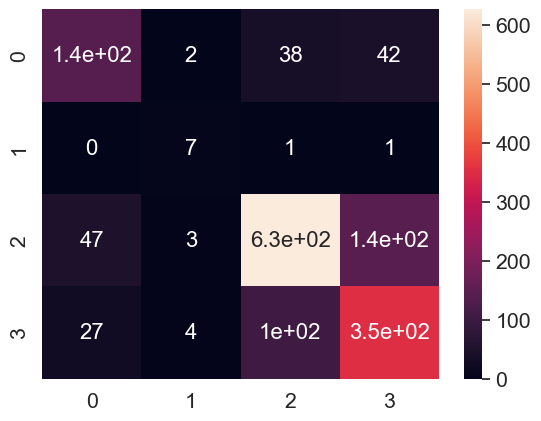

In [16]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [17]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [18]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [19]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [20]:
df.shape

(1279, 2)

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [22]:
y = le.transform(df['Category'])

In [23]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  0%|                                          | 2/1279 [00:00<01:51, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


  0%|▏                                         | 4/1279 [00:00<01:44, 12.16it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                         | 6/1279 [00:00<01:43, 12.35it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                         | 8/1279 [00:00<01:39, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 10/1279 [00:00<01:38, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 12/1279 [00:00<01:36, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▍                                        | 14/1279 [00:01<01:36, 13.06it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▌                                        | 16/1279 [00:01<01:34, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                        | 18/1279 [00:01<01:36, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 20/1279 [00:01<01:35, 13.14it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 22/1279 [00:01<01:34, 13.28it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▊                                        | 24/1279 [00:01<01:41, 12.38it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                        | 26/1279 [00:02<01:37, 12.81it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▉                                        | 28/1279 [00:02<01:37, 12.84it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▉                                        | 30/1279 [00:02<01:36, 12.90it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█                                        | 32/1279 [00:02<01:35, 13.05it/s]

1/1 [==============================] - 0s 38ms/step


  3%|█                                        | 34/1279 [00:02<01:42, 12.15it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                       | 36/1279 [00:02<01:46, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                       | 38/1279 [00:03<01:49, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                       | 40/1279 [00:03<01:45, 11.76it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▎                                       | 42/1279 [00:03<01:49, 11.32it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▍                                       | 44/1279 [00:03<01:44, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                       | 46/1279 [00:03<01:48, 11.33it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                       | 48/1279 [00:03<01:44, 11.82it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                       | 50/1279 [00:04<01:39, 12.41it/s]

1/1 [==============================] - 0s 37ms/step


  4%|█▋                                       | 52/1279 [00:04<01:34, 13.03it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▋                                       | 54/1279 [00:04<01:31, 13.40it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▊                                       | 56/1279 [00:04<01:29, 13.60it/s]

1/1 [==============================] - 0s 44ms/step


  5%|█▊                                       | 58/1279 [00:04<01:30, 13.44it/s]

1/1 [==============================] - 0s 43ms/step


  5%|█▉                                       | 60/1279 [00:04<01:42, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


  5%|█▉                                       | 62/1279 [00:04<01:38, 12.32it/s]

1/1 [==============================] - 0s 38ms/step


  5%|██                                       | 64/1279 [00:05<02:08,  9.48it/s]

1/1 [==============================] - 0s 39ms/step


  5%|██                                       | 66/1279 [00:05<01:58, 10.27it/s]

1/1 [==============================] - 0s 40ms/step


  5%|██▏                                      | 68/1279 [00:05<01:51, 10.83it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██▏                                      | 70/1279 [00:05<01:53, 10.68it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▎                                      | 72/1279 [00:05<01:46, 11.35it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                      | 74/1279 [00:06<01:40, 11.96it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▍                                      | 76/1279 [00:06<01:36, 12.42it/s]

1/1 [==============================] - 0s 44ms/step


  6%|██▌                                      | 78/1279 [00:06<01:36, 12.40it/s]

1/1 [==============================] - 0s 39ms/step


  6%|██▌                                      | 80/1279 [00:06<01:37, 12.28it/s]

1/1 [==============================] - 0s 39ms/step


  6%|██▋                                      | 82/1279 [00:06<01:36, 12.35it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▋                                      | 84/1279 [00:06<01:33, 12.73it/s]

1/1 [==============================] - 0s 41ms/step


  7%|██▊                                      | 86/1279 [00:07<01:32, 12.85it/s]

1/1 [==============================] - 0s 42ms/step


  7%|██▊                                      | 88/1279 [00:07<01:46, 11.13it/s]

1/1 [==============================] - 0s 41ms/step


  7%|██▉                                      | 90/1279 [00:07<01:44, 11.38it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▉                                      | 92/1279 [00:07<01:40, 11.85it/s]

1/1 [==============================] - 0s 35ms/step


  7%|███                                      | 94/1279 [00:07<01:37, 12.18it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███                                      | 96/1279 [00:07<01:34, 12.48it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▏                                     | 98/1279 [00:08<01:33, 12.59it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 100/1279 [00:08<01:32, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 102/1279 [00:08<01:31, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▎                                    | 104/1279 [00:08<01:29, 13.09it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███▎                                    | 106/1279 [00:08<01:29, 13.05it/s]

1/1 [==============================] - 0s 45ms/step


  8%|███▍                                    | 108/1279 [00:08<01:33, 12.47it/s]

1/1 [==============================] - 0s 40ms/step


  9%|███▍                                    | 110/1279 [00:08<01:32, 12.70it/s]

1/1 [==============================] - 0s 39ms/step


  9%|███▌                                    | 112/1279 [00:09<01:38, 11.80it/s]

1/1 [==============================] - 0s 43ms/step


  9%|███▌                                    | 114/1279 [00:09<01:42, 11.36it/s]

1/1 [==============================] - 0s 42ms/step


  9%|███▋                                    | 116/1279 [00:09<01:40, 11.57it/s]

1/1 [==============================] - 0s 44ms/step


  9%|███▋                                    | 118/1279 [00:09<01:44, 11.07it/s]

1/1 [==============================] - 0s 42ms/step


  9%|███▊                                    | 120/1279 [00:09<01:42, 11.32it/s]

1/1 [==============================] - 0s 42ms/step


 10%|███▊                                    | 122/1279 [00:10<01:41, 11.42it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▉                                    | 124/1279 [00:10<01:49, 10.59it/s]

1/1 [==============================] - 0s 41ms/step


 10%|███▉                                    | 126/1279 [00:10<01:45, 10.96it/s]

1/1 [==============================] - 0s 42ms/step


 10%|████                                    | 128/1279 [00:10<01:41, 11.31it/s]

1/1 [==============================] - 0s 39ms/step


 10%|████                                    | 130/1279 [00:10<01:45, 10.94it/s]

1/1 [==============================] - 0s 110ms/step


 10%|████▏                                   | 132/1279 [00:11<01:56,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████▏                                   | 134/1279 [00:11<01:57,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


 11%|████▎                                   | 136/1279 [00:11<01:48, 10.50it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▎                                   | 138/1279 [00:11<01:48, 10.54it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▍                                   | 140/1279 [00:11<01:41, 11.26it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▍                                   | 142/1279 [00:11<01:34, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▌                                   | 144/1279 [00:12<01:32, 12.30it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▌                                   | 146/1279 [00:12<01:30, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▋                                   | 148/1279 [00:12<01:27, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▋                                   | 150/1279 [00:12<01:34, 11.94it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▊                                   | 152/1279 [00:12<01:33, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 12%|████▊                                   | 154/1279 [00:12<01:30, 12.39it/s]

1/1 [==============================] - 0s 38ms/step


 12%|████▉                                   | 156/1279 [00:13<01:30, 12.45it/s]

1/1 [==============================] - 0s 37ms/step


 12%|████▉                                   | 158/1279 [00:13<01:28, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████                                   | 160/1279 [00:13<01:28, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 162/1279 [00:13<01:26, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▏                                  | 164/1279 [00:13<01:26, 12.94it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 166/1279 [00:13<01:25, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▎                                  | 168/1279 [00:13<01:31, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▎                                  | 170/1279 [00:14<01:31, 12.19it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▍                                  | 172/1279 [00:14<01:27, 12.60it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▍                                  | 174/1279 [00:14<01:33, 11.88it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▌                                  | 176/1279 [00:14<01:30, 12.17it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█████▌                                  | 178/1279 [00:14<01:26, 12.69it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█████▋                                  | 180/1279 [00:14<01:24, 13.02it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▋                                  | 182/1279 [00:15<01:30, 12.07it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█████▊                                  | 184/1279 [00:15<01:28, 12.35it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█████▊                                  | 186/1279 [00:15<01:25, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▉                                  | 188/1279 [00:15<01:22, 13.24it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█████▉                                  | 190/1279 [00:15<01:26, 12.60it/s]

1/1 [==============================] - 0s 39ms/step


 15%|██████                                  | 192/1279 [00:15<01:32, 11.73it/s]

1/1 [==============================] - 0s 39ms/step


 15%|██████                                  | 194/1279 [00:16<01:28, 12.31it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 196/1279 [00:16<01:39, 10.89it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 198/1279 [00:16<01:34, 11.40it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▎                                 | 200/1279 [00:16<01:30, 11.87it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▎                                 | 202/1279 [00:16<01:28, 12.12it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▍                                 | 204/1279 [00:16<01:26, 12.37it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▍                                 | 206/1279 [00:17<01:31, 11.78it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▌                                 | 208/1279 [00:17<01:28, 12.12it/s]

1/1 [==============================] - 0s 38ms/step


 16%|██████▌                                 | 210/1279 [00:17<01:25, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▋                                 | 212/1279 [00:17<01:22, 12.86it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▋                                 | 214/1279 [00:17<01:22, 12.98it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▊                                 | 216/1279 [00:17<01:22, 12.84it/s]

1/1 [==============================] - 0s 44ms/step


 17%|██████▊                                 | 218/1279 [00:18<01:22, 12.89it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▉                                 | 220/1279 [00:18<01:22, 12.88it/s]

1/1 [==============================] - 0s 43ms/step


 17%|██████▉                                 | 222/1279 [00:18<01:27, 12.01it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████                                 | 224/1279 [00:18<01:28, 11.92it/s]

1/1 [==============================] - 0s 46ms/step


 18%|███████                                 | 226/1279 [00:18<01:34, 11.16it/s]

1/1 [==============================] - 0s 45ms/step


 18%|███████▏                                | 228/1279 [00:18<01:38, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 18%|███████▏                                | 230/1279 [00:19<01:34, 11.12it/s]

1/1 [==============================] - 0s 44ms/step


 18%|███████▎                                | 232/1279 [00:19<01:45,  9.93it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████▎                                | 234/1279 [00:19<01:38, 10.61it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████▍                                | 236/1279 [00:19<01:32, 11.28it/s]

1/1 [==============================] - 0s 48ms/step


 19%|███████▍                                | 238/1279 [00:19<01:32, 11.25it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████▌                                | 240/1279 [00:20<01:31, 11.36it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▌                                | 242/1279 [00:20<01:27, 11.88it/s]

1/1 [==============================] - 0s 41ms/step


 19%|███████▋                                | 244/1279 [00:20<01:24, 12.26it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████▋                                | 246/1279 [00:20<01:21, 12.60it/s]

1/1 [==============================] - 0s 37ms/step


 19%|███████▊                                | 248/1279 [00:20<01:20, 12.86it/s]

1/1 [==============================] - 0s 54ms/step


 20%|███████▊                                | 250/1279 [00:20<01:28, 11.68it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▉                                | 252/1279 [00:21<01:26, 11.85it/s]

1/1 [==============================] - 0s 120ms/step


 20%|███████▉                                | 254/1279 [00:21<01:36, 10.62it/s]

1/1 [==============================] - 0s 36ms/step


 20%|████████                                | 256/1279 [00:21<01:32, 11.10it/s]

1/1 [==============================] - 0s 37ms/step


 20%|████████                                | 258/1279 [00:21<01:24, 12.09it/s]

1/1 [==============================] - 0s 40ms/step


 20%|████████▏                               | 260/1279 [00:21<01:21, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 20%|████████▏                               | 262/1279 [00:21<01:17, 13.04it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▎                               | 264/1279 [00:21<01:15, 13.51it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▎                               | 266/1279 [00:22<01:12, 13.90it/s]

1/1 [==============================] - 0s 41ms/step


 21%|████████▍                               | 268/1279 [00:22<01:12, 13.92it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▍                               | 270/1279 [00:22<01:12, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▌                               | 272/1279 [00:22<01:11, 14.16it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▌                               | 274/1279 [00:22<01:12, 13.88it/s]

1/1 [==============================] - 0s 61ms/step


 22%|████████▋                               | 276/1279 [00:22<01:30, 11.04it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████▋                               | 278/1279 [00:23<01:26, 11.62it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████▊                               | 280/1279 [00:23<01:29, 11.22it/s]

1/1 [==============================] - 0s 37ms/step


 22%|████████▊                               | 282/1279 [00:23<01:24, 11.80it/s]

1/1 [==============================] - 0s 41ms/step


 22%|████████▉                               | 284/1279 [00:23<01:20, 12.39it/s]

1/1 [==============================] - 0s 43ms/step


 22%|████████▉                               | 286/1279 [00:23<01:25, 11.56it/s]

1/1 [==============================] - 0s 51ms/step


 23%|█████████                               | 288/1279 [00:23<01:25, 11.55it/s]

1/1 [==============================] - 0s 62ms/step


 23%|█████████                               | 290/1279 [00:24<01:30, 10.98it/s]

1/1 [==============================] - 0s 42ms/step


 23%|█████████▏                              | 292/1279 [00:24<01:28, 11.13it/s]

1/1 [==============================] - 0s 46ms/step


 23%|█████████▏                              | 294/1279 [00:24<01:32, 10.64it/s]

1/1 [==============================] - 0s 41ms/step


 23%|█████████▎                              | 296/1279 [00:24<01:29, 11.03it/s]

1/1 [==============================] - 0s 41ms/step


 23%|█████████▎                              | 298/1279 [00:24<01:23, 11.74it/s]

1/1 [==============================] - 0s 41ms/step


 23%|█████████▍                              | 300/1279 [00:24<01:19, 12.24it/s]

1/1 [==============================] - 0s 45ms/step


 24%|█████████▍                              | 302/1279 [00:25<01:20, 12.13it/s]

1/1 [==============================] - 0s 52ms/step


 24%|█████████▌                              | 304/1279 [00:25<01:21, 11.94it/s]

1/1 [==============================] - 0s 40ms/step


 24%|█████████▌                              | 306/1279 [00:25<01:19, 12.17it/s]

1/1 [==============================] - 0s 45ms/step


 24%|█████████▋                              | 308/1279 [00:25<01:24, 11.55it/s]

1/1 [==============================] - 0s 46ms/step


 24%|█████████▋                              | 310/1279 [00:25<01:22, 11.75it/s]

1/1 [==============================] - 0s 41ms/step


 24%|█████████▊                              | 312/1279 [00:26<01:21, 11.79it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▊                              | 314/1279 [00:26<01:28, 10.92it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▉                              | 316/1279 [00:26<01:24, 11.35it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▉                              | 318/1279 [00:26<01:28, 10.81it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██████████                              | 320/1279 [00:26<01:30, 10.64it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██████████                              | 322/1279 [00:26<01:26, 11.01it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██████████▏                             | 324/1279 [00:27<01:26, 11.01it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██████████▏                             | 326/1279 [00:27<01:25, 11.09it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██████████▎                             | 328/1279 [00:27<01:27, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██████████▎                             | 330/1279 [00:27<01:26, 10.99it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██████████▍                             | 332/1279 [00:27<01:21, 11.61it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██████████▍                             | 334/1279 [00:27<01:18, 12.02it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██████████▌                             | 336/1279 [00:28<01:23, 11.28it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██████████▌                             | 338/1279 [00:28<01:20, 11.64it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██████████▋                             | 340/1279 [00:28<01:19, 11.83it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██████████▋                             | 342/1279 [00:28<01:18, 11.89it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██████████▊                             | 344/1279 [00:28<01:18, 11.84it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▊                             | 346/1279 [00:28<01:17, 12.03it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██████████▉                             | 348/1279 [00:29<01:16, 12.23it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██████████▉                             | 350/1279 [00:29<01:16, 12.08it/s]

1/1 [==============================] - 0s 46ms/step


 28%|███████████                             | 352/1279 [00:29<01:22, 11.20it/s]

1/1 [==============================] - 0s 42ms/step


 28%|███████████                             | 354/1279 [00:29<01:20, 11.49it/s]

1/1 [==============================] - 0s 44ms/step


 28%|███████████▏                            | 356/1279 [00:29<01:25, 10.78it/s]

1/1 [==============================] - 0s 36ms/step


 28%|███████████▏                            | 358/1279 [00:30<01:20, 11.45it/s]

1/1 [==============================] - 0s 44ms/step


 28%|███████████▎                            | 360/1279 [00:30<01:17, 11.85it/s]

1/1 [==============================] - 0s 43ms/step


 28%|███████████▎                            | 362/1279 [00:30<01:16, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 28%|███████████▍                            | 364/1279 [00:30<01:20, 11.42it/s]

1/1 [==============================] - 0s 41ms/step


 29%|███████████▍                            | 366/1279 [00:30<01:17, 11.84it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████▌                            | 368/1279 [00:30<01:14, 12.28it/s]

1/1 [==============================] - 0s 42ms/step


 29%|███████████▌                            | 370/1279 [00:31<01:11, 12.63it/s]

1/1 [==============================] - 0s 45ms/step


 29%|███████████▋                            | 372/1279 [00:31<01:12, 12.43it/s]

1/1 [==============================] - 0s 39ms/step


 29%|███████████▋                            | 374/1279 [00:31<01:13, 12.38it/s]

1/1 [==============================] - 0s 39ms/step


 29%|███████████▊                            | 376/1279 [00:31<01:11, 12.59it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▊                            | 378/1279 [00:31<01:17, 11.65it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███████████▉                            | 380/1279 [00:31<01:14, 12.01it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▉                            | 382/1279 [00:32<01:12, 12.42it/s]

1/1 [==============================] - 0s 34ms/step


 30%|████████████                            | 384/1279 [00:32<01:08, 13.11it/s]

1/1 [==============================] - 0s 42ms/step


 30%|████████████                            | 386/1279 [00:32<01:07, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 30%|████████████▏                           | 388/1279 [00:32<01:07, 13.22it/s]

1/1 [==============================] - 0s 36ms/step


 30%|████████████▏                           | 390/1279 [00:32<01:05, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▎                           | 392/1279 [00:32<01:02, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▎                           | 394/1279 [00:32<01:01, 14.39it/s]

1/1 [==============================] - 0s 43ms/step


 31%|████████████▍                           | 396/1279 [00:32<01:01, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▍                           | 398/1279 [00:33<01:00, 14.51it/s]

1/1 [==============================] - 0s 43ms/step


 31%|████████████▌                           | 400/1279 [00:33<01:19, 11.11it/s]

1/1 [==============================] - 0s 38ms/step


 31%|████████████▌                           | 402/1279 [00:33<01:19, 11.05it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▋                           | 404/1279 [00:33<01:26, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                           | 406/1279 [00:33<01:19, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▊                           | 408/1279 [00:34<01:12, 11.97it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▊                           | 410/1279 [00:34<01:07, 12.89it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████▉                           | 412/1279 [00:34<01:05, 13.17it/s]

1/1 [==============================] - 0s 43ms/step


 32%|████████████▉                           | 414/1279 [00:34<01:15, 11.50it/s]

1/1 [==============================] - 0s 37ms/step


 33%|█████████████                           | 416/1279 [00:34<01:12, 11.95it/s]

1/1 [==============================] - 0s 39ms/step


 33%|█████████████                           | 418/1279 [00:34<01:08, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 33%|█████████████▏                          | 420/1279 [00:35<01:05, 13.02it/s]

1/1 [==============================] - 0s 44ms/step


 33%|█████████████▏                          | 422/1279 [00:35<01:07, 12.77it/s]

1/1 [==============================] - 0s 43ms/step


 33%|█████████████▎                          | 424/1279 [00:35<01:08, 12.54it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████▎                          | 426/1279 [00:35<01:08, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 33%|█████████████▍                          | 428/1279 [00:35<01:07, 12.69it/s]

1/1 [==============================] - 0s 58ms/step


 34%|█████████████▍                          | 430/1279 [00:35<01:08, 12.39it/s]

1/1 [==============================] - 0s 54ms/step


 34%|█████████████▌                          | 432/1279 [00:36<01:14, 11.40it/s]

1/1 [==============================] - 0s 73ms/step


 34%|█████████████▌                          | 434/1279 [00:36<01:30,  9.30it/s]

1/1 [==============================] - 0s 45ms/step


 34%|█████████████▋                          | 436/1279 [00:36<01:26,  9.70it/s]

1/1 [==============================] - 0s 55ms/step


 34%|█████████████▋                          | 438/1279 [00:36<01:21, 10.30it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████▊                          | 440/1279 [00:36<01:18, 10.73it/s]

1/1 [==============================] - 0s 45ms/step


 35%|█████████████▊                          | 442/1279 [00:37<01:30,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 35%|█████████████▊                          | 443/1279 [00:37<01:31,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


 35%|█████████████▉                          | 445/1279 [00:37<01:21, 10.26it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▉                          | 447/1279 [00:37<01:13, 11.25it/s]

1/1 [==============================] - 0s 36ms/step


 35%|██████████████                          | 449/1279 [00:37<01:09, 11.98it/s]

1/1 [==============================] - 0s 37ms/step


 35%|██████████████                          | 451/1279 [00:37<01:05, 12.71it/s]

1/1 [==============================] - 0s 44ms/step


 35%|██████████████▏                         | 453/1279 [00:38<01:06, 12.48it/s]

1/1 [==============================] - 0s 49ms/step


 36%|██████████████▏                         | 455/1279 [00:38<01:12, 11.32it/s]

1/1 [==============================] - 0s 64ms/step


 36%|██████████████▎                         | 457/1279 [00:38<01:17, 10.66it/s]

1/1 [==============================] - 0s 37ms/step


 36%|██████████████▎                         | 459/1279 [00:38<01:13, 11.18it/s]

1/1 [==============================] - 0s 39ms/step


 36%|██████████████▍                         | 461/1279 [00:38<01:08, 11.92it/s]

1/1 [==============================] - 0s 38ms/step


 36%|██████████████▍                         | 463/1279 [00:38<01:05, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▌                         | 465/1279 [00:39<01:02, 12.95it/s]

1/1 [==============================] - 0s 45ms/step


 37%|██████████████▌                         | 467/1279 [00:39<01:04, 12.66it/s]

1/1 [==============================] - 0s 41ms/step


 37%|██████████████▋                         | 469/1279 [00:39<01:09, 11.57it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▋                         | 471/1279 [00:39<01:07, 12.02it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▊                         | 473/1279 [00:39<01:04, 12.57it/s]

1/1 [==============================] - 0s 40ms/step


 37%|██████████████▊                         | 475/1279 [00:39<01:01, 12.98it/s]

1/1 [==============================] - 0s 43ms/step


 37%|██████████████▉                         | 477/1279 [00:39<01:03, 12.69it/s]

1/1 [==============================] - 0s 40ms/step


 37%|██████████████▉                         | 479/1279 [00:40<01:03, 12.58it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███████████████                         | 481/1279 [00:40<01:04, 12.32it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███████████████                         | 483/1279 [00:40<01:05, 12.13it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███████████████▏                        | 485/1279 [00:40<01:06, 11.93it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███████████████▏                        | 487/1279 [00:40<01:07, 11.75it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███████████████▎                        | 489/1279 [00:41<01:13, 10.82it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███████████████▎                        | 491/1279 [00:41<01:17, 10.16it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███████████████▍                        | 493/1279 [00:41<01:14, 10.51it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███████████████▍                        | 495/1279 [00:41<01:12, 10.77it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███████████████▌                        | 497/1279 [00:41<01:11, 10.94it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███████████████▌                        | 499/1279 [00:41<01:10, 11.13it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████▋                        | 501/1279 [00:42<01:07, 11.50it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███████████████▋                        | 503/1279 [00:42<01:07, 11.48it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███████████████▊                        | 505/1279 [00:42<01:06, 11.64it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███████████████▊                        | 507/1279 [00:42<01:07, 11.44it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███████████████▉                        | 509/1279 [00:42<01:06, 11.57it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███████████████▉                        | 511/1279 [00:43<01:06, 11.59it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████████████████                        | 513/1279 [00:43<01:07, 11.37it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████████████████                        | 515/1279 [00:43<01:07, 11.38it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████████████████▏                       | 517/1279 [00:43<01:11, 10.66it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████████████████▏                       | 519/1279 [00:43<01:09, 10.86it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████████████████▎                       | 521/1279 [00:43<01:12, 10.47it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████████████████▎                       | 523/1279 [00:44<01:09, 10.82it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████████████████▍                       | 525/1279 [00:44<01:08, 11.00it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████████████████▍                       | 527/1279 [00:44<01:07, 11.18it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████████████████▌                       | 529/1279 [00:44<01:04, 11.64it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▌                       | 531/1279 [00:44<01:09, 10.79it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████████████████▋                       | 533/1279 [00:45<01:05, 11.35it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████████████████▋                       | 535/1279 [00:45<01:03, 11.68it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▊                       | 537/1279 [00:45<01:06, 11.20it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▊                       | 539/1279 [00:45<01:03, 11.67it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▉                       | 541/1279 [00:45<00:59, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▉                       | 543/1279 [00:45<00:57, 12.91it/s]

1/1 [==============================] - 0s 47ms/step


 43%|█████████████████                       | 545/1279 [00:46<01:10, 10.36it/s]

1/1 [==============================] - 0s 44ms/step


 43%|█████████████████                       | 547/1279 [00:46<01:11, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


 43%|█████████████████▏                      | 549/1279 [00:46<01:06, 11.01it/s]

1/1 [==============================] - 0s 39ms/step


 43%|█████████████████▏                      | 551/1279 [00:46<01:02, 11.68it/s]

1/1 [==============================] - 0s 39ms/step


 43%|█████████████████▎                      | 553/1279 [00:46<00:59, 12.20it/s]

1/1 [==============================] - 0s 41ms/step


 43%|█████████████████▎                      | 555/1279 [00:46<00:57, 12.50it/s]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████▍                      | 557/1279 [00:47<00:56, 12.67it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████▍                      | 559/1279 [00:47<01:00, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▌                      | 561/1279 [00:47<00:57, 12.53it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▌                      | 563/1279 [00:47<00:55, 12.99it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▋                      | 565/1279 [00:47<00:54, 13.17it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▋                      | 567/1279 [00:47<00:53, 13.30it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▊                      | 569/1279 [00:47<00:52, 13.51it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▊                      | 571/1279 [00:48<00:52, 13.56it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▉                      | 573/1279 [00:48<00:51, 13.70it/s]

1/1 [==============================] - 0s 41ms/step


 45%|█████████████████▉                      | 575/1279 [00:48<00:52, 13.44it/s]

1/1 [==============================] - 0s 37ms/step


 45%|██████████████████                      | 577/1279 [00:48<00:51, 13.75it/s]

1/1 [==============================] - 0s 40ms/step


 45%|██████████████████                      | 579/1279 [00:48<00:51, 13.61it/s]

1/1 [==============================] - 0s 38ms/step


 45%|██████████████████▏                     | 581/1279 [00:48<00:51, 13.51it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████▏                     | 583/1279 [00:48<00:51, 13.52it/s]

1/1 [==============================] - 0s 40ms/step


 46%|██████████████████▎                     | 585/1279 [00:49<00:51, 13.37it/s]

1/1 [==============================] - 0s 41ms/step


 46%|██████████████████▎                     | 587/1279 [00:49<00:52, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████▍                     | 589/1279 [00:49<00:55, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 46%|██████████████████▍                     | 591/1279 [00:49<00:54, 12.67it/s]

1/1 [==============================] - 0s 48ms/step


 46%|██████████████████▌                     | 593/1279 [00:49<01:00, 11.43it/s]

1/1 [==============================] - 0s 41ms/step


 47%|██████████████████▌                     | 595/1279 [00:49<00:57, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▋                     | 597/1279 [00:50<00:55, 12.23it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▋                     | 599/1279 [00:50<00:54, 12.44it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▊                     | 601/1279 [00:50<00:53, 12.62it/s]

1/1 [==============================] - 0s 39ms/step


 47%|██████████████████▊                     | 603/1279 [00:50<00:54, 12.48it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▉                     | 605/1279 [00:50<00:54, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▉                     | 607/1279 [00:50<00:52, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 48%|███████████████████                     | 609/1279 [00:51<00:55, 12.11it/s]

1/1 [==============================] - 0s 39ms/step


 48%|███████████████████                     | 611/1279 [00:51<00:58, 11.34it/s]

1/1 [==============================] - 0s 36ms/step


 48%|███████████████████▏                    | 613/1279 [00:51<01:00, 11.10it/s]

1/1 [==============================] - 0s 34ms/step


 48%|███████████████████▏                    | 615/1279 [00:51<00:56, 11.68it/s]

1/1 [==============================] - 0s 37ms/step


 48%|███████████████████▎                    | 617/1279 [00:51<00:53, 12.30it/s]

1/1 [==============================] - 0s 38ms/step


 48%|███████████████████▎                    | 619/1279 [00:51<00:52, 12.66it/s]

1/1 [==============================] - 0s 41ms/step


 49%|███████████████████▍                    | 621/1279 [00:52<00:51, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▍                    | 623/1279 [00:52<00:51, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▌                    | 625/1279 [00:52<00:50, 12.88it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▌                    | 627/1279 [00:52<00:53, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▋                    | 629/1279 [00:52<00:52, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▋                    | 631/1279 [00:52<00:51, 12.62it/s]

1/1 [==============================] - 0s 43ms/step


 49%|███████████████████▊                    | 633/1279 [00:53<00:50, 12.80it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▊                    | 635/1279 [00:53<00:49, 12.97it/s]

1/1 [==============================] - 0s 41ms/step


 50%|███████████████████▉                    | 637/1279 [00:53<00:49, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▉                    | 639/1279 [00:53<00:51, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████████████████████                    | 641/1279 [00:53<00:50, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████████████████████                    | 643/1279 [00:53<00:48, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████████████████████▏                   | 645/1279 [00:53<00:47, 13.23it/s]

1/1 [==============================] - 0s 39ms/step


 51%|████████████████████▏                   | 647/1279 [00:54<00:51, 12.33it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████▎                   | 649/1279 [00:54<00:50, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 51%|████████████████████▎                   | 651/1279 [00:54<00:49, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▍                   | 653/1279 [00:54<00:49, 12.71it/s]

1/1 [==============================] - 0s 39ms/step


 51%|████████████████████▍                   | 655/1279 [00:54<00:51, 12.04it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████▌                   | 657/1279 [00:54<00:50, 12.37it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▌                   | 659/1279 [00:55<00:49, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▋                   | 661/1279 [00:55<00:48, 12.79it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▋                   | 663/1279 [00:55<00:51, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▊                   | 665/1279 [00:55<00:50, 12.09it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▊                   | 667/1279 [00:55<00:48, 12.50it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▉                   | 669/1279 [00:55<00:47, 12.79it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████▉                   | 671/1279 [00:56<00:53, 11.37it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████████████████████                   | 673/1279 [00:56<00:51, 11.68it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████████████████████                   | 675/1279 [00:56<00:50, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████████████████████▏                  | 677/1279 [00:56<00:49, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████████████████████▏                  | 679/1279 [00:56<00:48, 12.45it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████████████████████▎                  | 681/1279 [00:56<00:47, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▎                  | 683/1279 [00:57<00:46, 12.73it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▍                  | 685/1279 [00:57<00:46, 12.75it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▍                  | 687/1279 [00:57<00:45, 12.98it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▌                  | 689/1279 [00:57<00:44, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▌                  | 691/1279 [00:57<00:44, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▋                  | 693/1279 [00:57<00:44, 13.19it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▋                  | 695/1279 [00:57<00:43, 13.36it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████▊                  | 697/1279 [00:58<00:47, 12.21it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▊                  | 699/1279 [00:58<00:46, 12.54it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▉                  | 701/1279 [00:58<00:45, 12.68it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▉                  | 703/1279 [00:58<00:51, 11.17it/s]

1/1 [==============================] - 0s 39ms/step


 55%|██████████████████████                  | 705/1279 [00:58<00:48, 11.80it/s]

1/1 [==============================] - 0s 35ms/step


 55%|██████████████████████                  | 707/1279 [00:59<00:49, 11.49it/s]

1/1 [==============================] - 0s 37ms/step


 55%|██████████████████████▏                 | 709/1279 [00:59<00:47, 12.01it/s]

1/1 [==============================] - 0s 37ms/step


 56%|██████████████████████▏                 | 711/1279 [00:59<00:46, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████▎                 | 713/1279 [00:59<00:44, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████▎                 | 715/1279 [00:59<00:46, 12.06it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████▍                 | 717/1279 [00:59<00:44, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 56%|██████████████████████▍                 | 719/1279 [00:59<00:47, 11.77it/s]

1/1 [==============================] - 0s 39ms/step


 56%|██████████████████████▌                 | 721/1279 [01:00<00:45, 12.27it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████▌                 | 723/1279 [01:00<00:44, 12.53it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▋                 | 725/1279 [01:00<00:43, 12.85it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▋                 | 727/1279 [01:00<00:42, 12.97it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▊                 | 729/1279 [01:00<00:42, 13.03it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████▊                 | 731/1279 [01:00<00:42, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▉                 | 733/1279 [01:01<00:41, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▉                 | 735/1279 [01:01<00:41, 13.01it/s]

1/1 [==============================] - 0s 36ms/step


 58%|███████████████████████                 | 737/1279 [01:01<00:41, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████                 | 739/1279 [01:01<00:40, 13.24it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▏                | 741/1279 [01:01<00:40, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 58%|███████████████████████▏                | 743/1279 [01:01<00:39, 13.41it/s]

1/1 [==============================] - 0s 36ms/step


 58%|███████████████████████▎                | 745/1279 [01:01<00:40, 13.33it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▎                | 747/1279 [01:02<00:40, 13.07it/s]

1/1 [==============================] - 0s 41ms/step


 59%|███████████████████████▍                | 749/1279 [01:02<00:43, 12.13it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████▍                | 751/1279 [01:02<00:42, 12.53it/s]

1/1 [==============================] - 0s 39ms/step


 59%|███████████████████████▌                | 753/1279 [01:02<00:44, 11.89it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████▌                | 755/1279 [01:02<00:43, 12.18it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████▋                | 757/1279 [01:02<00:41, 12.65it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████▋                | 759/1279 [01:03<00:40, 12.81it/s]

1/1 [==============================] - 0s 39ms/step


 59%|███████████████████████▊                | 761/1279 [01:03<00:40, 12.93it/s]

1/1 [==============================] - 0s 39ms/step


 60%|███████████████████████▊                | 763/1279 [01:03<00:39, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▉                | 765/1279 [01:03<00:39, 13.05it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▉                | 767/1279 [01:03<00:39, 13.08it/s]

1/1 [==============================] - 0s 38ms/step


 60%|████████████████████████                | 769/1279 [01:03<00:38, 13.28it/s]

1/1 [==============================] - 0s 37ms/step


 60%|████████████████████████                | 771/1279 [01:04<00:40, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 60%|████████████████████████▏               | 773/1279 [01:04<00:41, 12.31it/s]

1/1 [==============================] - 0s 38ms/step


 61%|████████████████████████▏               | 775/1279 [01:04<00:45, 11.04it/s]

1/1 [==============================] - 0s 39ms/step


 61%|████████████████████████▎               | 777/1279 [01:04<00:45, 10.99it/s]

1/1 [==============================] - 0s 35ms/step


 61%|████████████████████████▎               | 779/1279 [01:04<00:43, 11.62it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▍               | 781/1279 [01:04<00:41, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 61%|████████████████████████▍               | 783/1279 [01:05<00:39, 12.45it/s]

1/1 [==============================] - 0s 36ms/step


 61%|████████████████████████▌               | 785/1279 [01:05<00:39, 12.65it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▌               | 787/1279 [01:05<00:38, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 789/1279 [01:05<00:37, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 791/1279 [01:05<00:37, 13.08it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████▊               | 793/1279 [01:05<00:42, 11.46it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▊               | 795/1279 [01:06<00:40, 12.05it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▉               | 797/1279 [01:06<00:39, 12.30it/s]

1/1 [==============================] - 0s 41ms/step


 62%|████████████████████████▉               | 799/1279 [01:06<00:38, 12.44it/s]

1/1 [==============================] - 0s 41ms/step


 63%|█████████████████████████               | 801/1279 [01:06<00:38, 12.53it/s]

1/1 [==============================] - 0s 42ms/step


 63%|█████████████████████████               | 803/1279 [01:06<00:41, 11.60it/s]

1/1 [==============================] - 0s 38ms/step


 63%|█████████████████████████▏              | 805/1279 [01:06<00:39, 12.07it/s]

1/1 [==============================] - 0s 39ms/step


 63%|█████████████████████████▏              | 807/1279 [01:06<00:38, 12.33it/s]

1/1 [==============================] - 0s 37ms/step


 63%|█████████████████████████▎              | 809/1279 [01:07<00:37, 12.48it/s]

1/1 [==============================] - 0s 37ms/step


 63%|█████████████████████████▎              | 811/1279 [01:07<00:39, 11.90it/s]

1/1 [==============================] - 0s 42ms/step


 64%|█████████████████████████▍              | 813/1279 [01:07<00:40, 11.49it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████▍              | 815/1279 [01:07<00:41, 11.12it/s]

1/1 [==============================] - 0s 39ms/step


 64%|█████████████████████████▌              | 817/1279 [01:07<00:40, 11.34it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████▌              | 819/1279 [01:08<00:38, 12.00it/s]

1/1 [==============================] - 0s 41ms/step


 64%|█████████████████████████▋              | 821/1279 [01:08<00:37, 12.30it/s]

1/1 [==============================] - 0s 40ms/step


 64%|█████████████████████████▋              | 823/1279 [01:08<00:36, 12.62it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▊              | 825/1279 [01:08<00:35, 12.89it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▊              | 827/1279 [01:08<00:34, 13.05it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▉              | 829/1279 [01:08<00:34, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▉              | 831/1279 [01:08<00:37, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████              | 833/1279 [01:09<00:35, 12.62it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████████████████████████              | 835/1279 [01:09<00:34, 12.89it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████████████████████████▏             | 837/1279 [01:09<00:35, 12.52it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████████████████████████▏             | 839/1279 [01:09<00:35, 12.48it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████████████████████████▎             | 841/1279 [01:09<00:36, 11.94it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████████████████████████▎             | 843/1279 [01:09<00:35, 12.15it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████████████████████████▍             | 845/1279 [01:10<00:34, 12.42it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████████████████████████▍             | 847/1279 [01:10<00:33, 12.77it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████████████████████████▌             | 849/1279 [01:10<00:33, 12.89it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████████████████████████▌             | 851/1279 [01:10<00:36, 11.62it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▋             | 853/1279 [01:10<00:35, 12.06it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▋             | 855/1279 [01:10<00:34, 12.28it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▊             | 857/1279 [01:11<00:33, 12.52it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████████████████████████▊             | 859/1279 [01:11<00:35, 11.76it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████████████████████████▉             | 861/1279 [01:11<00:39, 10.71it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████▉             | 863/1279 [01:11<00:37, 11.19it/s]

1/1 [==============================] - 0s 40ms/step


 68%|███████████████████████████             | 865/1279 [01:11<00:37, 10.93it/s]

1/1 [==============================] - 0s 40ms/step


 68%|███████████████████████████             | 867/1279 [01:12<00:38, 10.74it/s]

1/1 [==============================] - 0s 39ms/step


 68%|███████████████████████████▏            | 869/1279 [01:12<00:36, 11.37it/s]

1/1 [==============================] - 0s 39ms/step


 68%|███████████████████████████▏            | 871/1279 [01:12<00:34, 11.87it/s]

1/1 [==============================] - 0s 42ms/step


 68%|███████████████████████████▎            | 873/1279 [01:12<00:36, 11.12it/s]

1/1 [==============================] - 0s 40ms/step


 68%|███████████████████████████▎            | 875/1279 [01:12<00:34, 11.71it/s]

1/1 [==============================] - 0s 41ms/step


 69%|███████████████████████████▍            | 877/1279 [01:12<00:33, 12.15it/s]

1/1 [==============================] - 0s 42ms/step


 69%|███████████████████████████▍            | 879/1279 [01:12<00:32, 12.32it/s]

1/1 [==============================] - 0s 39ms/step


 69%|███████████████████████████▌            | 881/1279 [01:13<00:33, 11.73it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████▌            | 883/1279 [01:13<00:33, 11.92it/s]

1/1 [==============================] - 0s 38ms/step


 69%|███████████████████████████▋            | 885/1279 [01:13<00:32, 12.17it/s]

1/1 [==============================] - 0s 41ms/step


 69%|███████████████████████████▋            | 887/1279 [01:13<00:31, 12.44it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████████████████████████▊            | 889/1279 [01:13<00:31, 12.49it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▊            | 891/1279 [01:14<00:45,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▉            | 893/1279 [01:14<00:42,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▉            | 895/1279 [01:14<00:38, 10.10it/s]

1/1 [==============================] - 0s 36ms/step


 70%|████████████████████████████            | 897/1279 [01:14<00:34, 11.12it/s]

1/1 [==============================] - 0s 36ms/step


 70%|████████████████████████████            | 899/1279 [01:14<00:31, 11.97it/s]

1/1 [==============================] - 0s 37ms/step


 70%|████████████████████████████▏           | 901/1279 [01:14<00:30, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 71%|████████████████████████████▏           | 903/1279 [01:15<00:29, 12.85it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▎           | 905/1279 [01:15<00:28, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▎           | 907/1279 [01:15<00:27, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▍           | 909/1279 [01:15<00:27, 13.32it/s]

1/1 [==============================] - 0s 38ms/step


 71%|████████████████████████████▍           | 911/1279 [01:15<00:27, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▌           | 913/1279 [01:15<00:27, 13.42it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████▌           | 915/1279 [01:16<00:29, 12.47it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████▋           | 917/1279 [01:16<00:28, 12.64it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▋           | 919/1279 [01:16<00:28, 12.72it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████▊           | 921/1279 [01:16<00:27, 12.85it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▊           | 923/1279 [01:16<00:29, 12.03it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████▉           | 925/1279 [01:16<00:28, 12.38it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████▉           | 927/1279 [01:16<00:27, 12.67it/s]

1/1 [==============================] - 0s 40ms/step


 73%|█████████████████████████████           | 929/1279 [01:17<00:27, 12.95it/s]

1/1 [==============================] - 0s 42ms/step


 73%|█████████████████████████████           | 931/1279 [01:17<00:26, 13.09it/s]

1/1 [==============================] - 0s 42ms/step


 73%|█████████████████████████████▏          | 933/1279 [01:17<00:26, 13.27it/s]

1/1 [==============================] - 0s 38ms/step


 73%|█████████████████████████████▏          | 935/1279 [01:17<00:27, 12.37it/s]

1/1 [==============================] - 0s 40ms/step


 73%|█████████████████████████████▎          | 937/1279 [01:17<00:27, 12.45it/s]

1/1 [==============================] - 0s 43ms/step


 73%|█████████████████████████████▎          | 939/1279 [01:17<00:27, 12.56it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████▍          | 941/1279 [01:18<00:26, 12.78it/s]

1/1 [==============================] - 0s 38ms/step


 74%|█████████████████████████████▍          | 943/1279 [01:18<00:25, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 74%|█████████████████████████████▌          | 945/1279 [01:18<00:25, 13.11it/s]

1/1 [==============================] - 0s 43ms/step


 74%|█████████████████████████████▌          | 947/1279 [01:18<00:25, 13.03it/s]

1/1 [==============================] - 0s 37ms/step


 74%|█████████████████████████████▋          | 949/1279 [01:18<00:25, 13.13it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████▋          | 951/1279 [01:18<00:26, 12.35it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▊          | 953/1279 [01:19<00:27, 11.89it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▊          | 955/1279 [01:19<00:26, 12.13it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▉          | 957/1279 [01:19<00:25, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▉          | 959/1279 [01:19<00:27, 11.84it/s]

1/1 [==============================] - 0s 36ms/step


 75%|██████████████████████████████          | 961/1279 [01:19<00:28, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


 75%|██████████████████████████████          | 963/1279 [01:19<00:27, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████▏         | 965/1279 [01:20<00:26, 11.92it/s]

1/1 [==============================] - 0s 34ms/step


 76%|██████████████████████████████▏         | 967/1279 [01:20<00:25, 12.34it/s]

1/1 [==============================] - 0s 55ms/step


 76%|██████████████████████████████▎         | 969/1279 [01:20<00:30, 10.11it/s]

1/1 [==============================] - 0s 37ms/step


 76%|██████████████████████████████▎         | 971/1279 [01:20<00:27, 11.01it/s]

1/1 [==============================] - 0s 38ms/step


 76%|██████████████████████████████▍         | 973/1279 [01:20<00:26, 11.72it/s]

1/1 [==============================] - 0s 38ms/step


 76%|██████████████████████████████▍         | 975/1279 [01:20<00:27, 11.21it/s]

1/1 [==============================] - 0s 39ms/step


 76%|██████████████████████████████▌         | 977/1279 [01:21<00:25, 11.66it/s]

1/1 [==============================] - 0s 40ms/step


 77%|██████████████████████████████▌         | 979/1279 [01:21<00:26, 11.37it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████▋         | 981/1279 [01:21<00:25, 11.82it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████▋         | 983/1279 [01:21<00:24, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▊         | 985/1279 [01:21<00:23, 12.67it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▊         | 987/1279 [01:21<00:22, 13.00it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▉         | 989/1279 [01:22<00:21, 13.28it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▉         | 991/1279 [01:22<00:23, 12.35it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████         | 993/1279 [01:22<00:22, 12.56it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████████████████████████████         | 995/1279 [01:22<00:22, 12.61it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████████████████████████████▏        | 997/1279 [01:22<00:21, 12.88it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████████████████████████████▏        | 999/1279 [01:22<00:21, 12.75it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▌        | 1001/1279 [01:23<00:21, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▌        | 1003/1279 [01:23<00:21, 13.06it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▋        | 1005/1279 [01:23<00:21, 12.85it/s]

1/1 [==============================] - 0s 43ms/step


 79%|██████████████████████████████▋        | 1007/1279 [01:23<00:21, 12.55it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▊        | 1009/1279 [01:23<00:22, 11.97it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▊        | 1011/1279 [01:23<00:21, 12.36it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▉        | 1013/1279 [01:24<00:22, 11.77it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▉        | 1015/1279 [01:24<00:21, 12.04it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 1017/1279 [01:24<00:22, 11.91it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 1019/1279 [01:24<00:21, 12.27it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▏       | 1021/1279 [01:24<00:20, 12.60it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▏       | 1023/1279 [01:24<00:20, 12.76it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████▎       | 1025/1279 [01:24<00:20, 12.61it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▎       | 1027/1279 [01:25<00:19, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▍       | 1029/1279 [01:25<00:19, 12.87it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 1031/1279 [01:25<00:20, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▍       | 1033/1279 [01:25<00:19, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 1035/1279 [01:25<00:20, 11.67it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 1037/1279 [01:25<00:19, 12.20it/s]

1/1 [==============================] - 0s 38ms/step


 81%|███████████████████████████████▋       | 1039/1279 [01:26<00:19, 12.52it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▋       | 1041/1279 [01:26<00:18, 12.76it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▊       | 1043/1279 [01:26<00:19, 11.83it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▊       | 1045/1279 [01:26<00:19, 12.03it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▉       | 1047/1279 [01:26<00:19, 12.21it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▉       | 1049/1279 [01:26<00:18, 12.28it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████████████████████████████       | 1051/1279 [01:27<00:18, 12.16it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 1053/1279 [01:27<00:18, 12.24it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████▏      | 1055/1279 [01:27<00:18, 12.43it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▏      | 1057/1279 [01:27<00:17, 12.67it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▎      | 1059/1279 [01:27<00:17, 12.84it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▎      | 1061/1279 [01:27<00:17, 12.63it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████████████████████████████▍      | 1063/1279 [01:28<00:17, 12.37it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▍      | 1065/1279 [01:28<00:16, 12.70it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▌      | 1067/1279 [01:28<00:16, 12.76it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▌      | 1069/1279 [01:28<00:16, 12.88it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▋      | 1071/1279 [01:28<00:16, 12.96it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▋      | 1073/1279 [01:28<00:16, 12.87it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▊      | 1075/1279 [01:28<00:16, 12.67it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▊      | 1077/1279 [01:29<00:15, 12.70it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▉      | 1079/1279 [01:29<00:16, 11.92it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████████████████████████████▉      | 1081/1279 [01:29<00:18, 10.62it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████      | 1083/1279 [01:29<00:17, 11.09it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████      | 1085/1279 [01:29<00:16, 11.64it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▏     | 1087/1279 [01:30<00:17, 11.14it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████▏     | 1089/1279 [01:30<00:16, 11.70it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▎     | 1091/1279 [01:30<00:15, 11.92it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▎     | 1093/1279 [01:30<00:15, 12.21it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▍     | 1095/1279 [01:30<00:17, 10.68it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▍     | 1097/1279 [01:30<00:17, 10.61it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▌     | 1099/1279 [01:31<00:16, 11.12it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▌     | 1101/1279 [01:31<00:15, 11.59it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▋     | 1103/1279 [01:31<00:14, 11.95it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▋     | 1105/1279 [01:31<00:14, 12.34it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 1107/1279 [01:31<00:13, 12.56it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 1109/1279 [01:31<00:14, 12.02it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 1111/1279 [01:32<00:13, 12.35it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▉     | 1113/1279 [01:32<00:14, 11.64it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 1115/1279 [01:32<00:13, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 87%|██████████████████████████████████     | 1117/1279 [01:32<00:12, 12.52it/s]

1/1 [==============================] - 0s 38ms/step


 87%|██████████████████████████████████     | 1119/1279 [01:32<00:12, 12.80it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▏    | 1121/1279 [01:32<00:12, 12.89it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▏    | 1123/1279 [01:33<00:11, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▎    | 1125/1279 [01:33<00:11, 13.19it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▎    | 1127/1279 [01:33<00:11, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▍    | 1129/1279 [01:33<00:11, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▍    | 1131/1279 [01:33<00:11, 13.08it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▌    | 1133/1279 [01:33<00:11, 12.22it/s]

1/1 [==============================] - 0s 46ms/step


 89%|██████████████████████████████████▌    | 1135/1279 [01:33<00:12, 11.68it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▋    | 1137/1279 [01:34<00:12, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 1139/1279 [01:34<00:12, 11.53it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▊    | 1141/1279 [01:34<00:11, 11.97it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▊    | 1143/1279 [01:34<00:11, 12.12it/s]

1/1 [==============================] - 0s 40ms/step


 90%|██████████████████████████████████▉    | 1145/1279 [01:34<00:10, 12.32it/s]

1/1 [==============================] - 0s 41ms/step


 90%|██████████████████████████████████▉    | 1147/1279 [01:35<00:11, 11.43it/s]

1/1 [==============================] - 0s 39ms/step


 90%|███████████████████████████████████    | 1149/1279 [01:35<00:10, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████    | 1151/1279 [01:35<00:11, 10.77it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 1153/1279 [01:35<00:11, 11.41it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▏   | 1155/1279 [01:35<00:10, 12.01it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▎   | 1157/1279 [01:35<00:09, 12.32it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▎   | 1159/1279 [01:36<00:09, 12.64it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 1161/1279 [01:36<00:09, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 1163/1279 [01:36<00:09, 12.28it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 1165/1279 [01:36<00:08, 12.77it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▌   | 1167/1279 [01:36<00:08, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▋   | 1169/1279 [01:36<00:09, 12.02it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▋   | 1171/1279 [01:36<00:08, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 1173/1279 [01:37<00:08, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 1175/1279 [01:37<00:08, 11.83it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▉   | 1177/1279 [01:37<00:08, 12.26it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▉   | 1179/1279 [01:37<00:08, 11.55it/s]

1/1 [==============================] - 0s 39ms/step


 92%|████████████████████████████████████   | 1181/1279 [01:37<00:08, 11.27it/s]

1/1 [==============================] - 0s 34ms/step


 92%|████████████████████████████████████   | 1183/1279 [01:38<00:08, 11.96it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▏  | 1185/1279 [01:38<00:08, 11.60it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▏  | 1187/1279 [01:38<00:08, 11.31it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▎  | 1189/1279 [01:38<00:07, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 1191/1279 [01:38<00:07, 12.05it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▍  | 1193/1279 [01:38<00:06, 12.43it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▍  | 1195/1279 [01:39<00:07, 11.85it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▍  | 1197/1279 [01:39<00:07, 10.76it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▌  | 1199/1279 [01:39<00:07, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▌  | 1201/1279 [01:39<00:06, 11.35it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▋  | 1203/1279 [01:39<00:06, 11.97it/s]

1/1 [==============================] - 0s 56ms/step


 94%|████████████████████████████████████▋  | 1205/1279 [01:39<00:06, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▊  | 1207/1279 [01:40<00:06, 11.19it/s]

1/1 [==============================] - 0s 39ms/step


 95%|████████████████████████████████████▊  | 1209/1279 [01:40<00:05, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▉  | 1211/1279 [01:40<00:05, 11.44it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▉  | 1213/1279 [01:40<00:05, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████  | 1215/1279 [01:40<00:05, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████  | 1217/1279 [01:40<00:04, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 1219/1279 [01:41<00:04, 12.83it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████████████████████████████████▏ | 1221/1279 [01:41<00:04, 12.71it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▎ | 1223/1279 [01:41<00:04, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▎ | 1225/1279 [01:41<00:04, 12.62it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▍ | 1227/1279 [01:41<00:04, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▍ | 1229/1279 [01:41<00:04, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▌ | 1231/1279 [01:42<00:03, 12.46it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▌ | 1233/1279 [01:42<00:03, 12.67it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▋ | 1235/1279 [01:42<00:03, 12.94it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████████████████████████████████▋ | 1237/1279 [01:42<00:03, 12.98it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▊ | 1239/1279 [01:42<00:03, 12.89it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▊ | 1241/1279 [01:42<00:02, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 1243/1279 [01:42<00:02, 12.89it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 1245/1279 [01:43<00:02, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 97%|██████████████████████████████████████ | 1247/1279 [01:43<00:02, 12.98it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████ | 1249/1279 [01:43<00:02, 12.82it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▏| 1251/1279 [01:43<00:02, 12.51it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▏| 1253/1279 [01:43<00:02, 11.98it/s]

1/1 [==============================] - 0s 39ms/step


 98%|██████████████████████████████████████▎| 1255/1279 [01:43<00:01, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████▎| 1257/1279 [01:44<00:01, 11.89it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▍| 1259/1279 [01:44<00:01, 12.32it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▍| 1261/1279 [01:44<00:01, 12.56it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▌| 1263/1279 [01:44<00:01, 12.87it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▌| 1265/1279 [01:44<00:01, 13.04it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▋| 1267/1279 [01:44<00:00, 12.64it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▋| 1269/1279 [01:45<00:00, 11.89it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▊| 1271/1279 [01:45<00:00, 12.39it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████████████████████████████████▊| 1273/1279 [01:45<00:00, 12.63it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▉| 1275/1279 [01:45<00:00, 12.62it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▉| 1277/1279 [01:45<00:00, 12.71it/s]

1/1 [==============================] - 0s 39ms/step


100%|███████████████████████████████████████| 1279/1279 [01:45<00:00, 12.08it/s]


In [24]:
x_test = pd.DataFrame(x_test)

In [25]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0  107.723717  0.0  17.096834  0.0  0.0  0.0  0.0  0.0  
1  110.493492  0.0  17.773064  0.0  0.0  0.0  0.0  0.0  
2  104.112038  0.0  17.117346  0.0  0.0  0.0  0.0  0.0  
3   91.028961  0.0   3.262681  0.0  0.0  0.0  0.0  0.0  
4   97.329041  0.0  25.548311  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_test.shape

(1279, 512)

In [28]:
y_pred = clf.predict(x_test)

/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.49569976544175137
0.2151076371635665
0.2681084148044693
0.3131580577232751


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
